In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
os.chdir('..')

import warnings
warnings.filterwarnings('ignore', '', UserWarning)

import torch
import torchvision

torch.manual_seed(1)
torch.cuda.manual_seed(1)

In [2]:
dataset_params = {
    'dataset': 'dsprites',
    'batch_size': 32,
    'cuda': True,
    'root': 'data'
}

from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    **dataset_params)

Loading dsprites dataset...
Done!



In [48]:
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-4,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

from src.models.conv_vsc import ConvolutionalVariationalSparseCoding
convvsc = ConvolutionalVariationalSparseCoding(**model_params)

In [31]:
width, height, channels

(64, 64, 1)

In [20]:
len(train_loader)

18750

In [47]:
images[0].shape

torch.Size([1, 64, 64])

In [32]:
%%time
training_params = {
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 2,
    'report_interval': 2,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4211.089355
Train Epoch: 1 [160000/600000 (27%)]	Loss: 199.580811
Train Epoch: 1 [320000/600000 (53%)]	Loss: 60.877342
Train Epoch: 1 [480000/600000 (80%)]	Loss: 33.127655
====> Epoch: 1 Average loss: 121.1381
====> Test set loss: 12.0634 - VLB-VSC : 386.0289
Train Epoch: 2 [0/600000 (0%)]	Loss: 12.206225
Train Epoch: 2 [160000/600000 (27%)]	Loss: 5.220592
Train Epoch: 2 [320000/600000 (53%)]	Loss: 4.670348
Train Epoch: 2 [480000/600000 (80%)]	Loss: 4.796397
====> Epoch: 2 Average loss: 6.7604
====> Test set loss: 5.0519 - VLB-VSC : 161.6610
CPU times: user 6min 39s, sys: 32 s, total: 7min 11s
Wall time: 6min 6s


In [49]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-4,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4944.705078
Train Epoch: 1 [160000/600000 (27%)]	Loss: 144.631393
Train Epoch: 1 [320000/600000 (53%)]	Loss: 33.579712
Train Epoch: 1 [480000/600000 (80%)]	Loss: 32.941223
====> Epoch: 1 Average loss: 85.9283
====> Test set loss: 33.6818 - VLB-ConvVSC : 1077.8170
Train Epoch: 2 [0/600000 (0%)]	Loss: 33.298946
Train Epoch: 2 [160000/600000 (27%)]	Loss: 33.830929
Train Epoch: 2 [320000/600000 (53%)]	Loss: 33.470573
Train Epoch: 2 [480000/600000 (80%)]	Loss: 33.940788
====> Epoch: 2 Average loss: 33.6843
====> Test set loss: 33.6740 - VLB-ConvVSC : 1077.5681
CPU times: user 4min 54s, sys: 20.4 s, total: 5min 14s
Wall time: 4min 38s


In [52]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-1,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 2961.439209
Train Epoch: 1 [160000/600000 (27%)]	Loss: 112.361862
Train Epoch: 1 [320000/600000 (53%)]	Loss: 63.511871
Train Epoch: 1 [480000/600000 (80%)]	Loss: 36.808315
====> Epoch: 1 Average loss: 66.1559
====> Test set loss: 35.9991 - VLB-ConvVSC : 1151.9717
Train Epoch: 2 [0/600000 (0%)]	Loss: 36.827927
Train Epoch: 2 [160000/600000 (27%)]	Loss: 36.170170
Train Epoch: 2 [320000/600000 (53%)]	Loss: 35.623882
Train Epoch: 2 [480000/600000 (80%)]	Loss: 36.258492
====> Epoch: 2 Average loss: 35.9899
====> Test set loss: 35.9733 - VLB-ConvVSC : 1151.1455
CPU times: user 5min 6s, sys: 20.5 s, total: 5min 26s
Wall time: 4min 49s


In [ ]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-4,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

In [53]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-5,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 5429.226562
Train Epoch: 1 [160000/600000 (27%)]	Loss: 374.972412
Train Epoch: 1 [320000/600000 (53%)]	Loss: 109.276566
Train Epoch: 1 [480000/600000 (80%)]	Loss: 75.331497
====> Epoch: 1 Average loss: 216.4288
====> Test set loss: 75.1211 - VLB-ConvVSC : 2403.8763
Train Epoch: 2 [0/600000 (0%)]	Loss: 75.622459
Train Epoch: 2 [160000/600000 (27%)]	Loss: 28.097084
Train Epoch: 2 [320000/600000 (53%)]	Loss: 16.709173
Train Epoch: 2 [480000/600000 (80%)]	Loss: 16.763636
====> Epoch: 2 Average loss: 29.5167
====> Test set loss: 16.3863 - VLB-ConvVSC : 524.3609
CPU times: user 5min 3s, sys: 20.5 s, total: 5min 23s
Wall time: 4min 45s


In [64]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    'alpha': 1e-6,
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 5197.377930
Train Epoch: 1 [160000/600000 (27%)]	Loss: 274.038574
Train Epoch: 1 [320000/600000 (53%)]	Loss: 144.474487
Train Epoch: 1 [480000/600000 (80%)]	Loss: 74.750526
====> Epoch: 1 Average loss: 212.3811
====> Test set loss: 75.1194 - VLB-ConvVSC : 2403.8215
Train Epoch: 2 [0/600000 (0%)]	Loss: 74.893814
Train Epoch: 2 [160000/600000 (27%)]	Loss: 47.784168
Train Epoch: 2 [320000/600000 (53%)]	Loss: 47.767960
Train Epoch: 2 [480000/600000 (80%)]	Loss: 5.263370
====> Epoch: 2 Average loss: 37.9965
====> Test set loss: 4.9491 - VLB-ConvVSC : 158.3708
CPU times: user 5min 4s, sys: 18 s, total: 5min 22s
Wall time: 4min 45s


In [66]:
%%time
training_params = {
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 1,
    'report_interval': 1,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4.301465
Train Epoch: 1 [160000/600000 (27%)]	Loss: 4.889323
Train Epoch: 1 [320000/600000 (53%)]	Loss: 4.595411
Train Epoch: 1 [480000/600000 (80%)]	Loss: 4.676974
====> Epoch: 1 Average loss: 4.8906
====> Test set loss: 4.8442 - VLB-ConvVSC : 155.0158
CPU times: user 2min 43s, sys: 9.04 s, total: 2min 52s
Wall time: 2min 33s


In [69]:
torch.save(convvsc.model.state_dict(), 
           'dsprites_model_3e.pth')

In [70]:
%%time
training_params = {
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 1,
    'report_interval': 1,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4.006836
Train Epoch: 1 [160000/600000 (27%)]	Loss: 5.061543
Train Epoch: 1 [320000/600000 (53%)]	Loss: 5.582115
Train Epoch: 1 [480000/600000 (80%)]	Loss: 4.888348
====> Epoch: 1 Average loss: 4.8390
====> Test set loss: 4.8177 - VLB-ConvVSC : 154.1663
CPU times: user 2min 43s, sys: 9.22 s, total: 2min 52s
Wall time: 2min 33s


In [71]:
torch.save(convvsc.model.state_dict(), 
           'dsprites_model_4e.pth')

In [ ]:
%%time
training_params = {
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 1,
    'report_interval': 1,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(img, ax, title):
    ax.imshow(np.transpose(img, (1,2,0)) * 255, interpolation='nearest')
    ax.set_title(title, fontsize=20)
    
def to_numpy(image, vsc):
    return torchvision.utils.make_grid(
        image.view(1, vsc.channels, vsc.height, vsc.width)
    ).cpu().detach().numpy()
    
def plot_encoding(image, vsc, latent_sz, alpha, width=1/7):
    image = vsc.transform(image).to(vsc.device)
    decoded, mu, logvar, logspike = vsc.model.forward(image)
    z = vsc.model.reparameterize(mu, logvar, logspike)
    img = vsc.inverse_transform(vsc.model.decode(z))
    z = z.cpu().detach().numpy()[0]
    
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(21,7))
    
    plot_image(to_numpy(image, vsc), ax0, 'Input Image')
    
    ax1.bar(np.arange(latent_sz), height=z, width=width, align='center')
    ax1.scatter(np.arange(latent_sz), z, color='blue')
    ax1.set_title(r"Latent Dimension %d - $\alpha$ = %.2f " % \
                  (latent_sz, alpha), fontsize=20)
    
    plot_image(to_numpy(img, vsc), ax2, 'Decoded Image')
    plt.subplots_adjust(hspace=0.5)

In [50]:
images[0].max() * 255

tensor(1.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


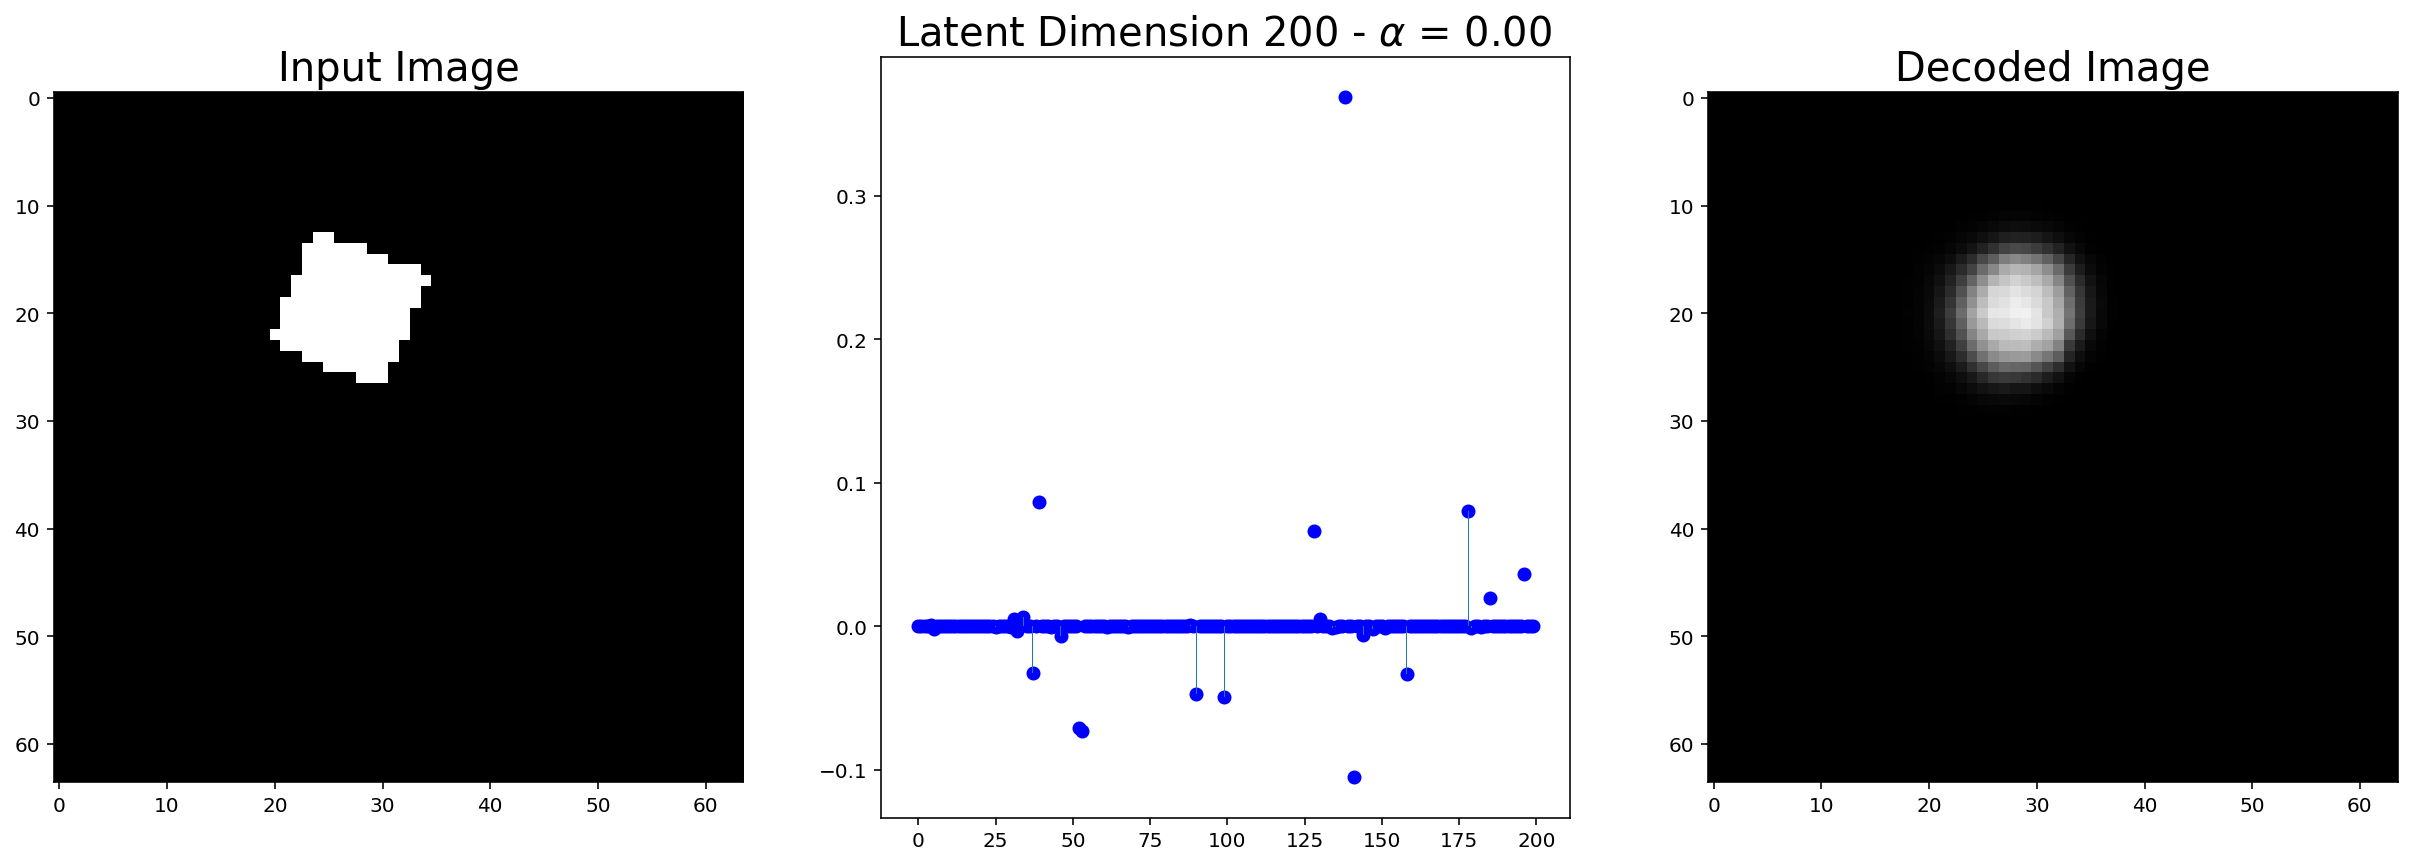

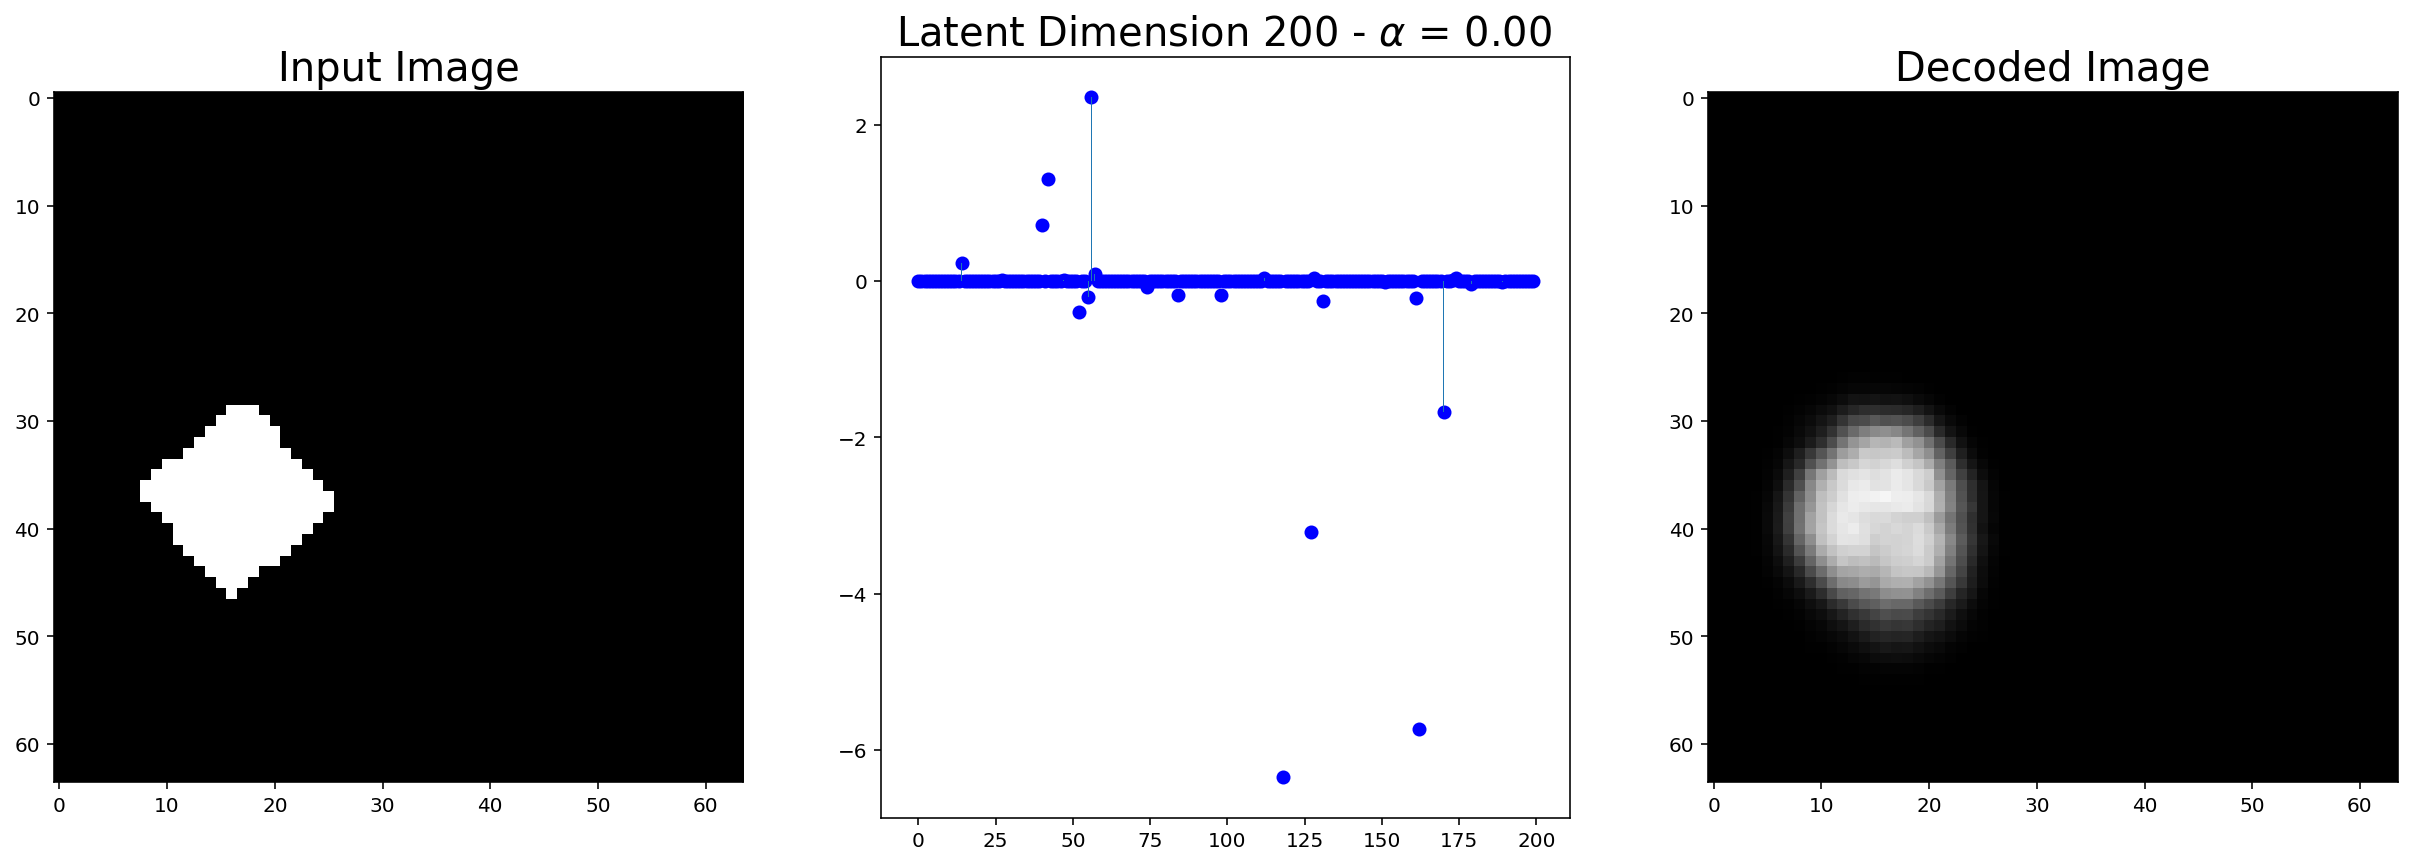

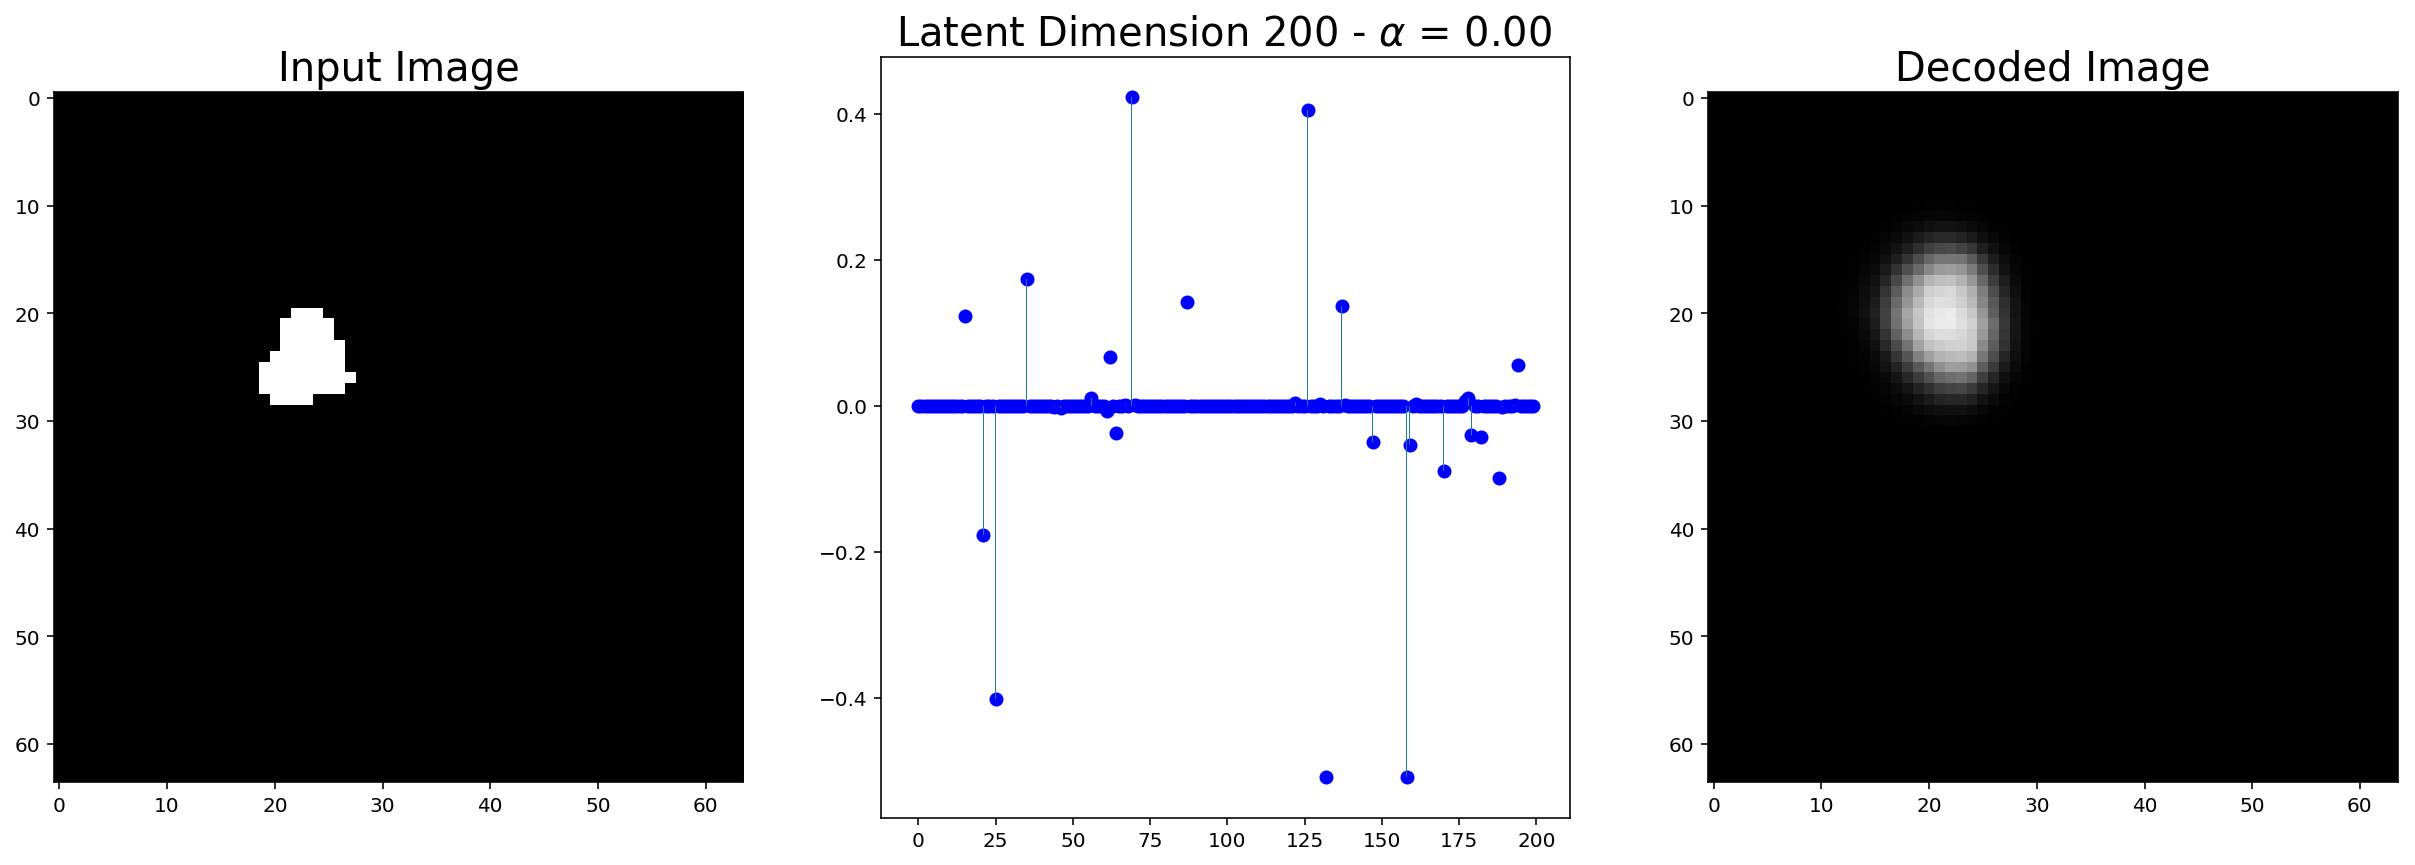

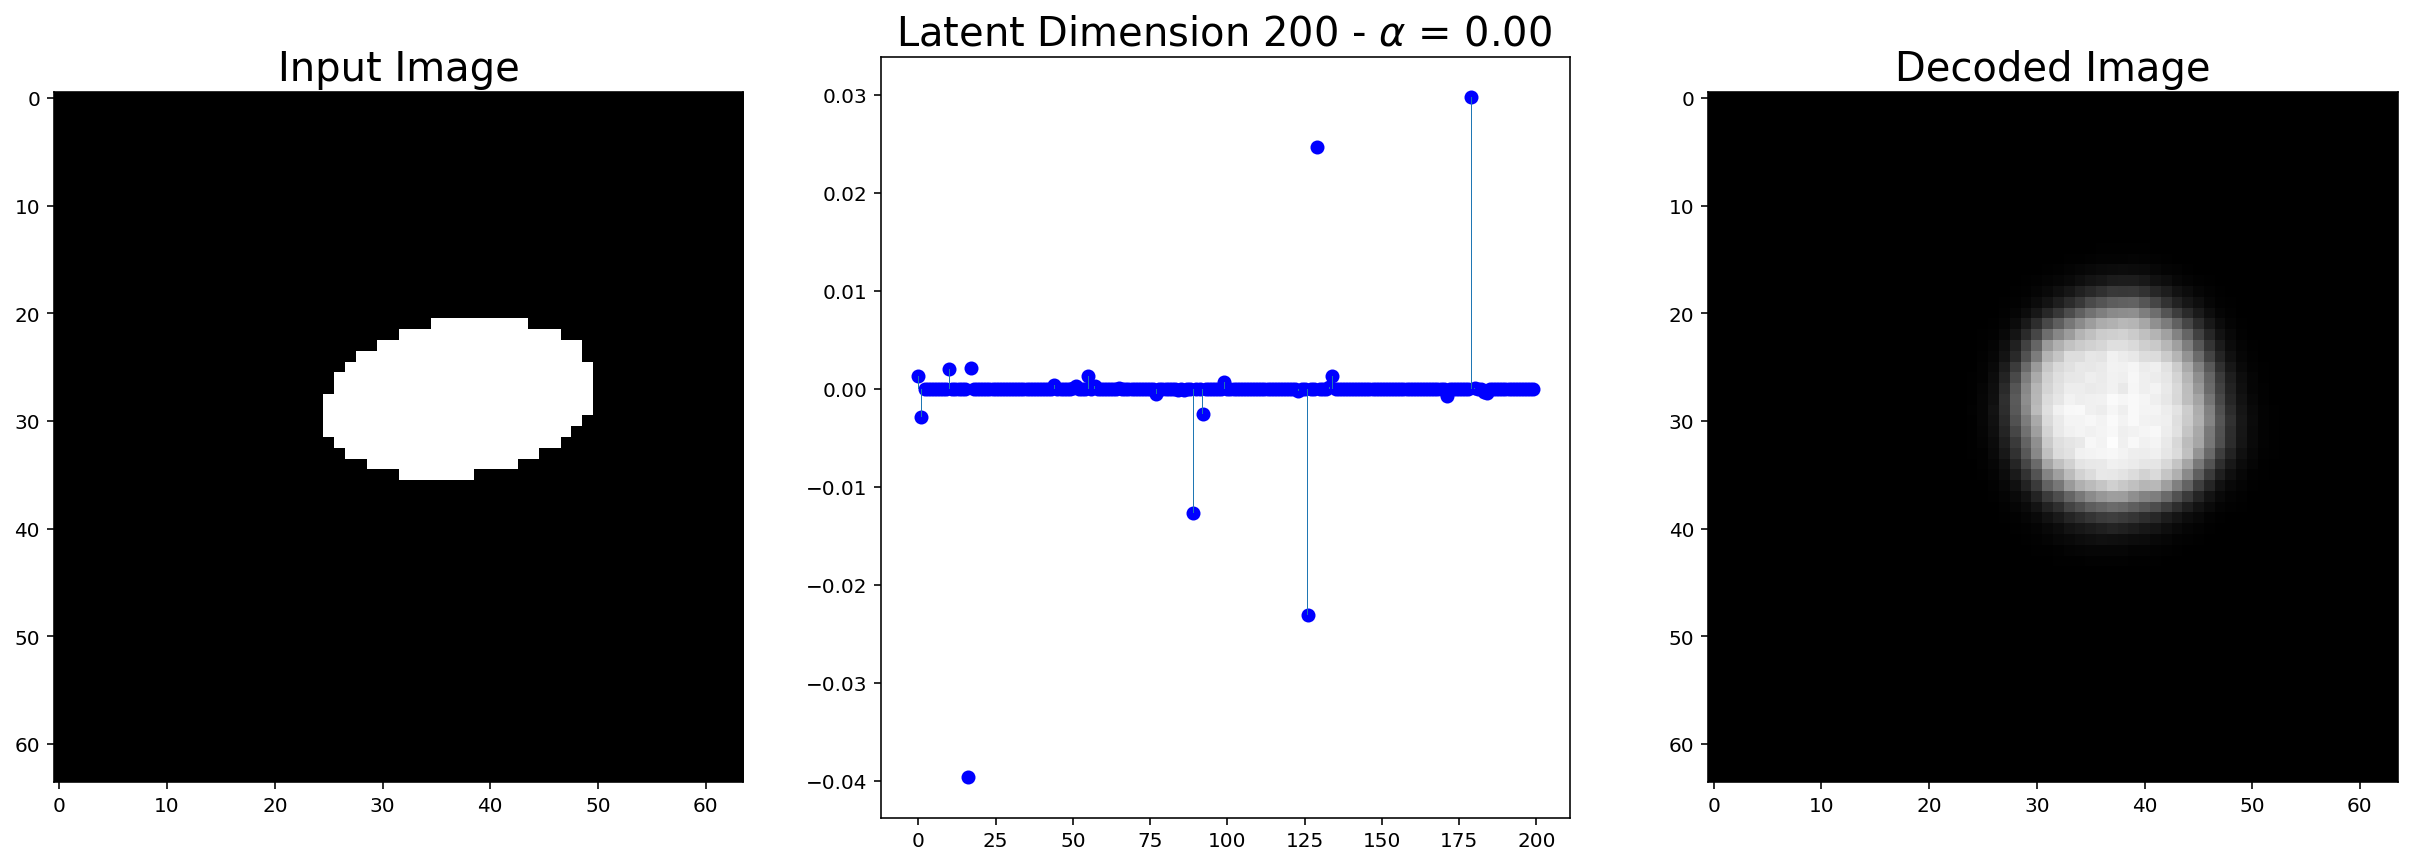

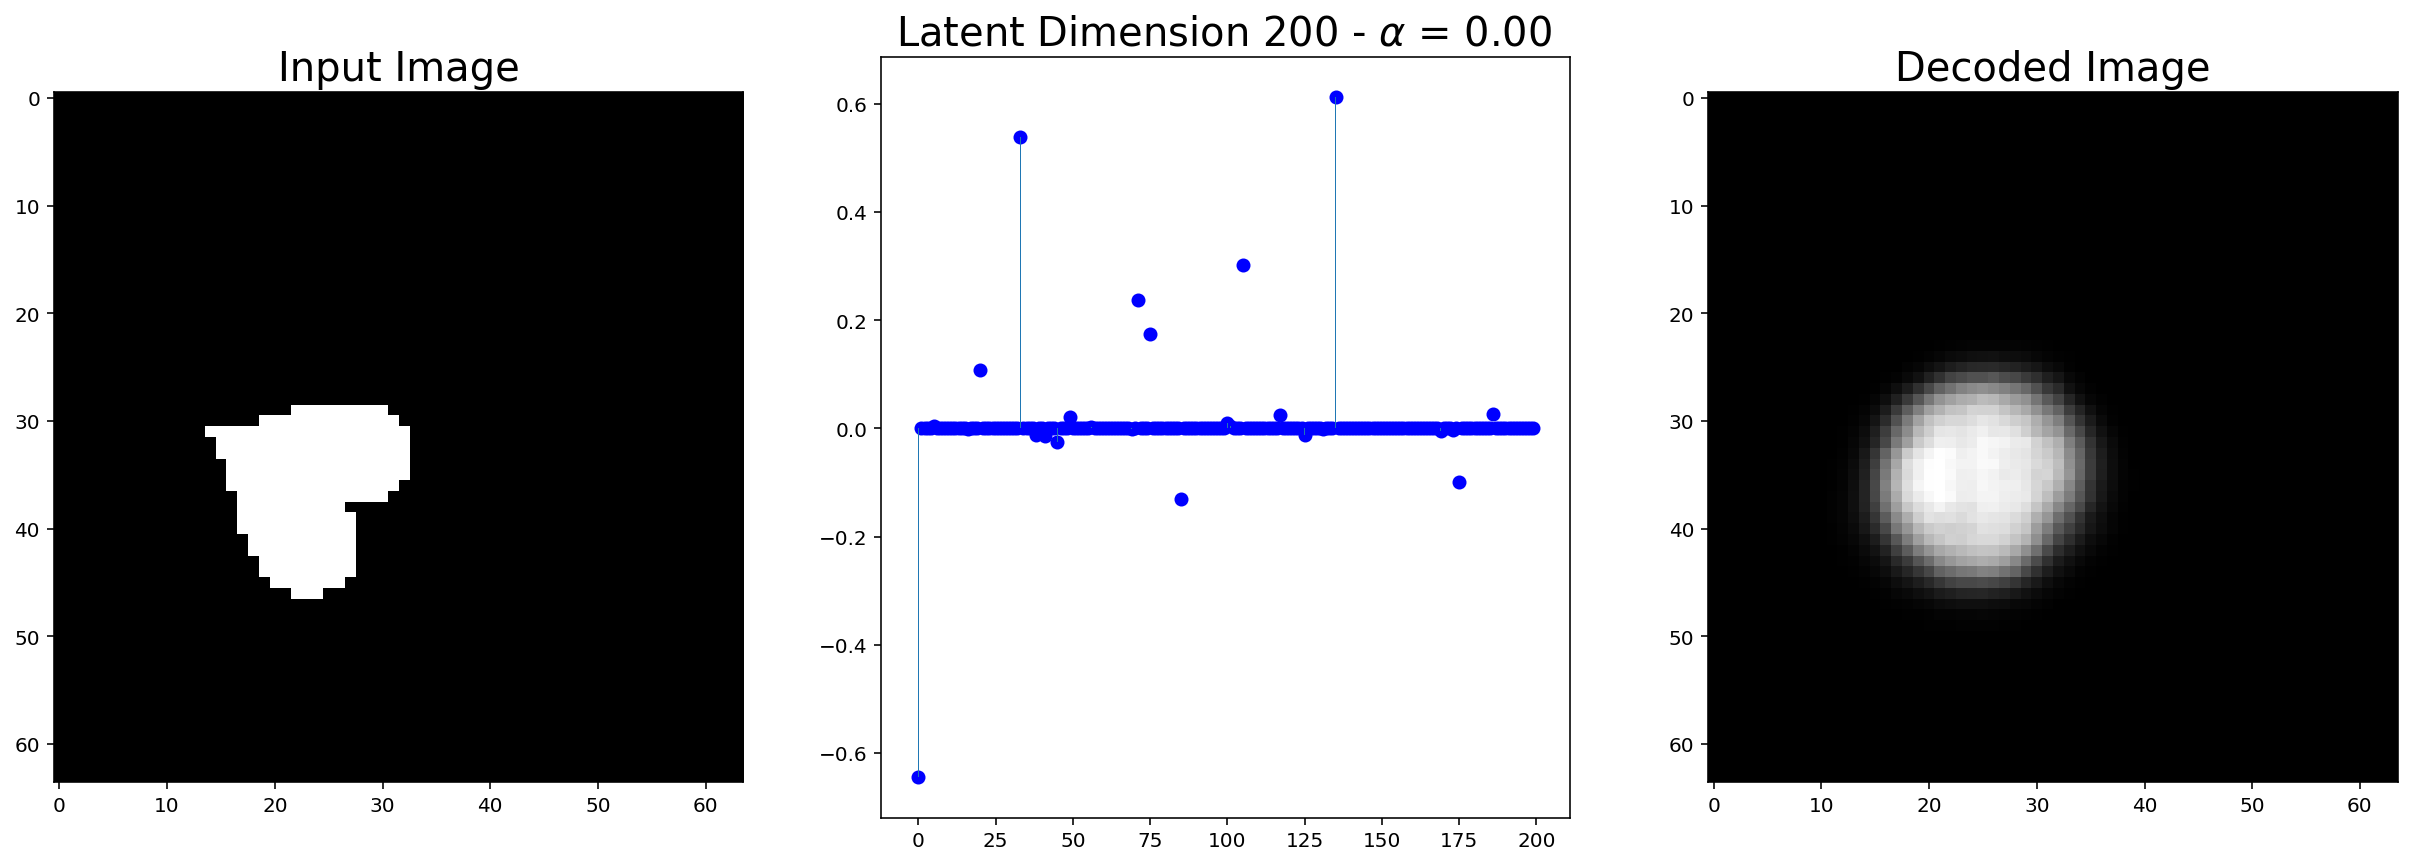

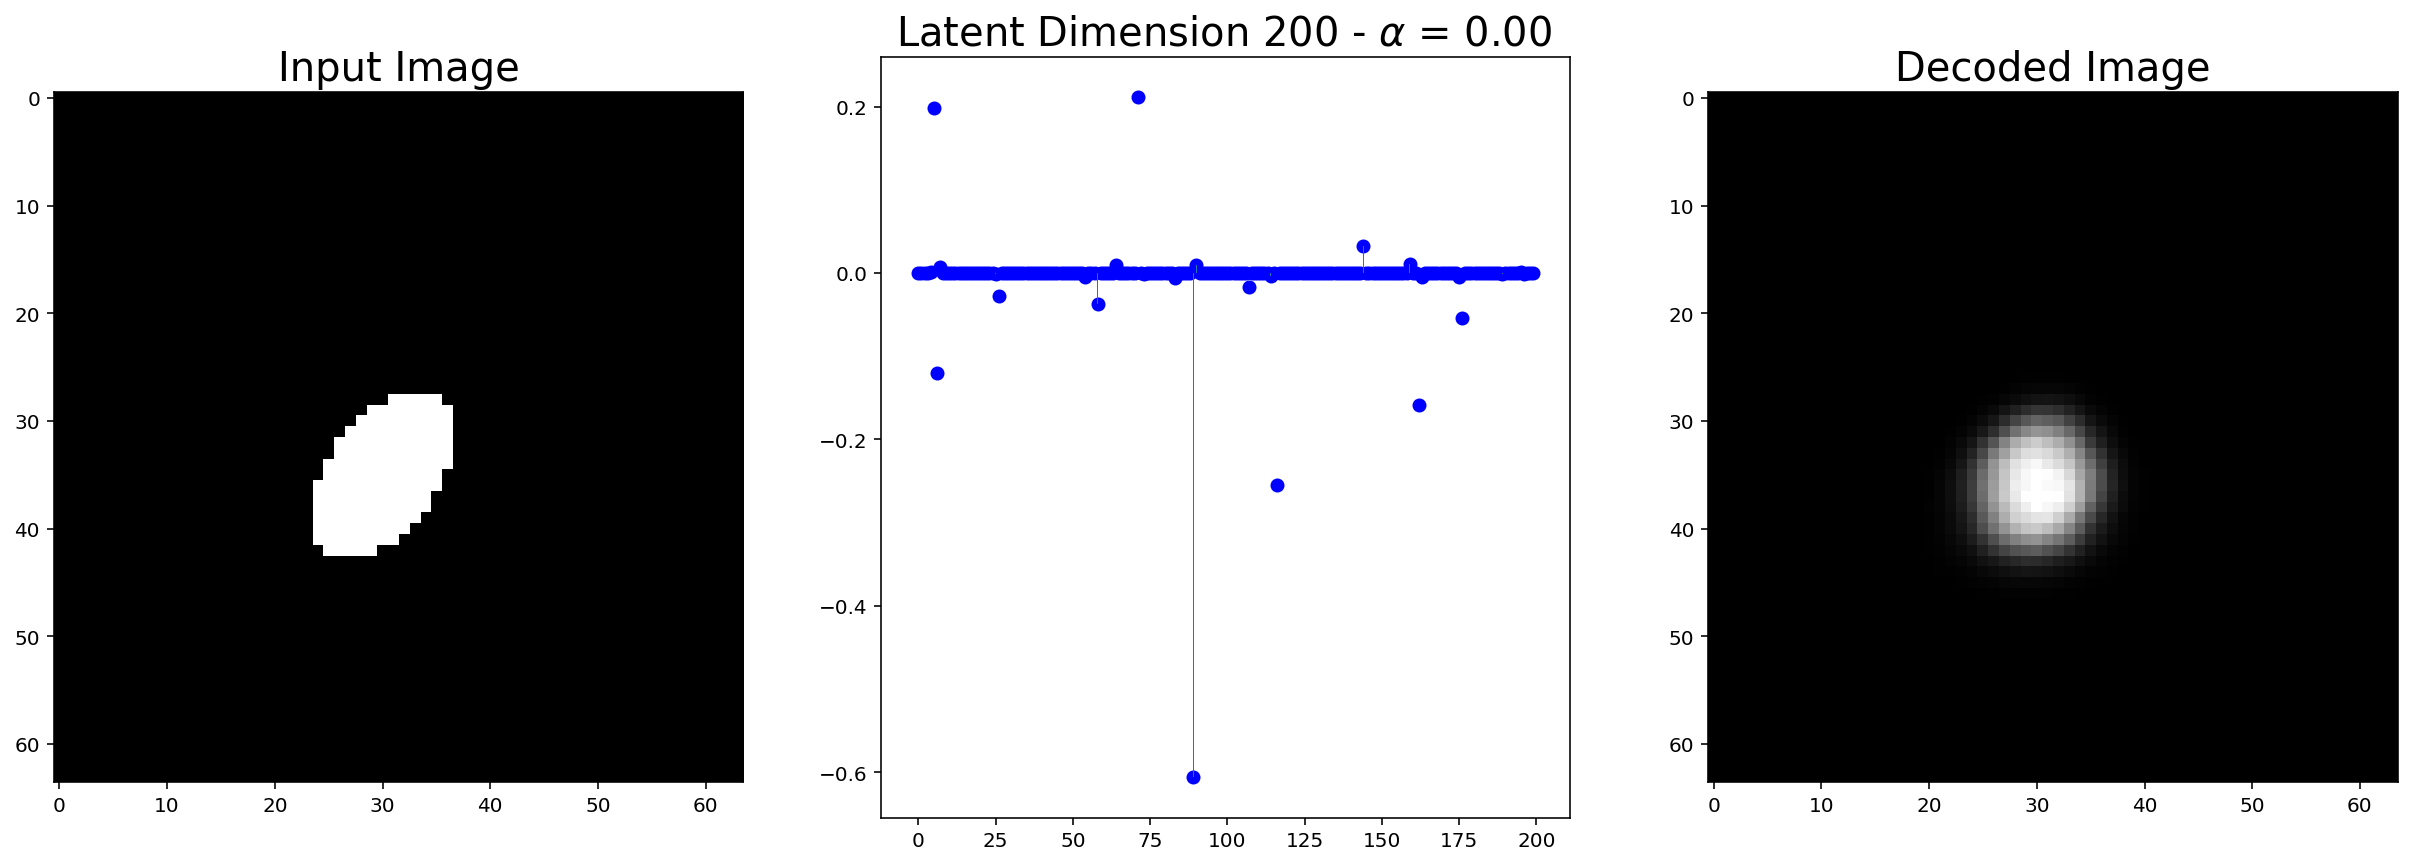

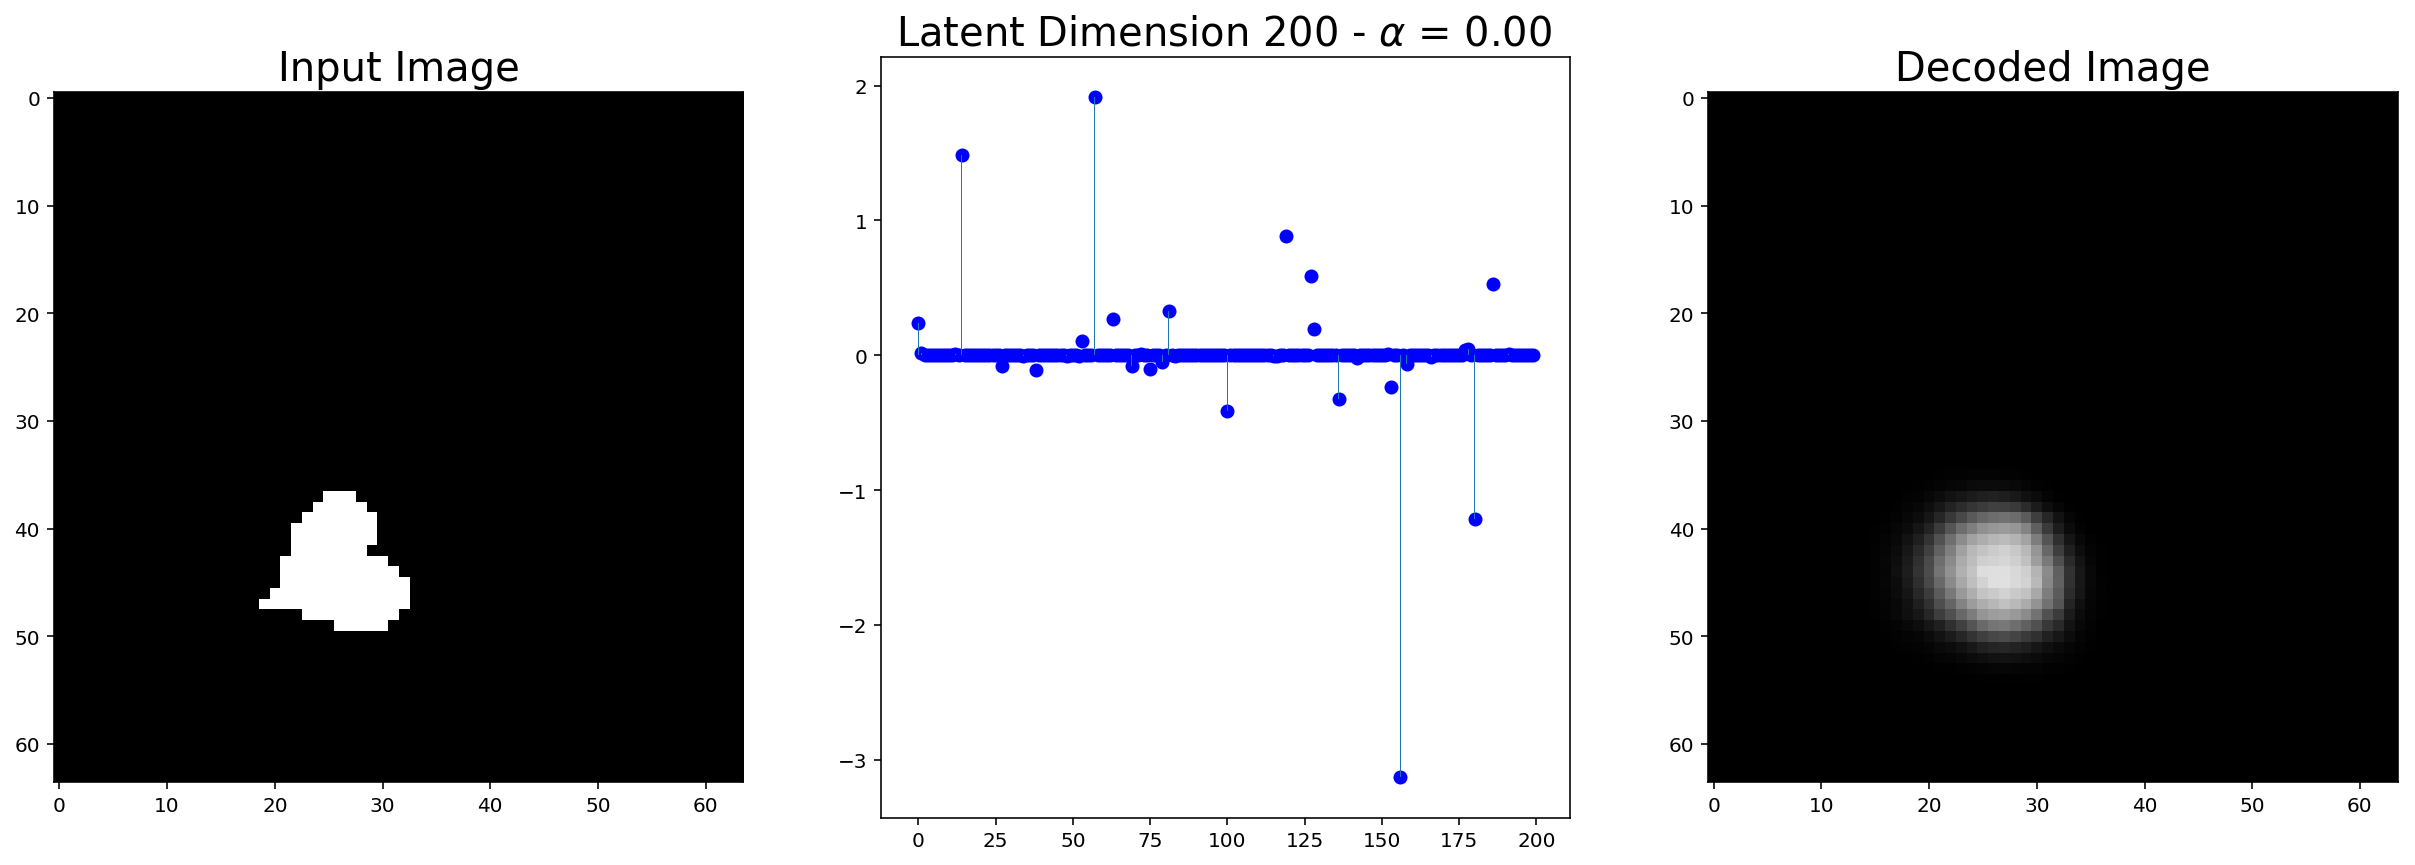

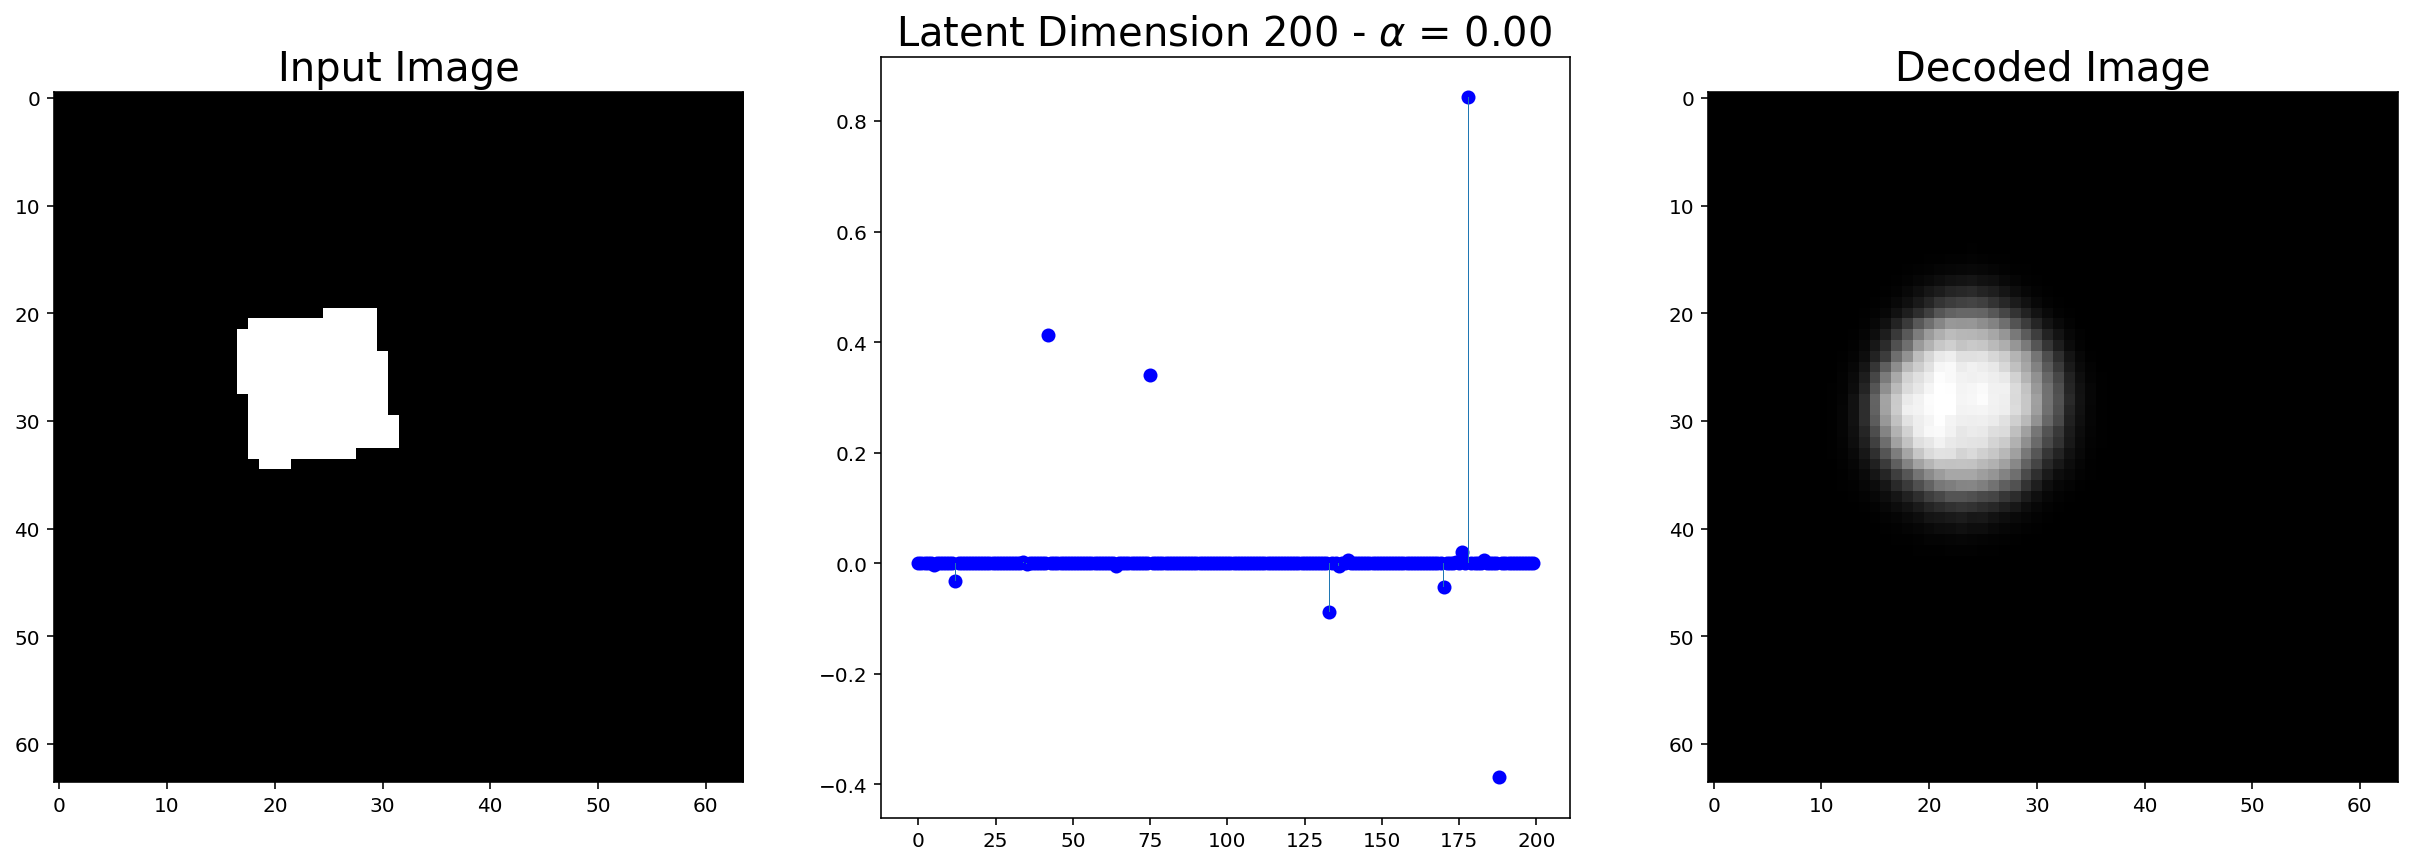

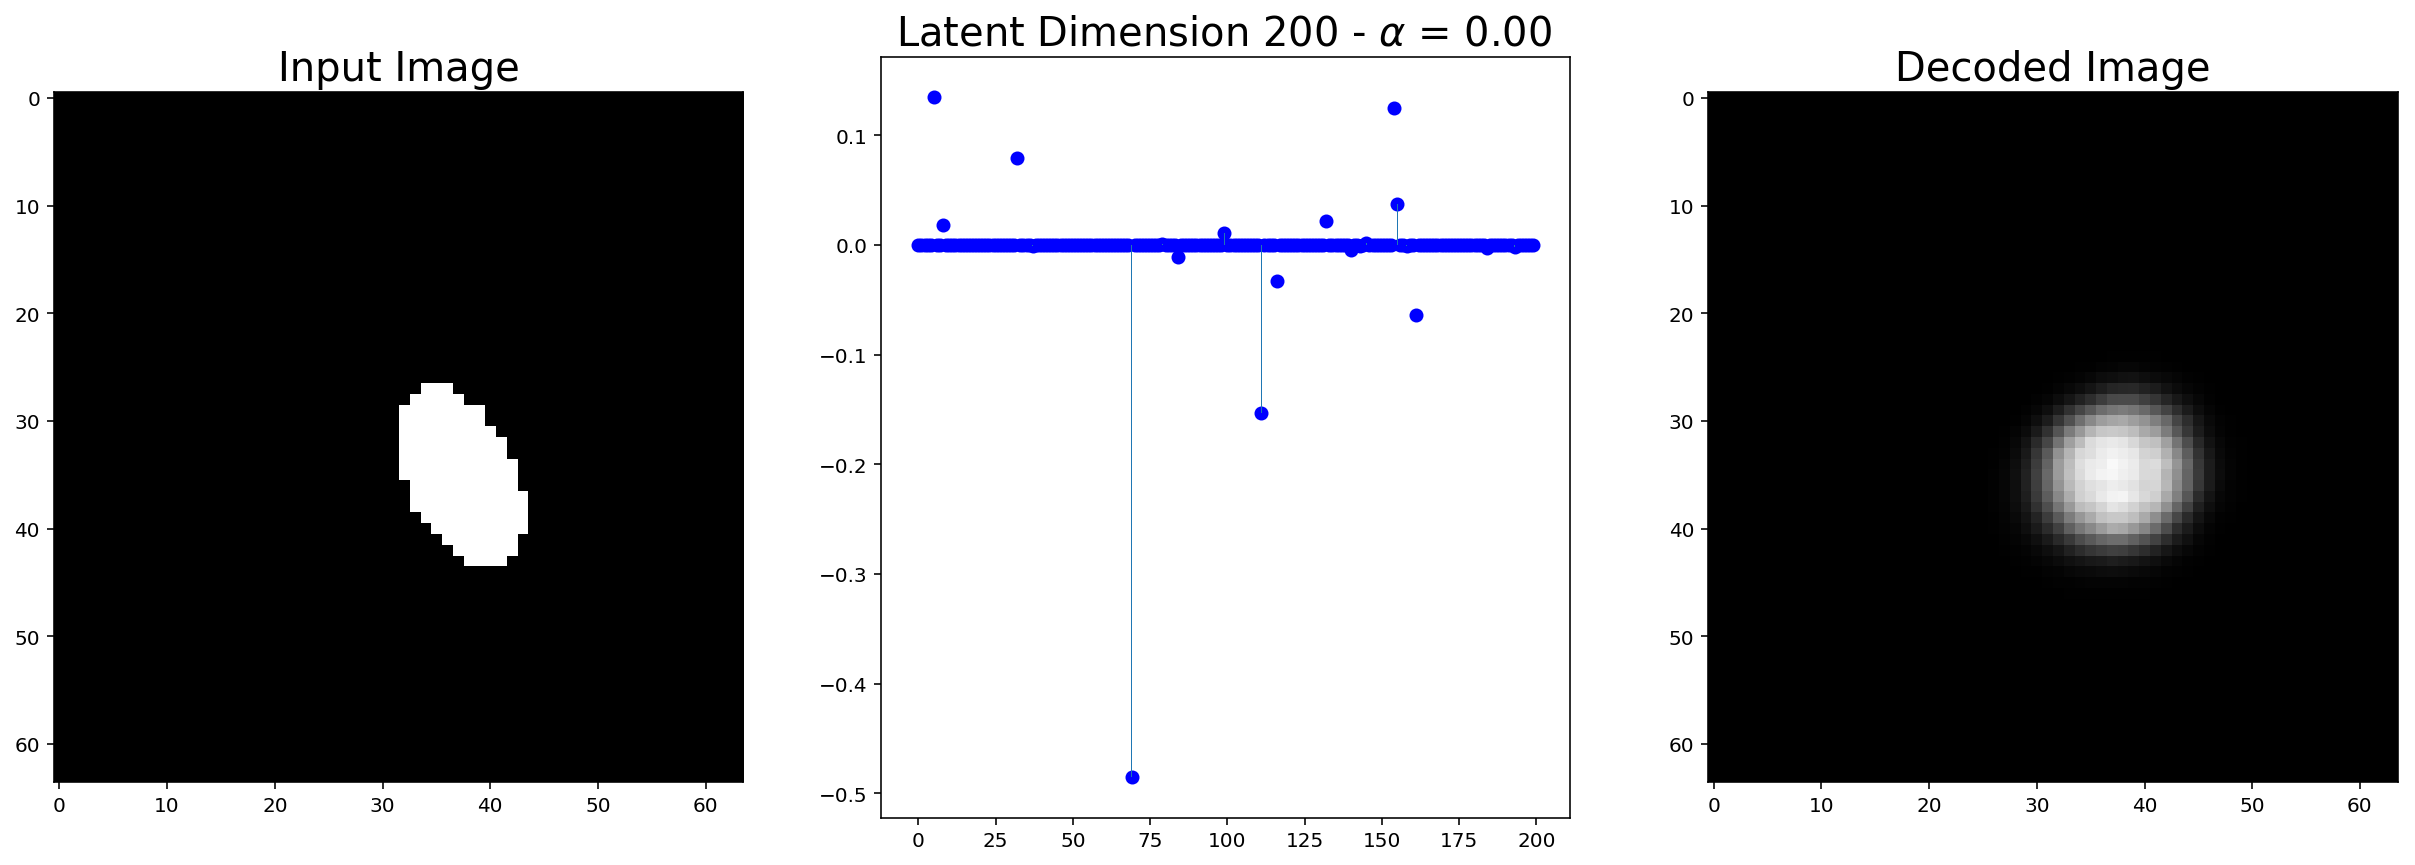

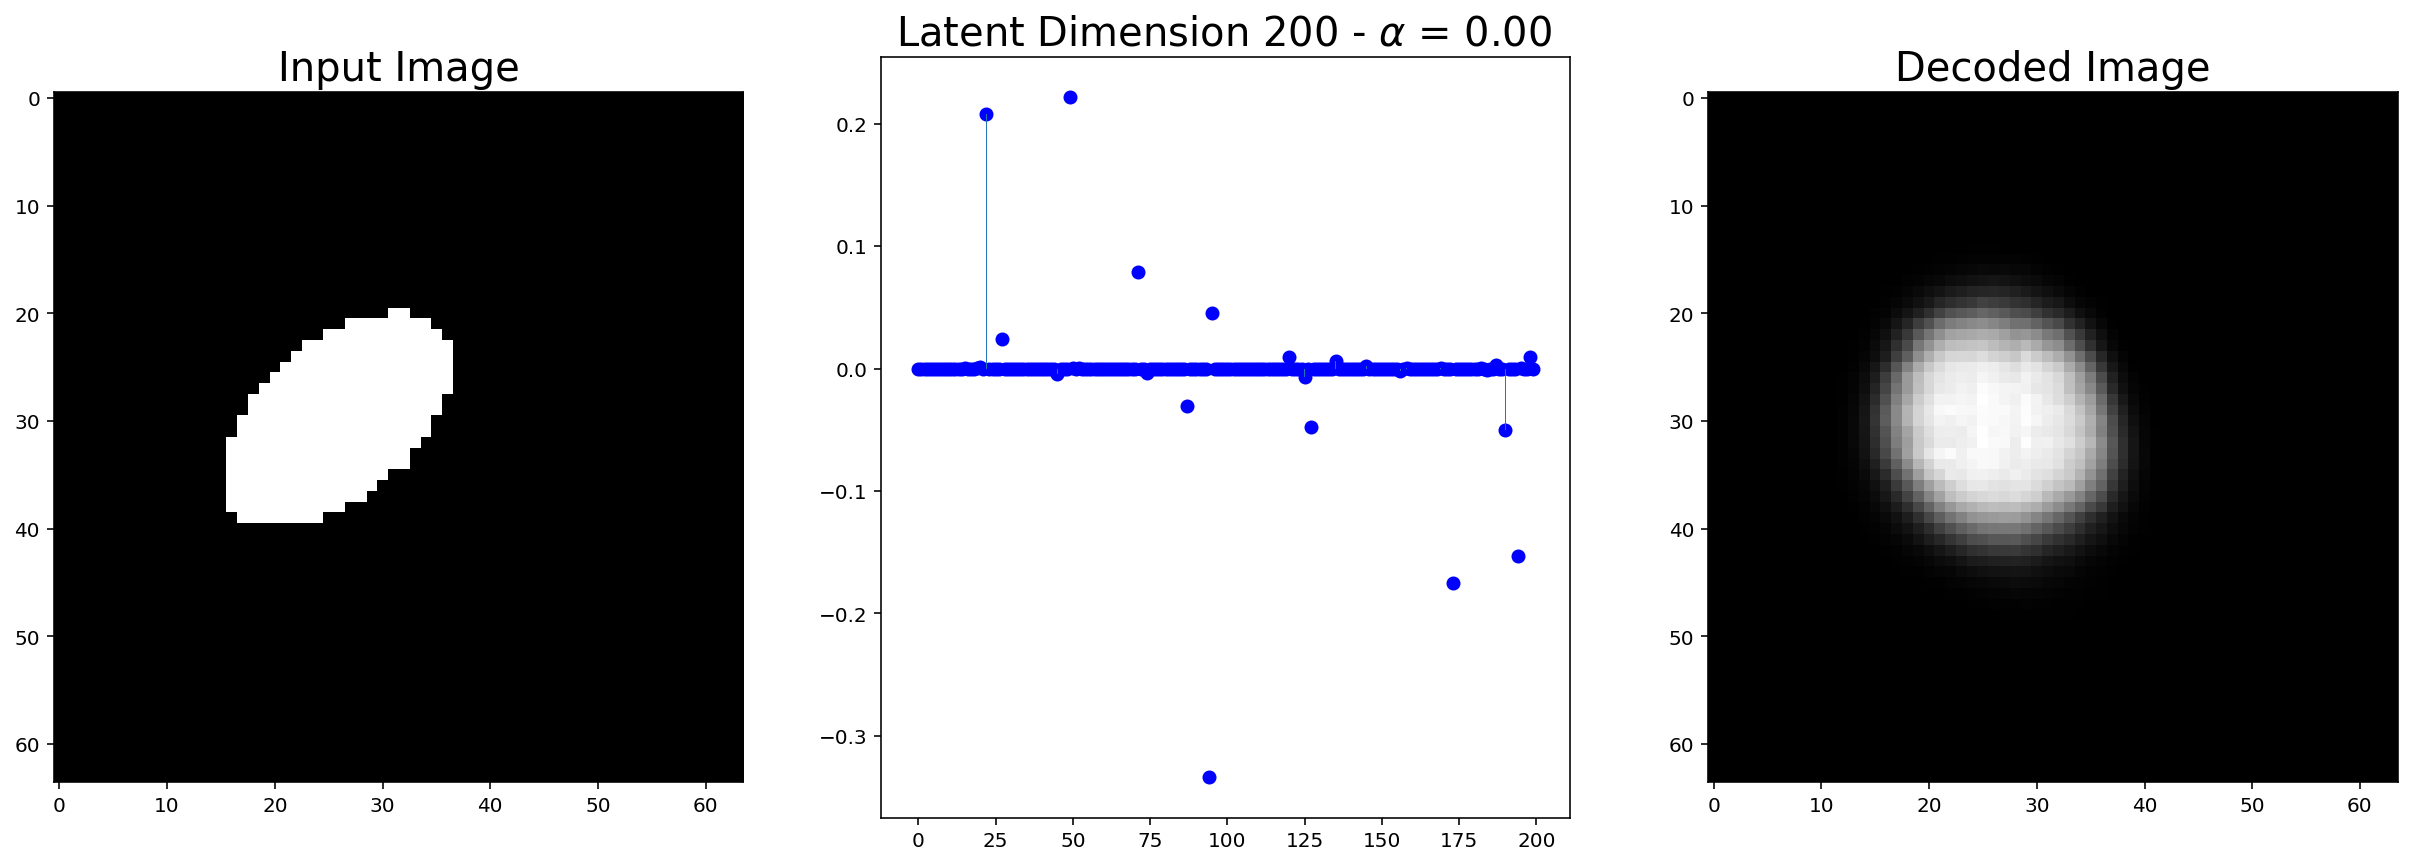

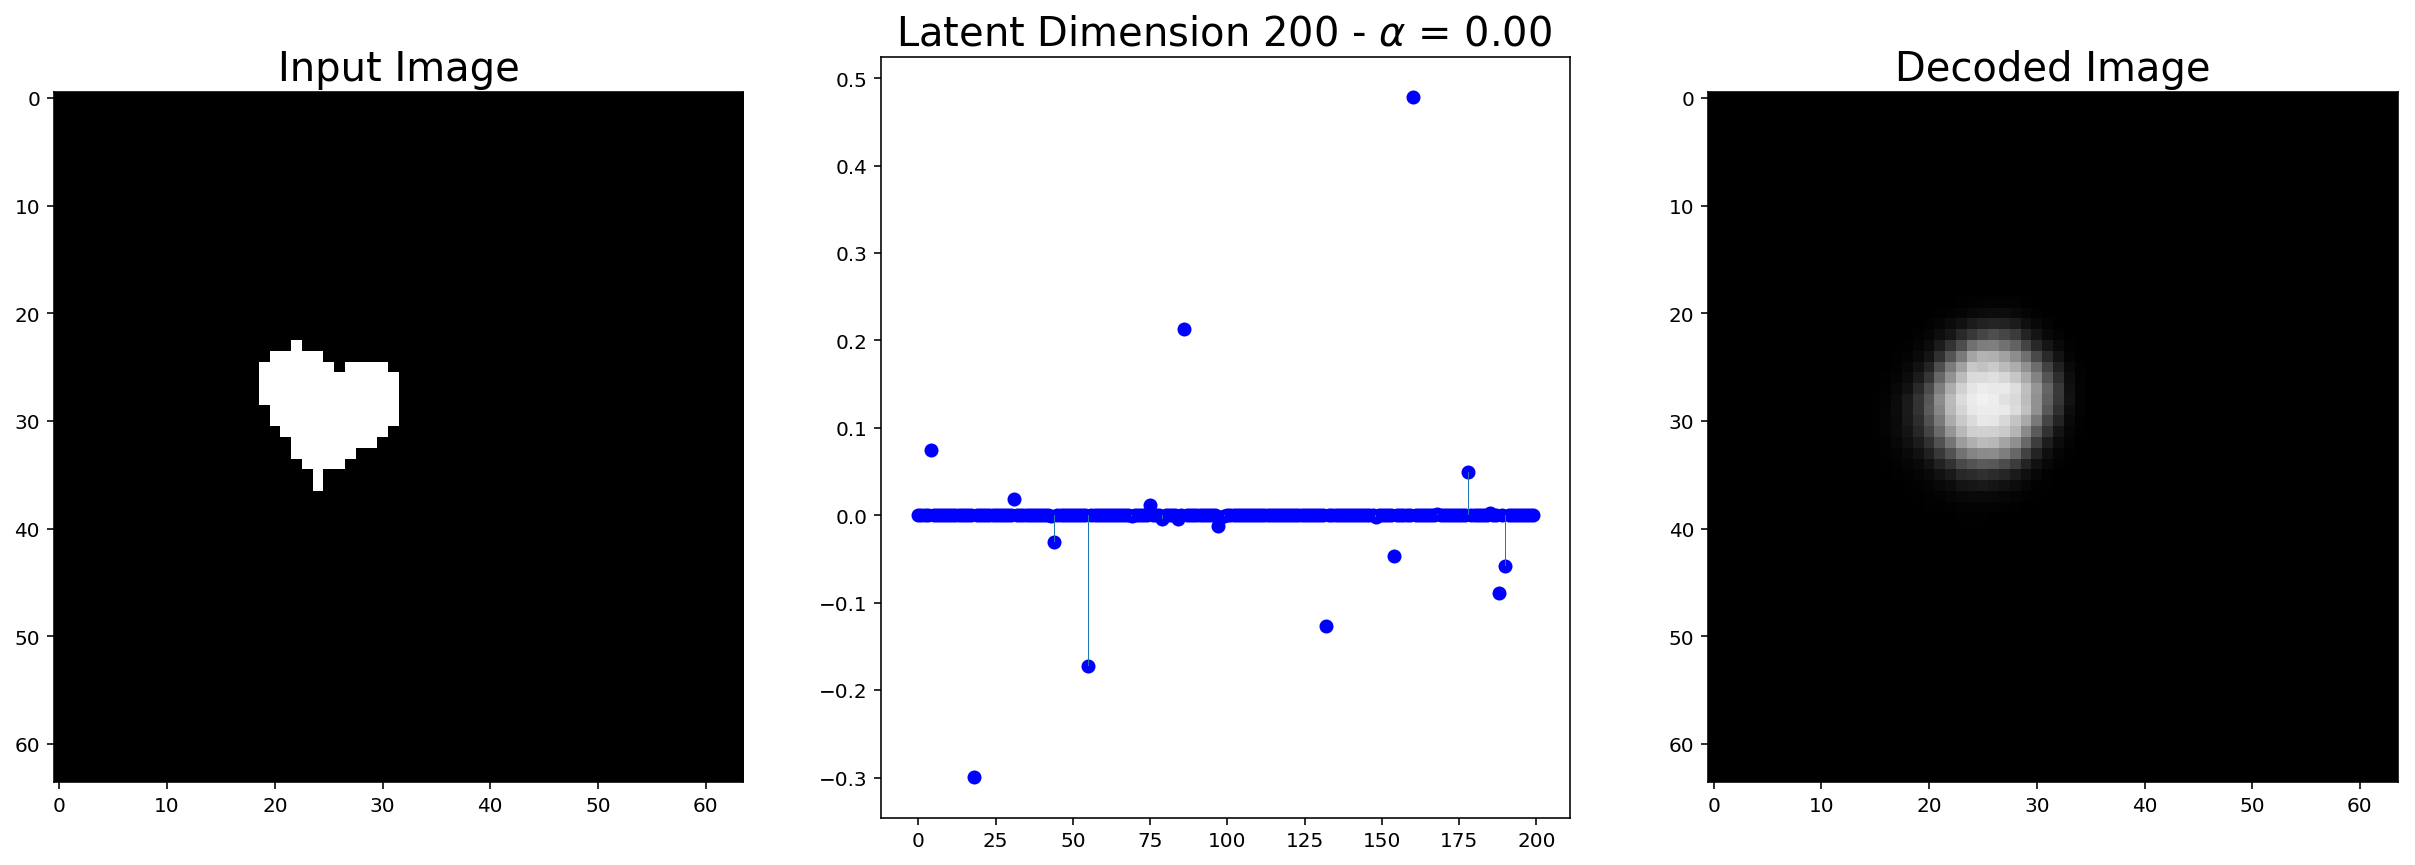

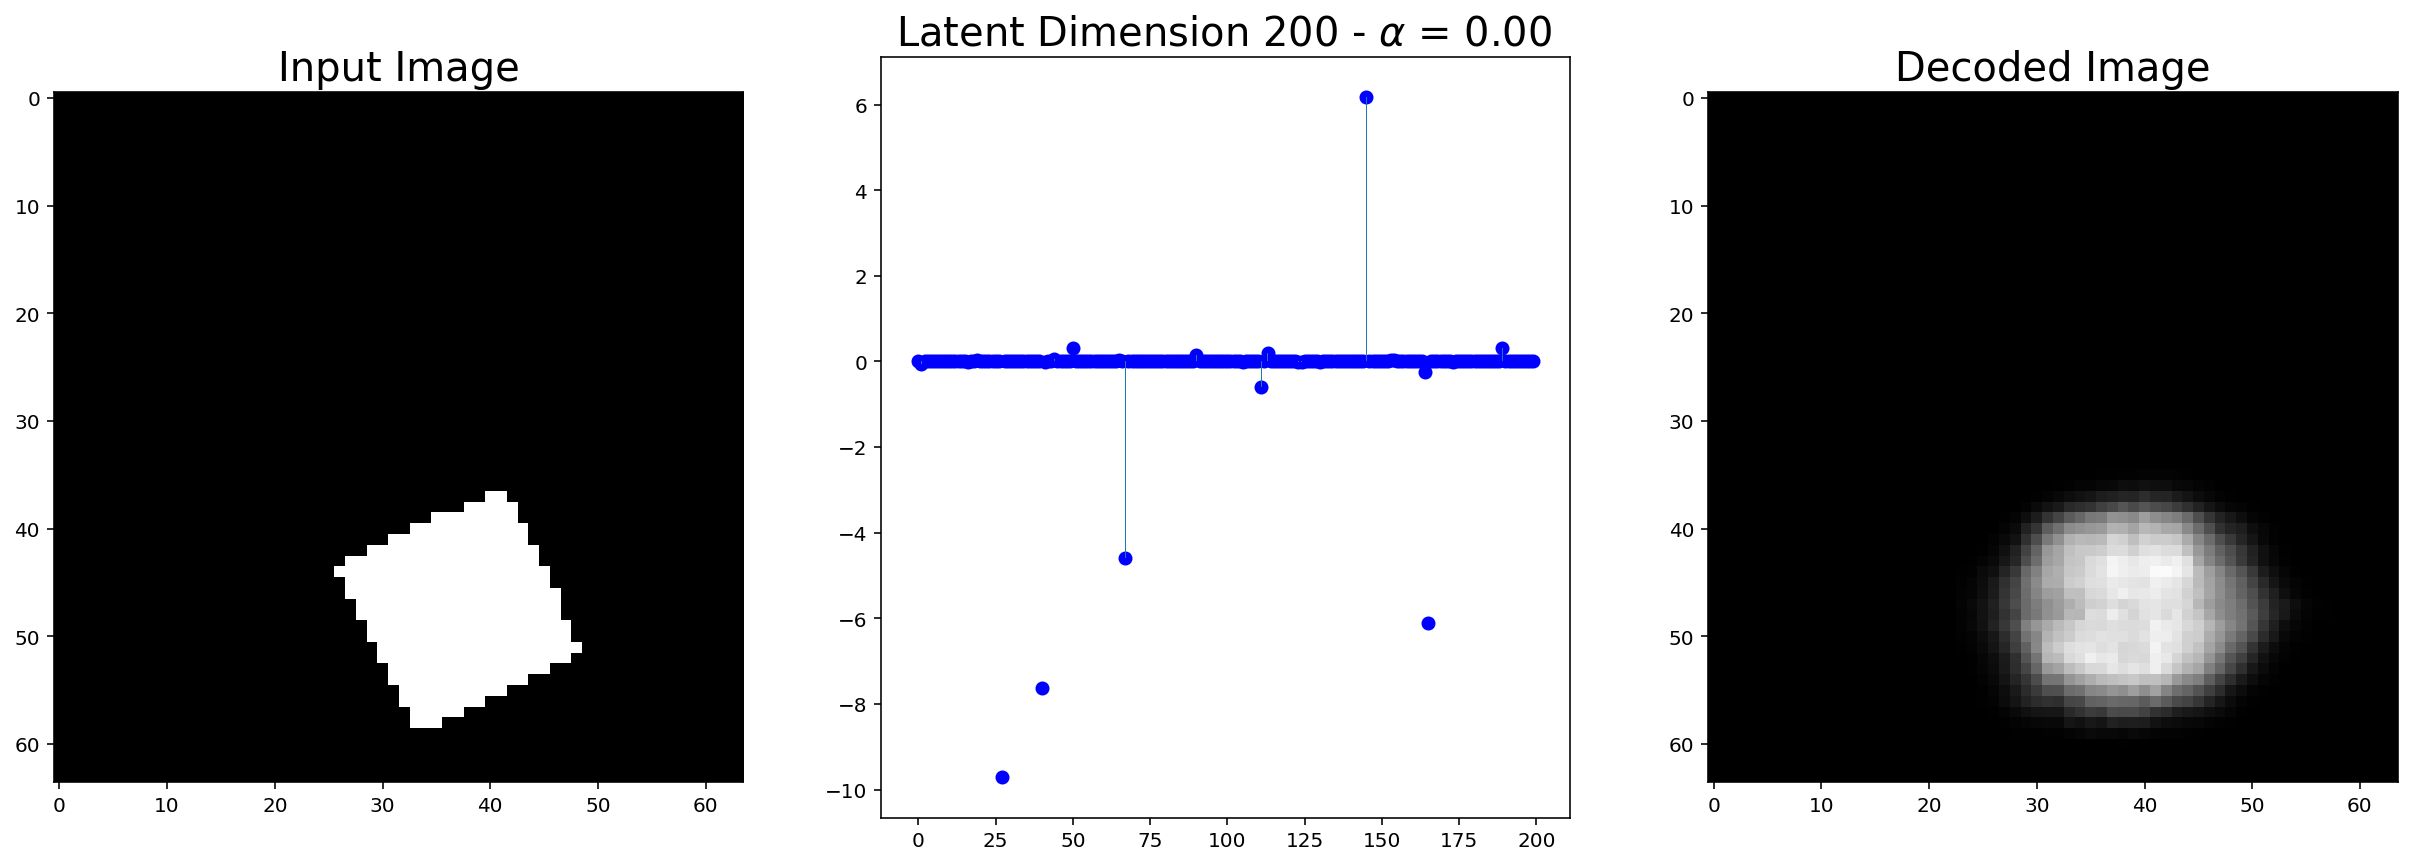

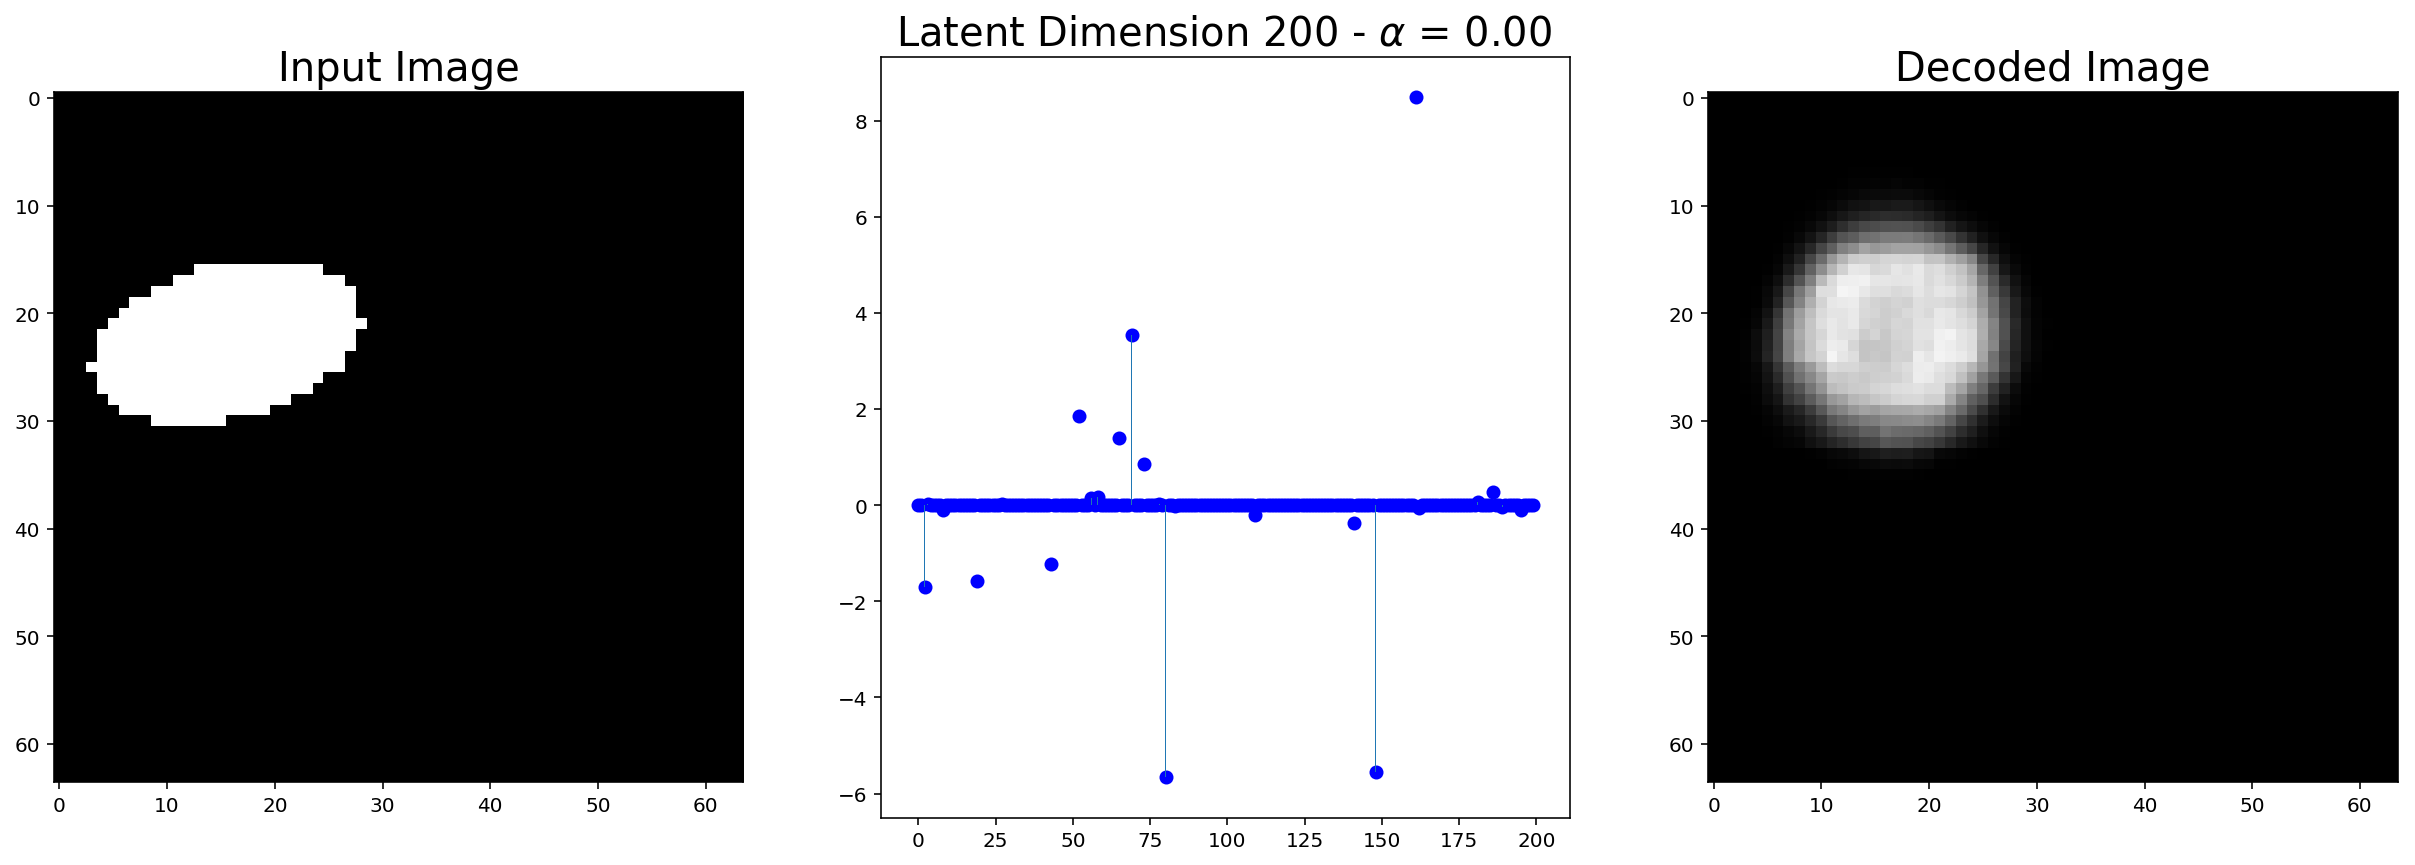

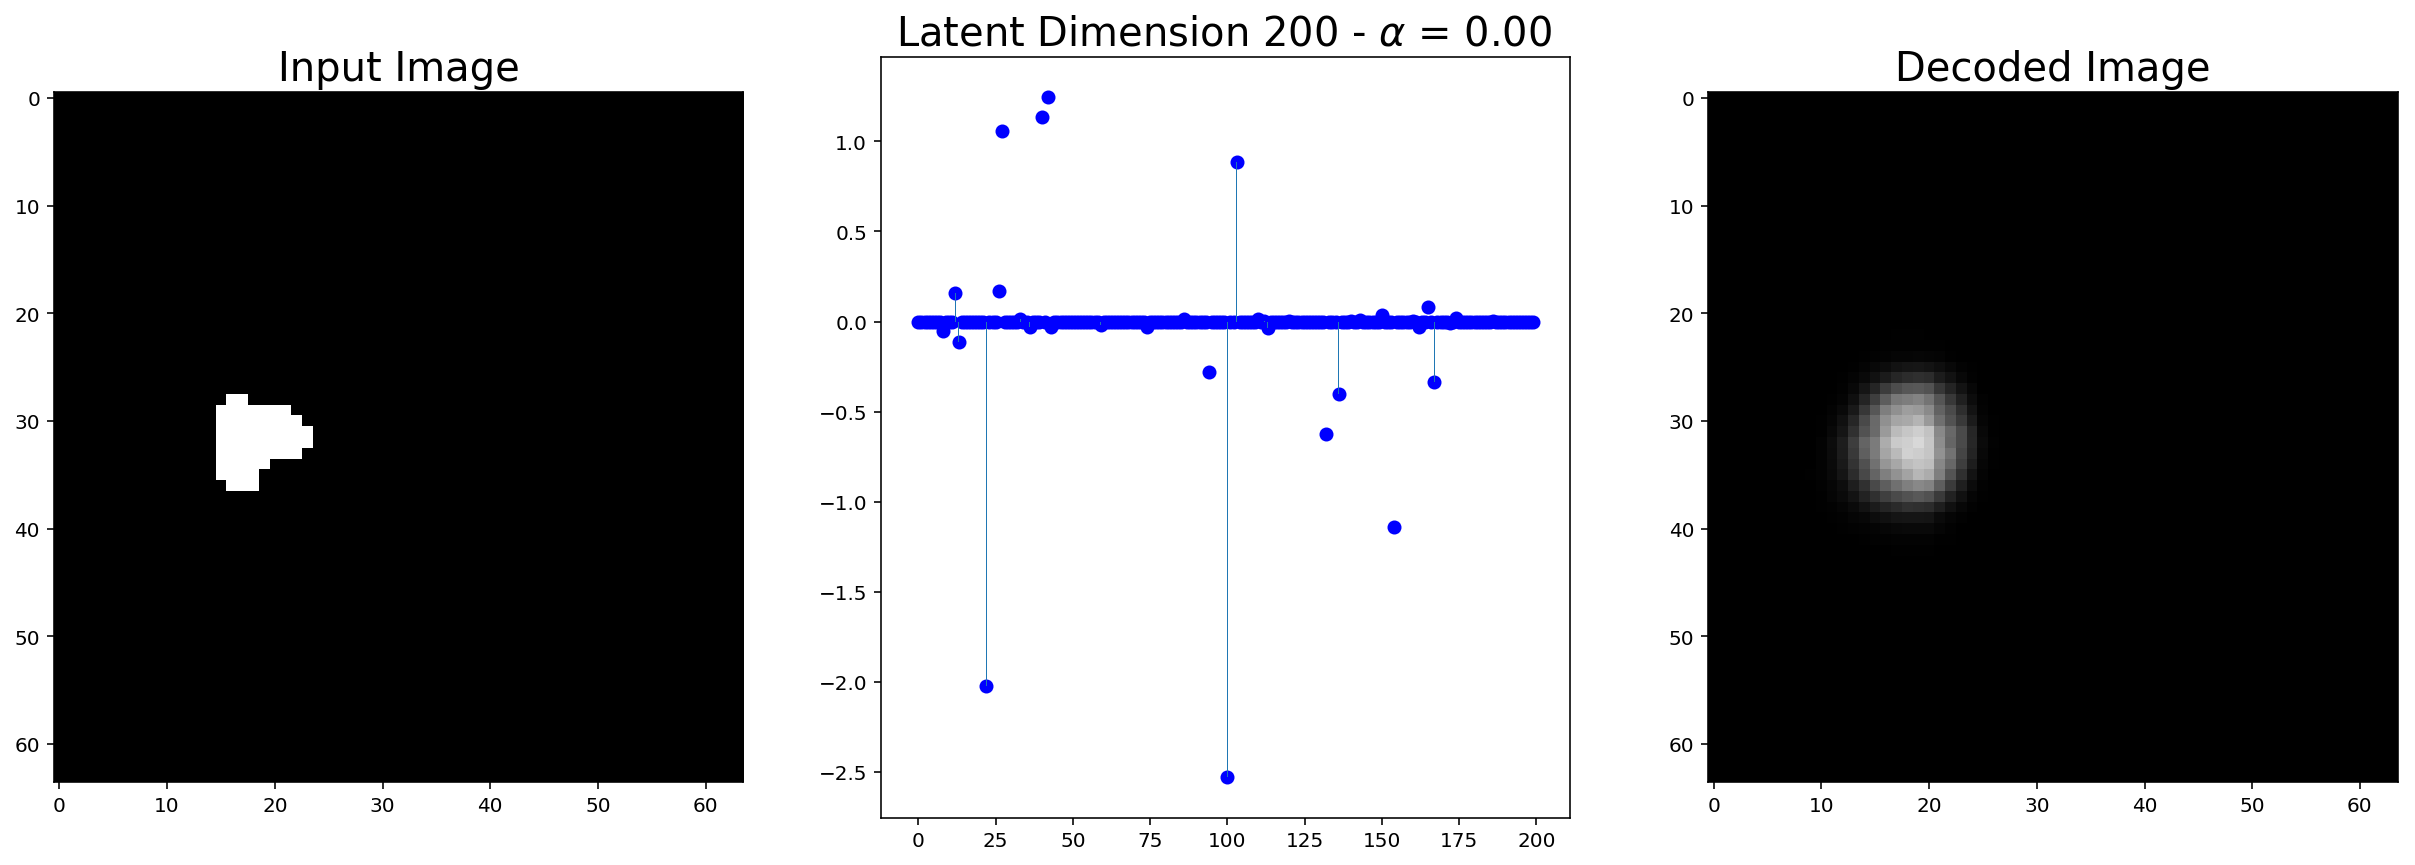

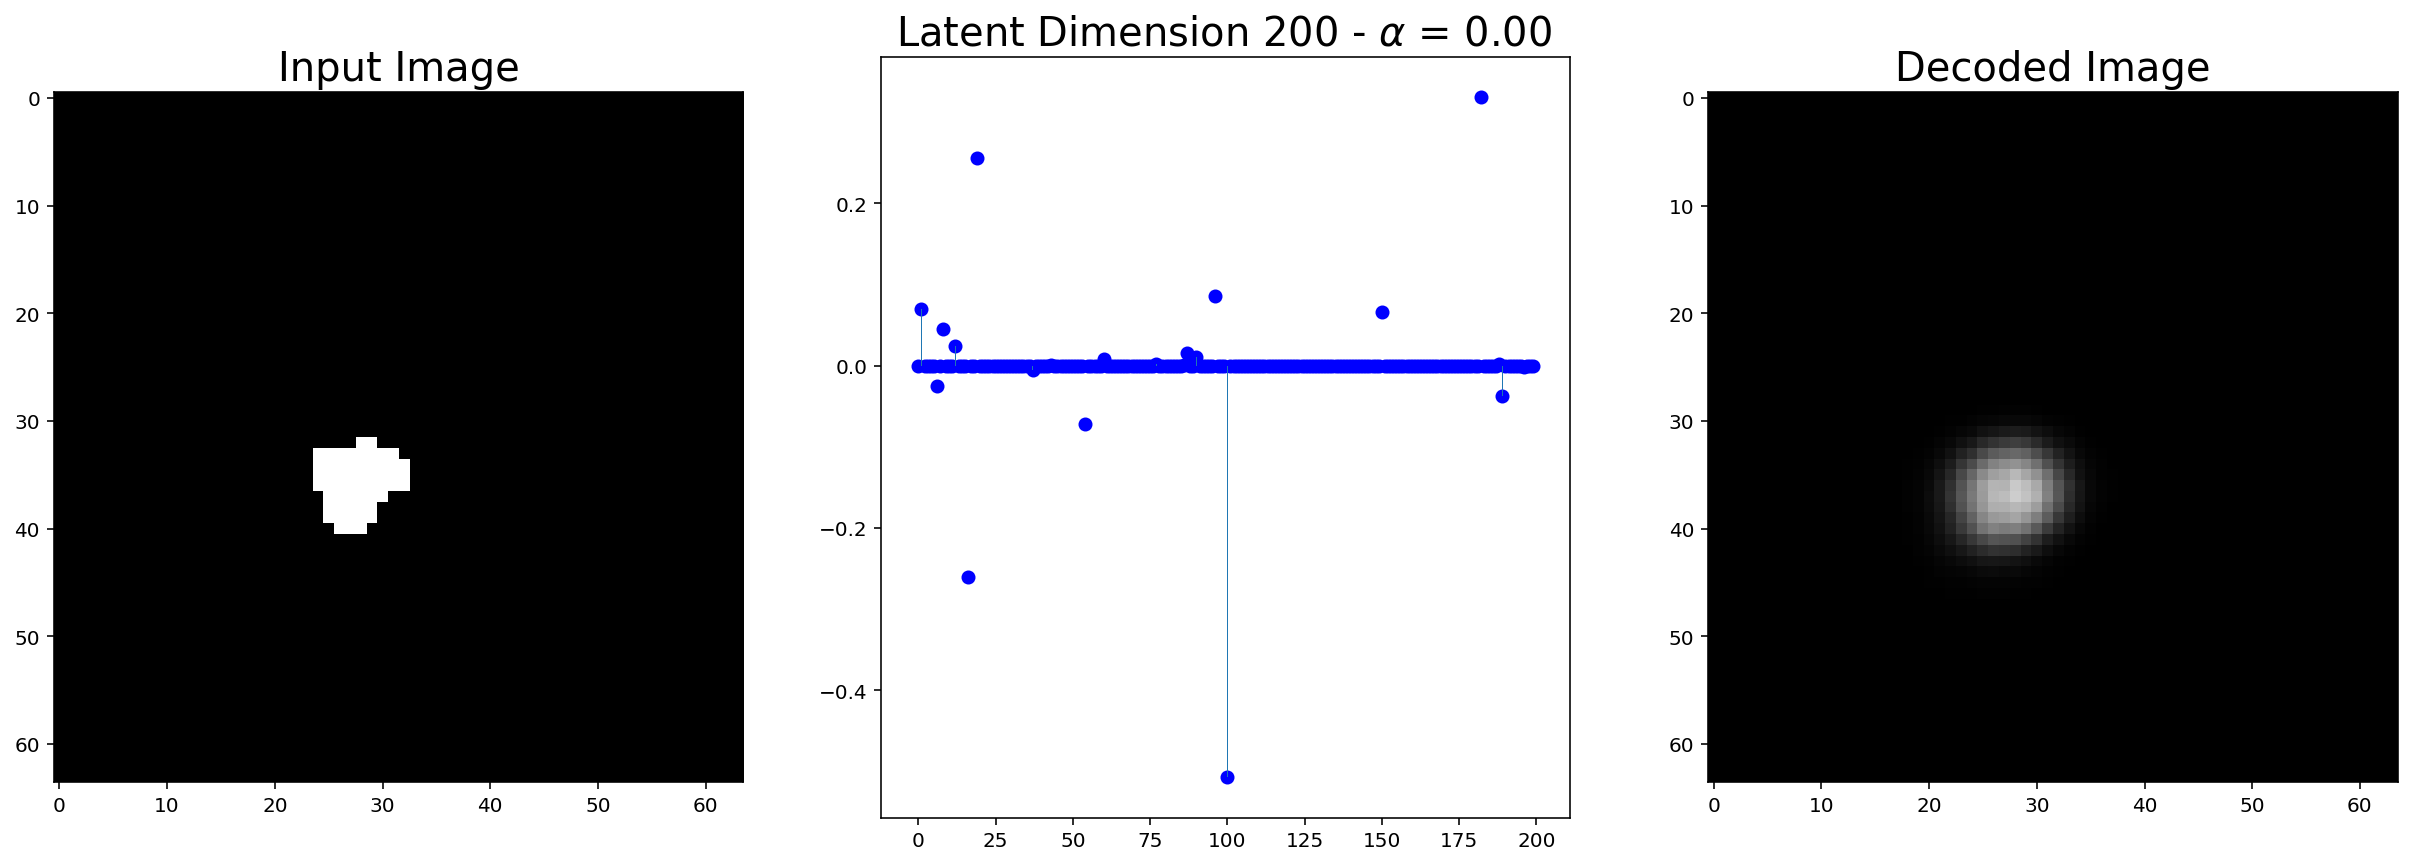

In [72]:
for i in range(15):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

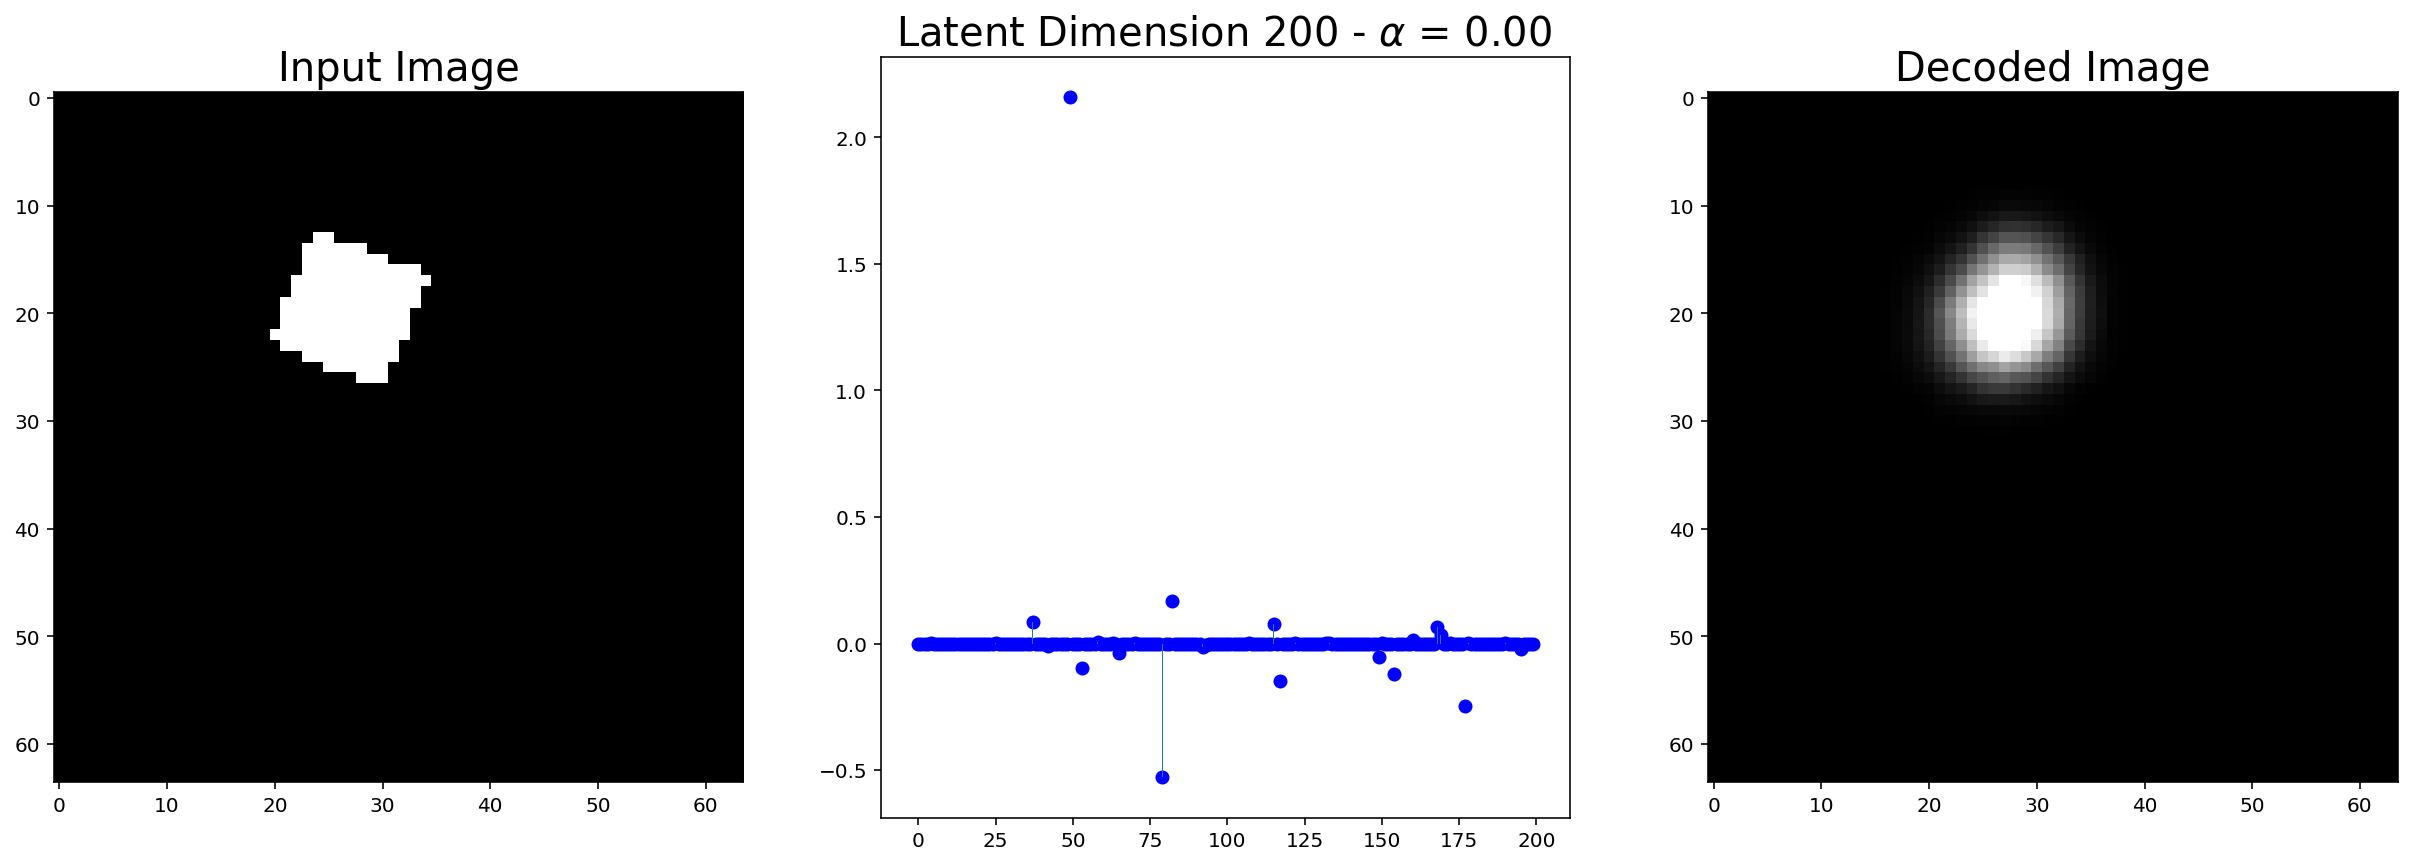

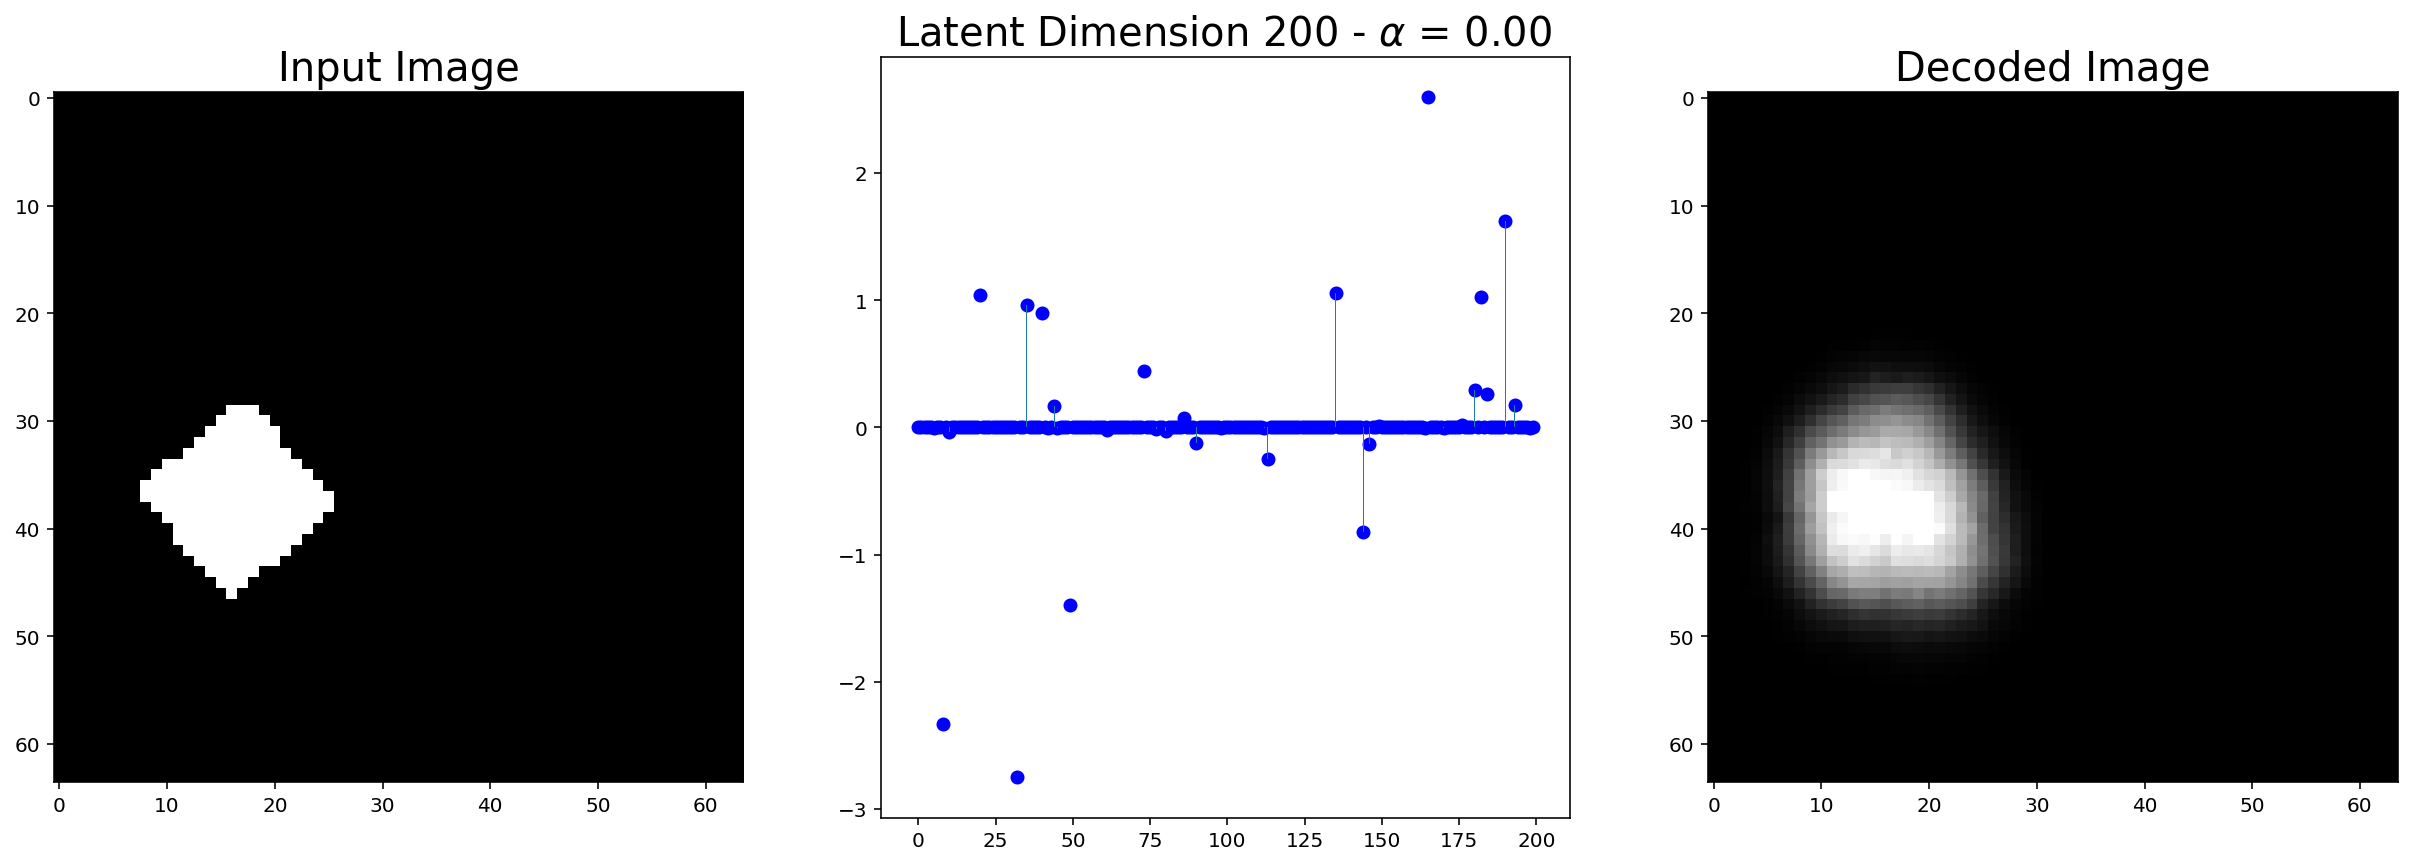

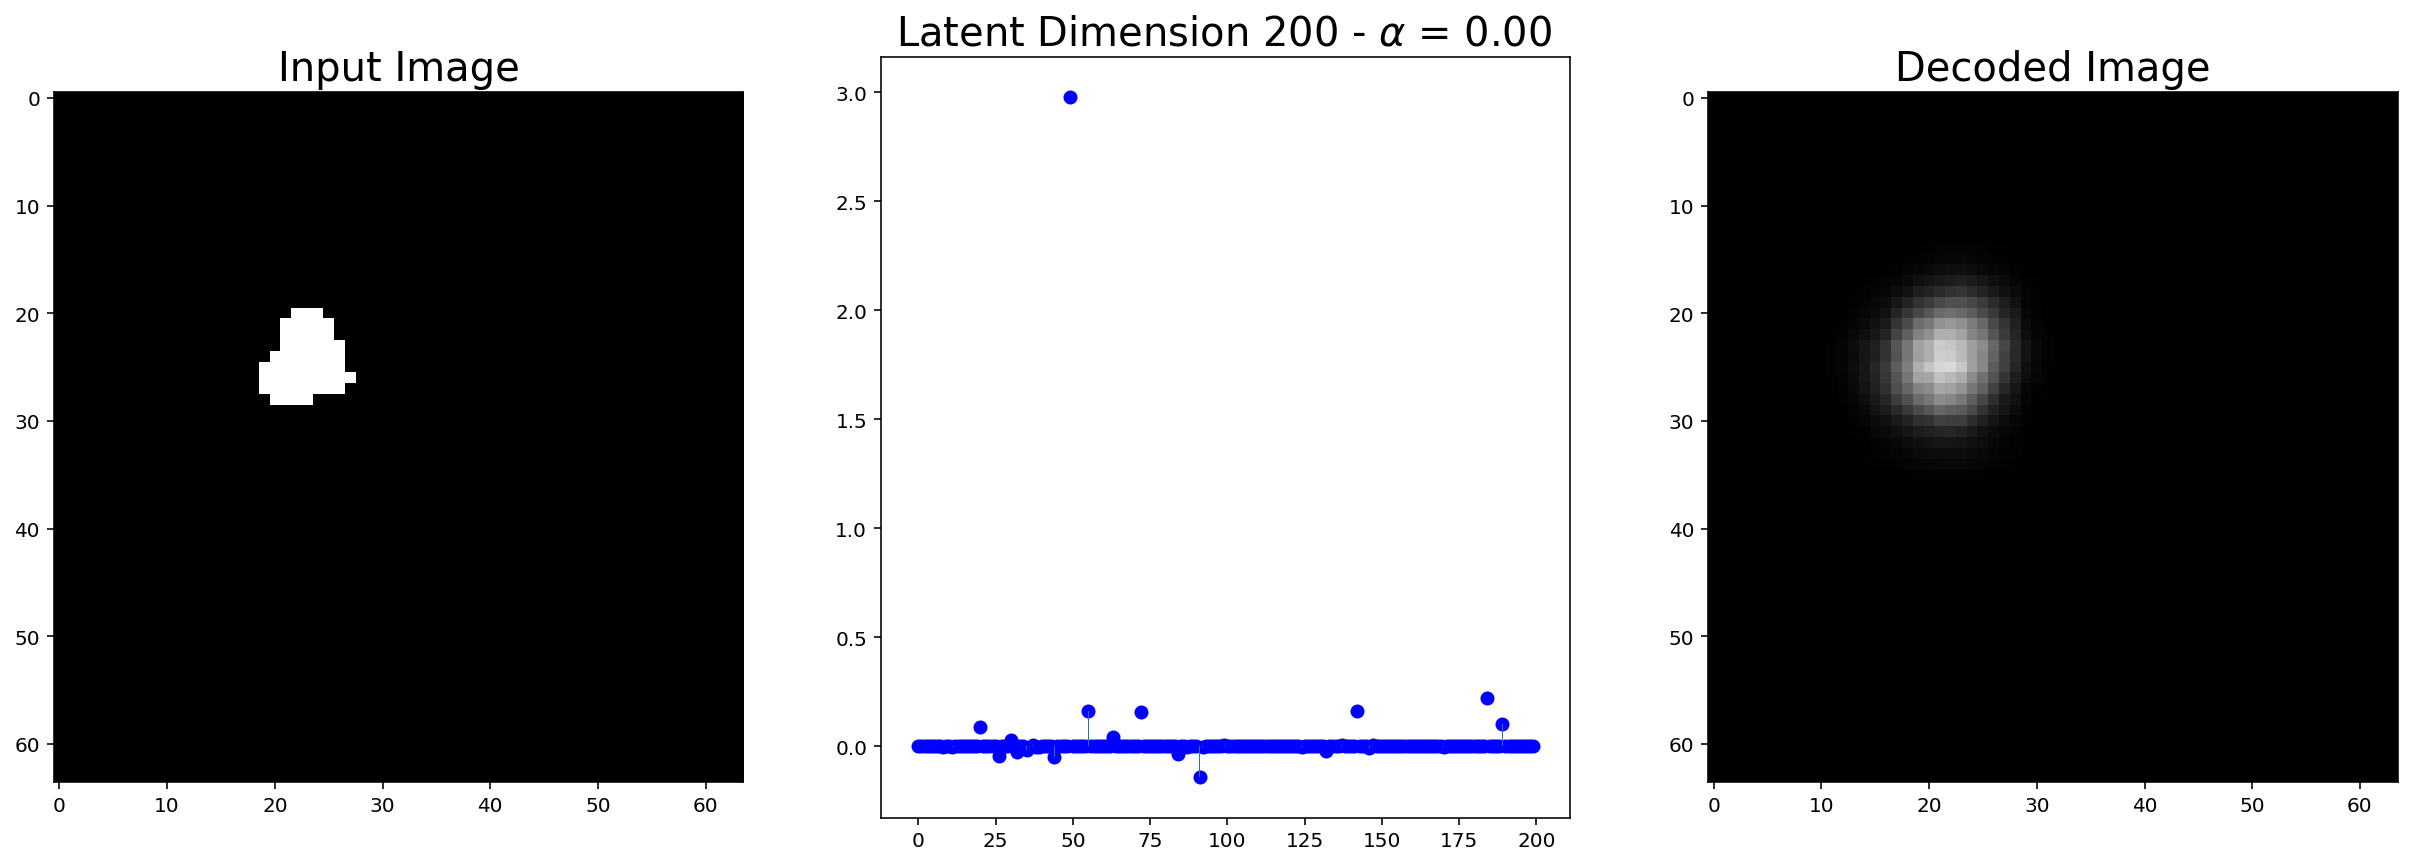

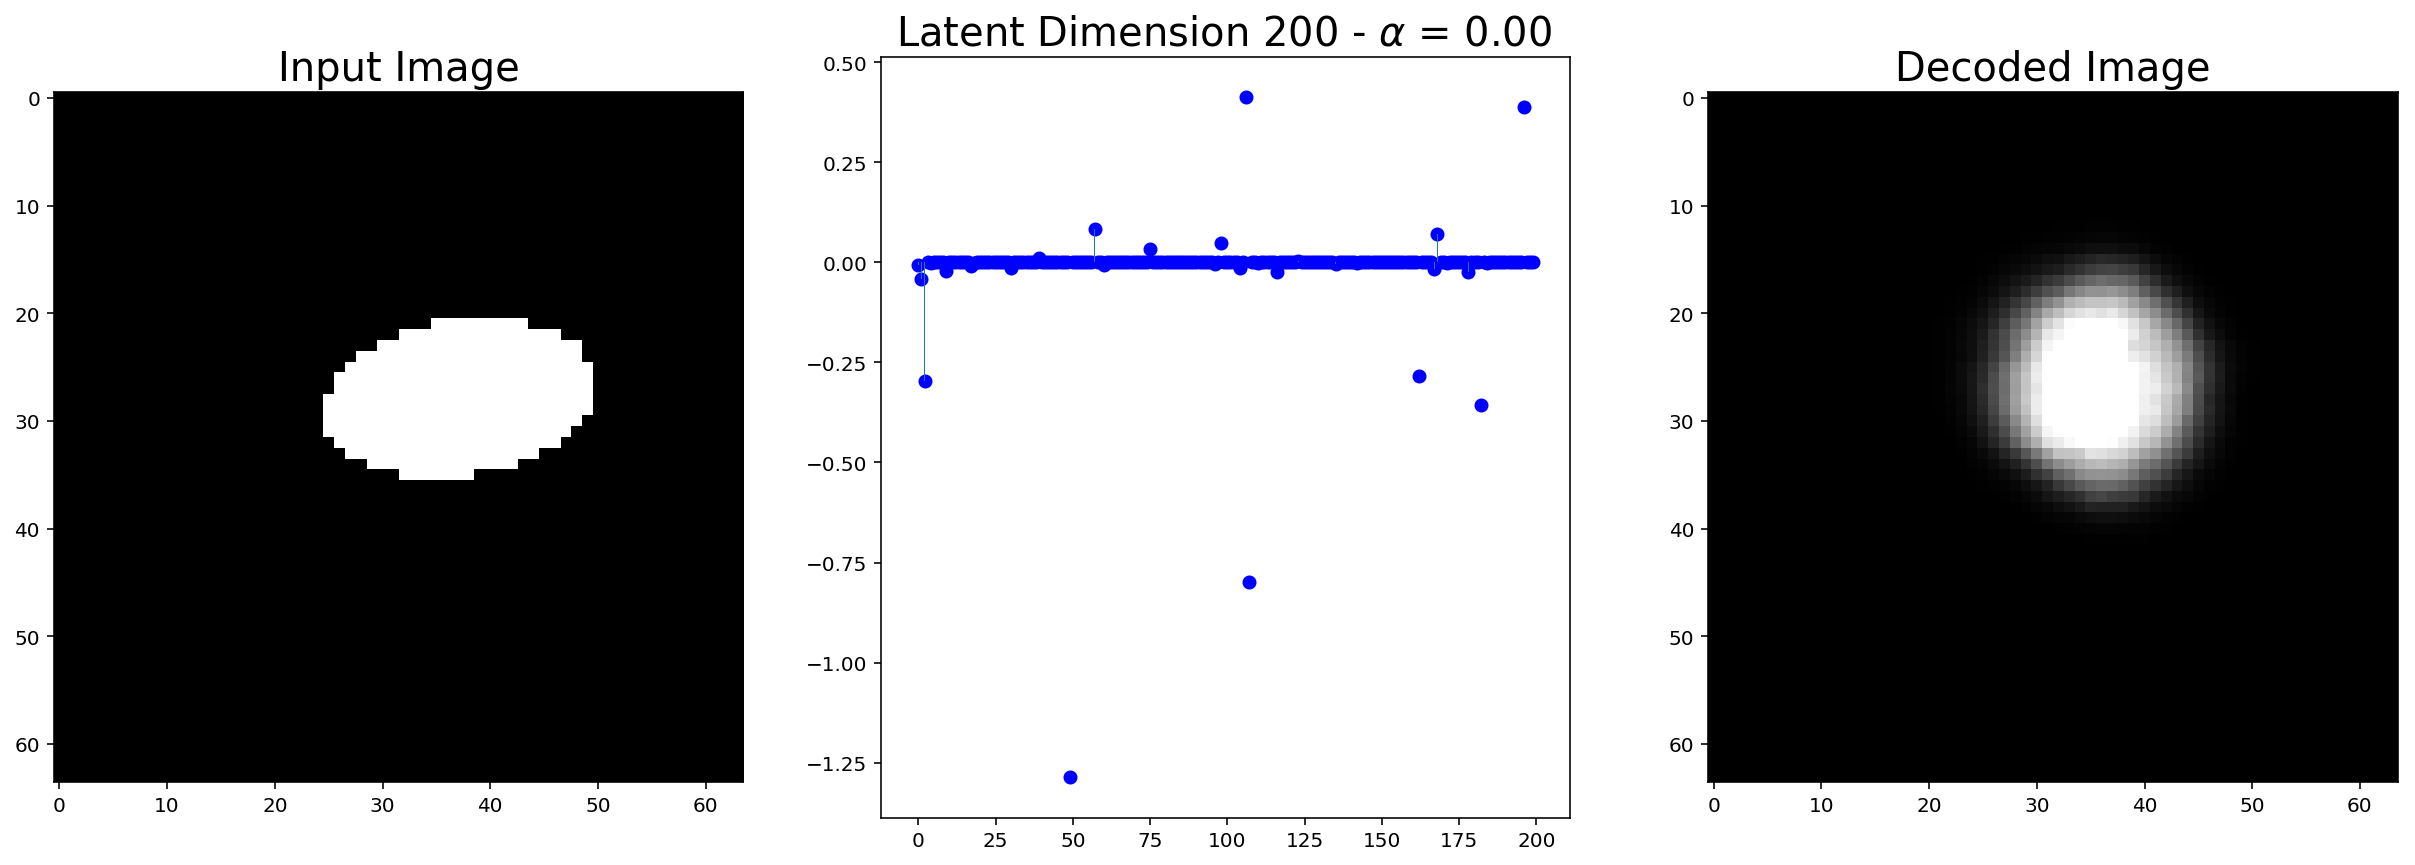

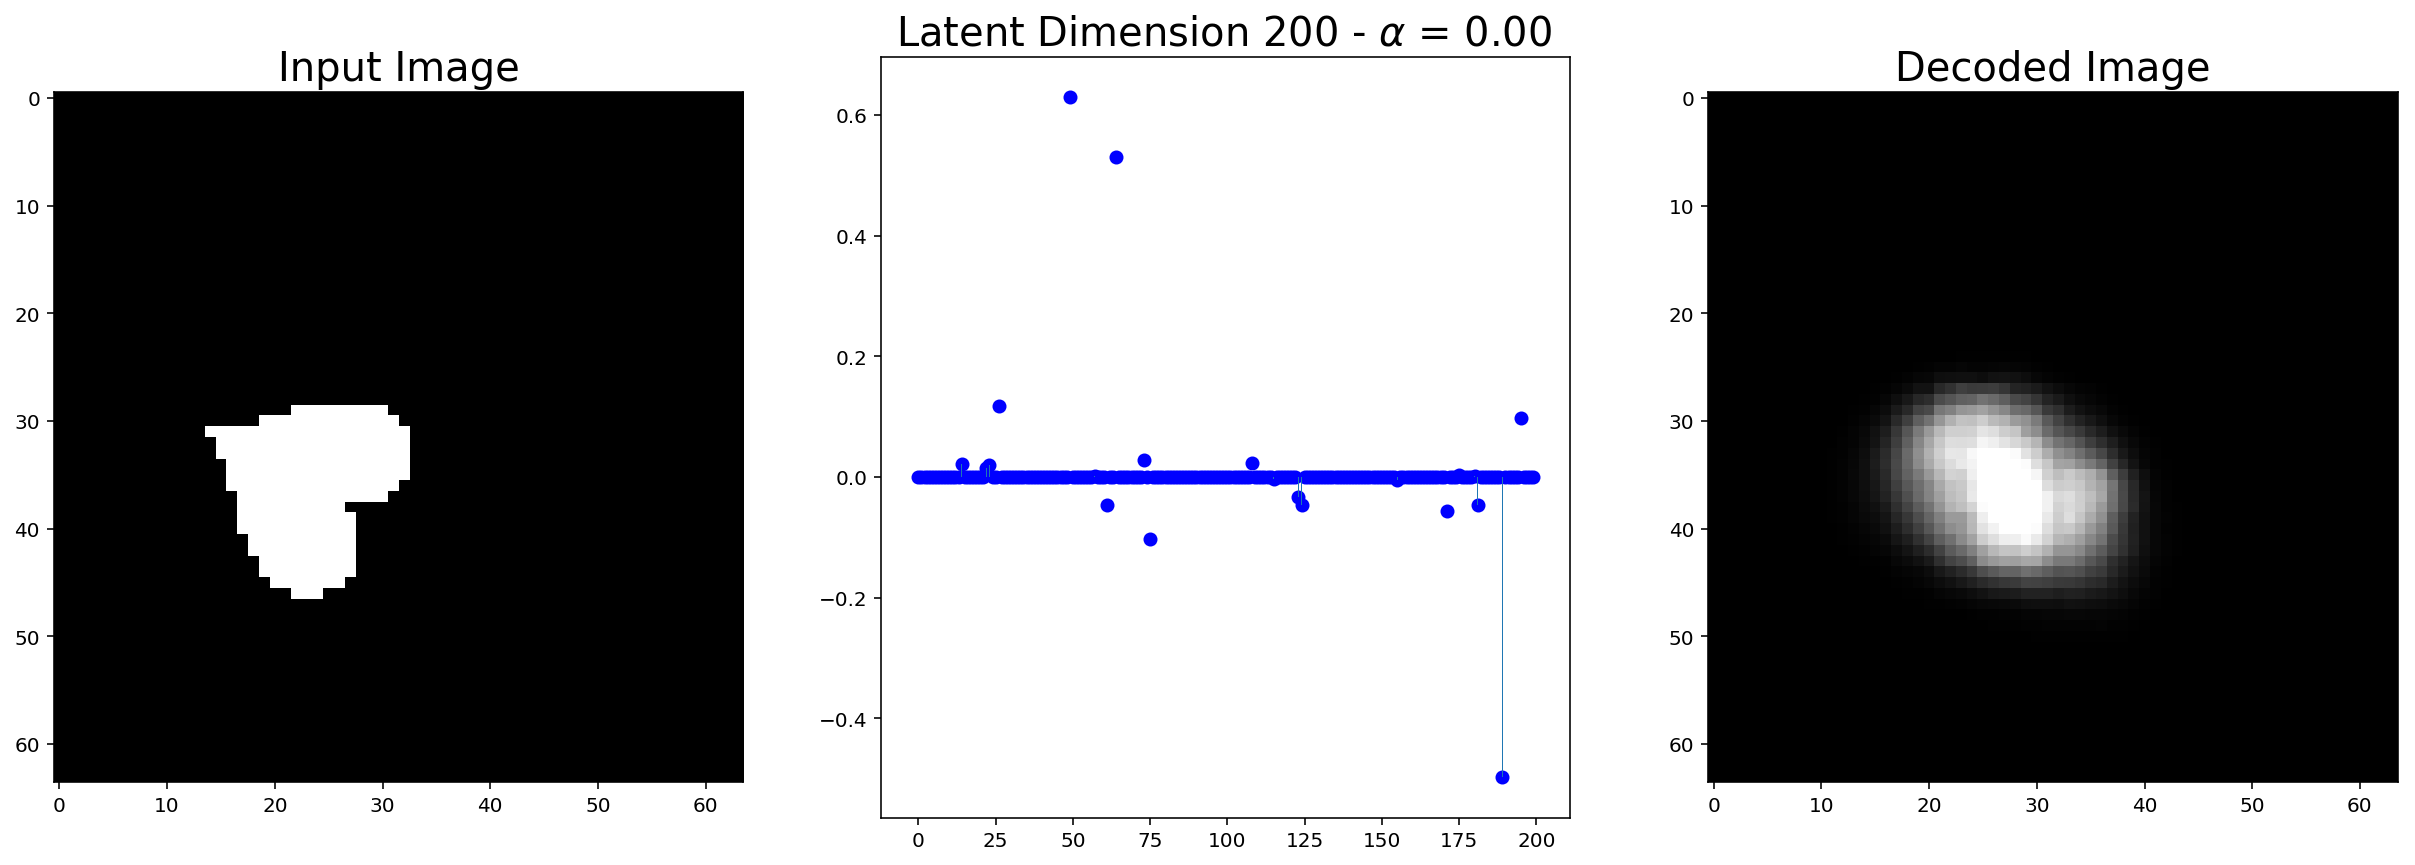

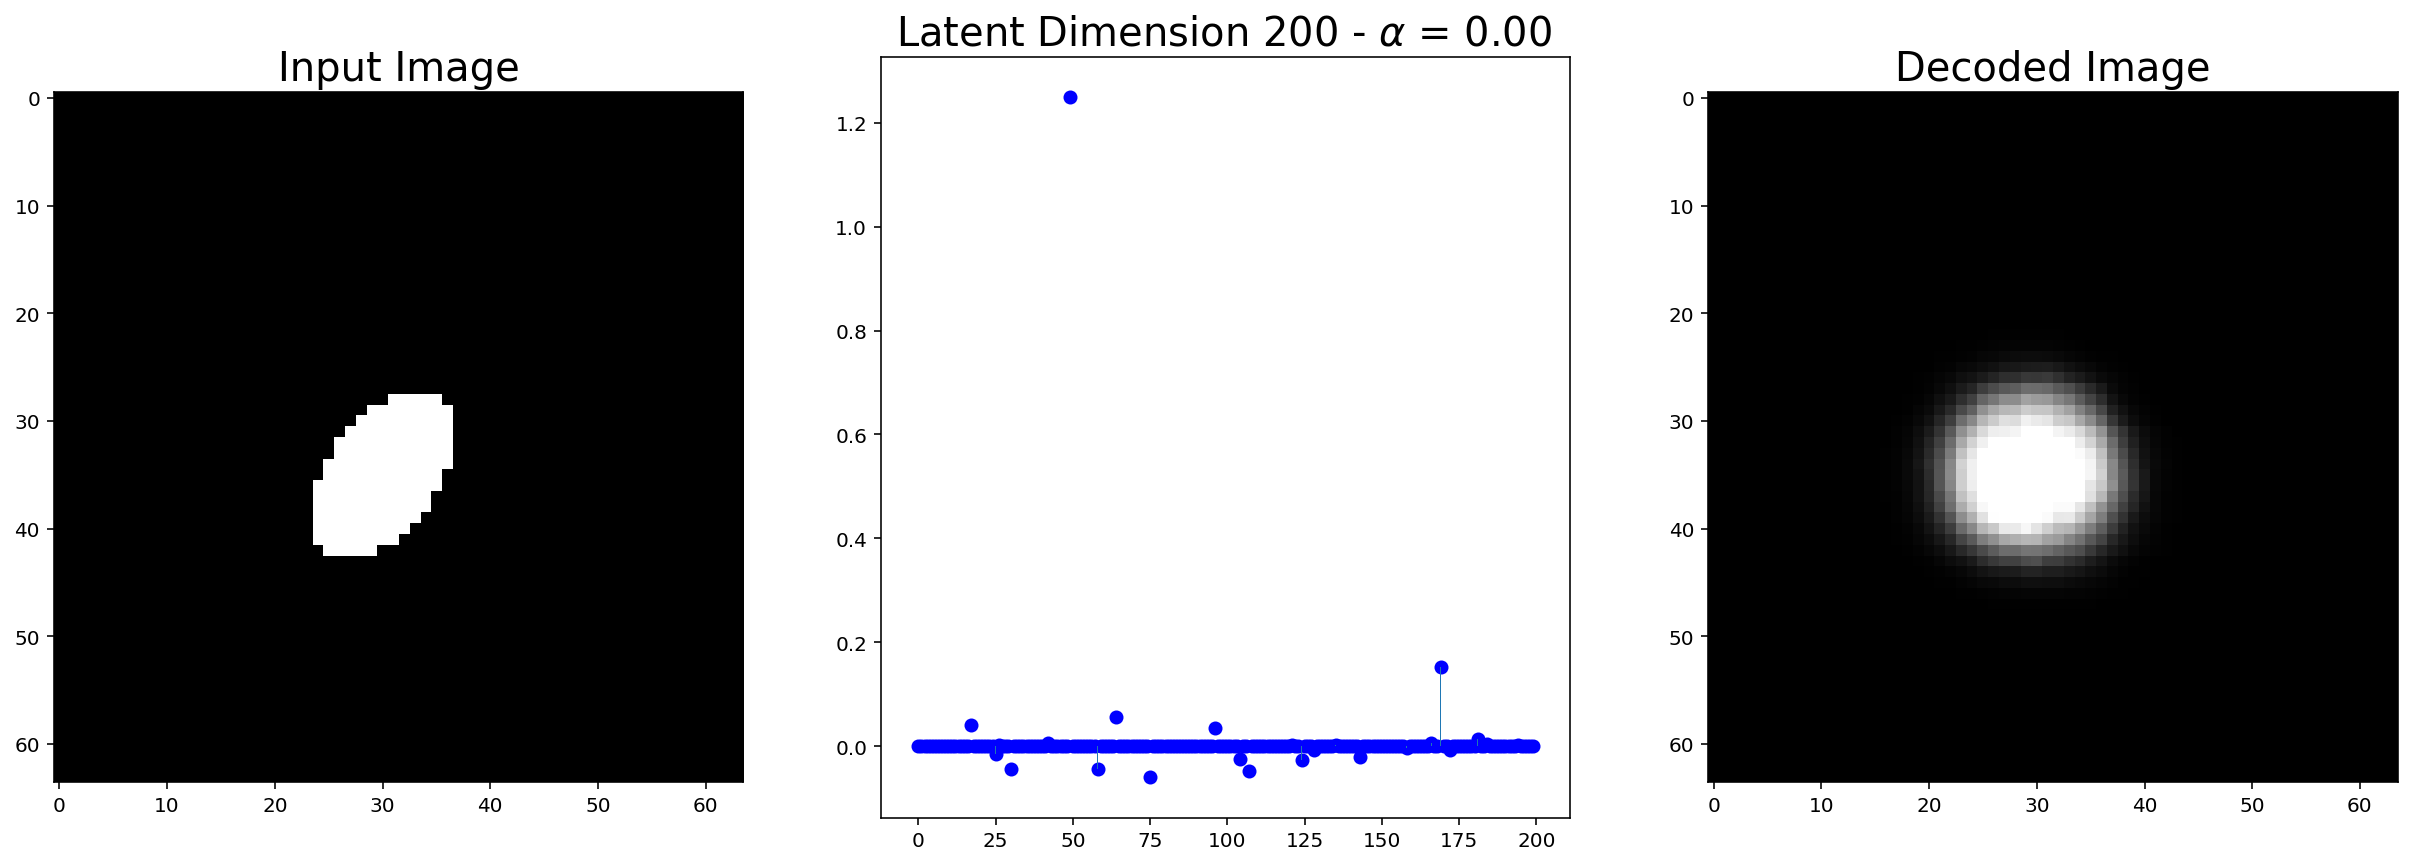

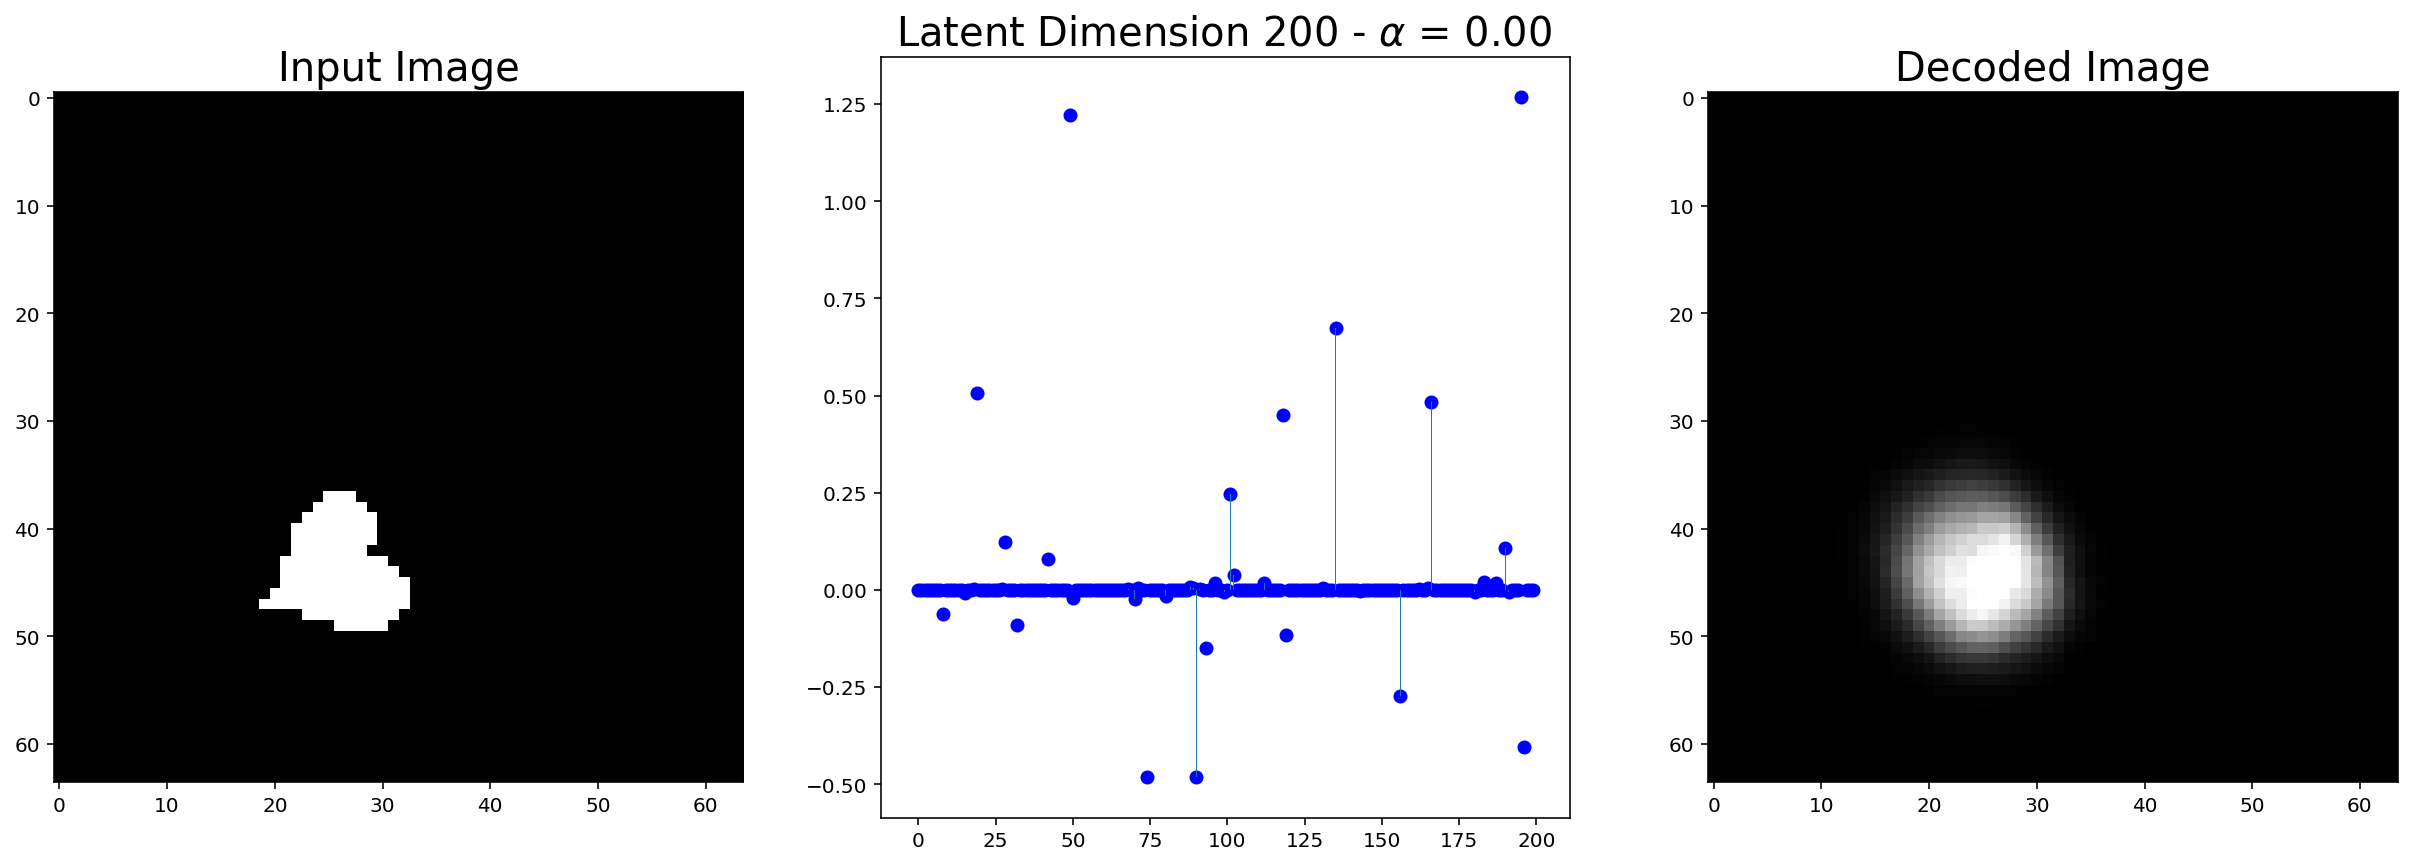

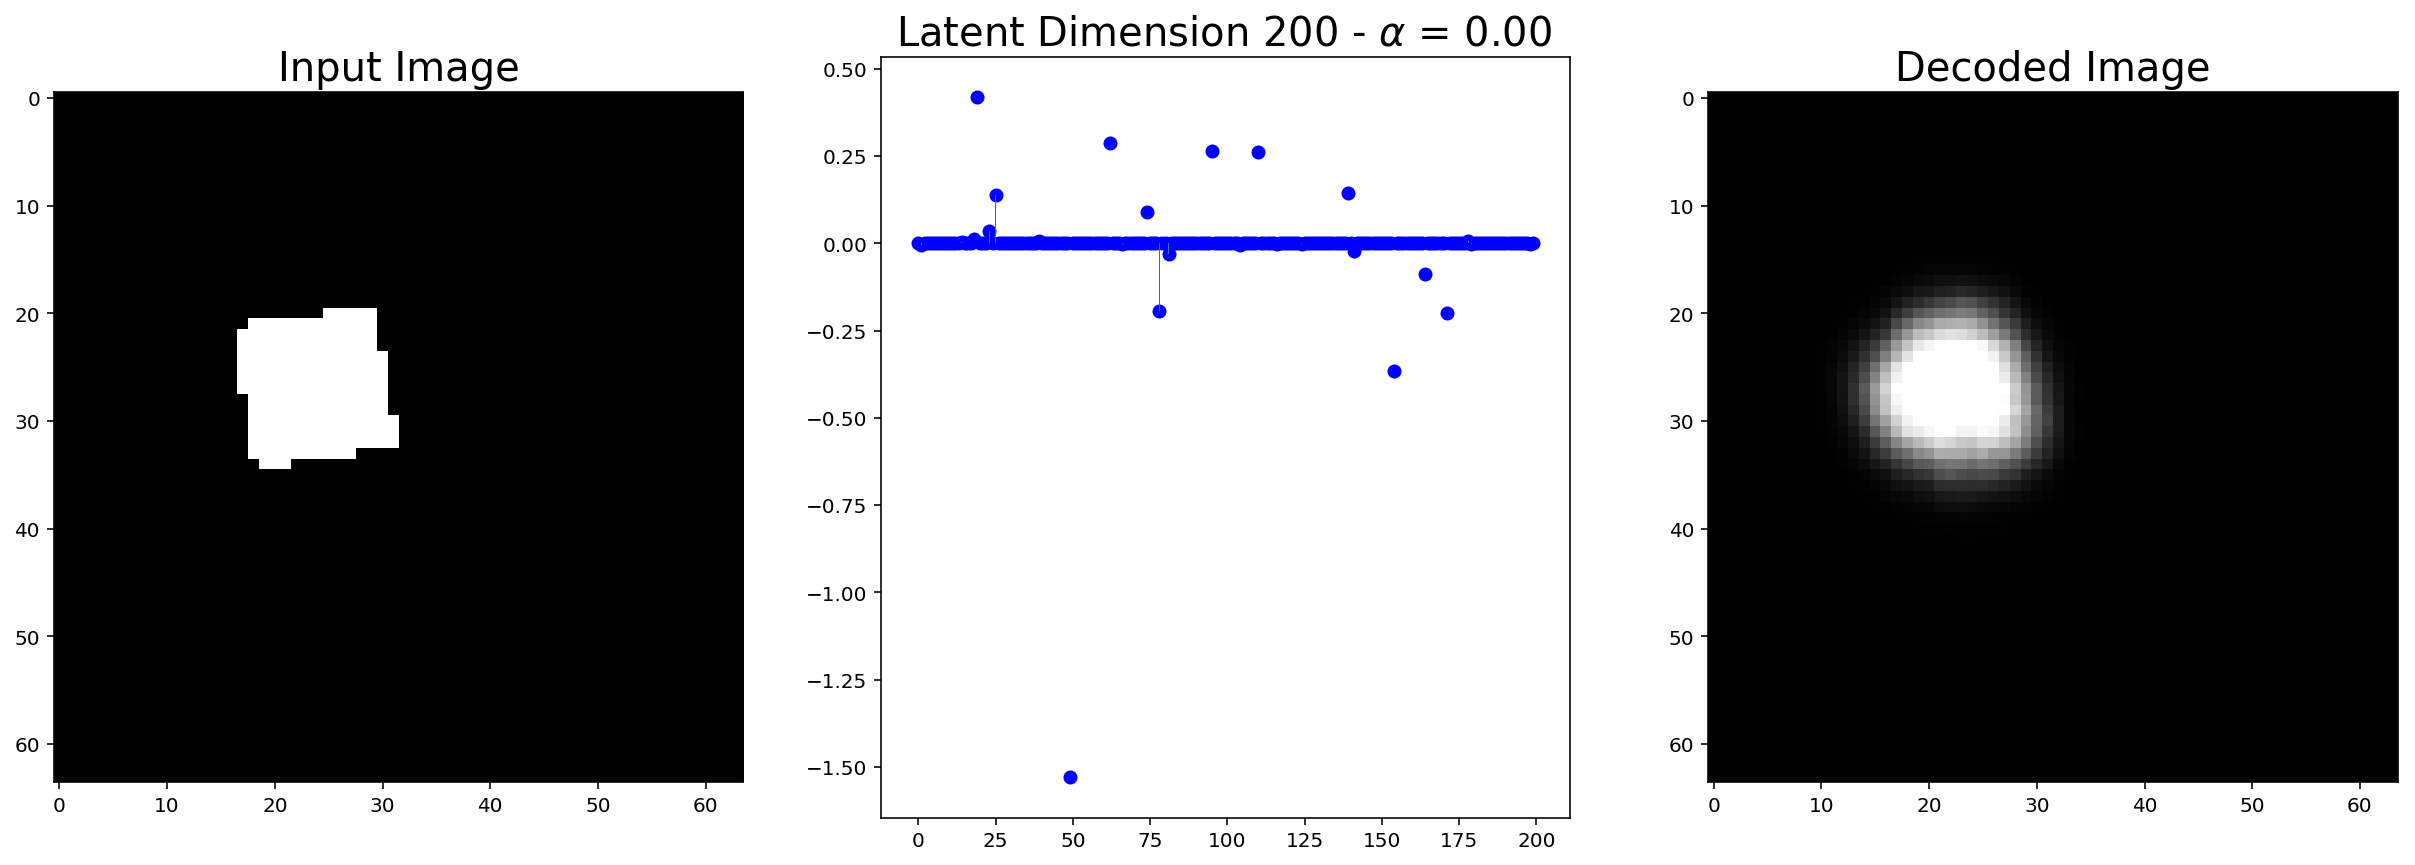

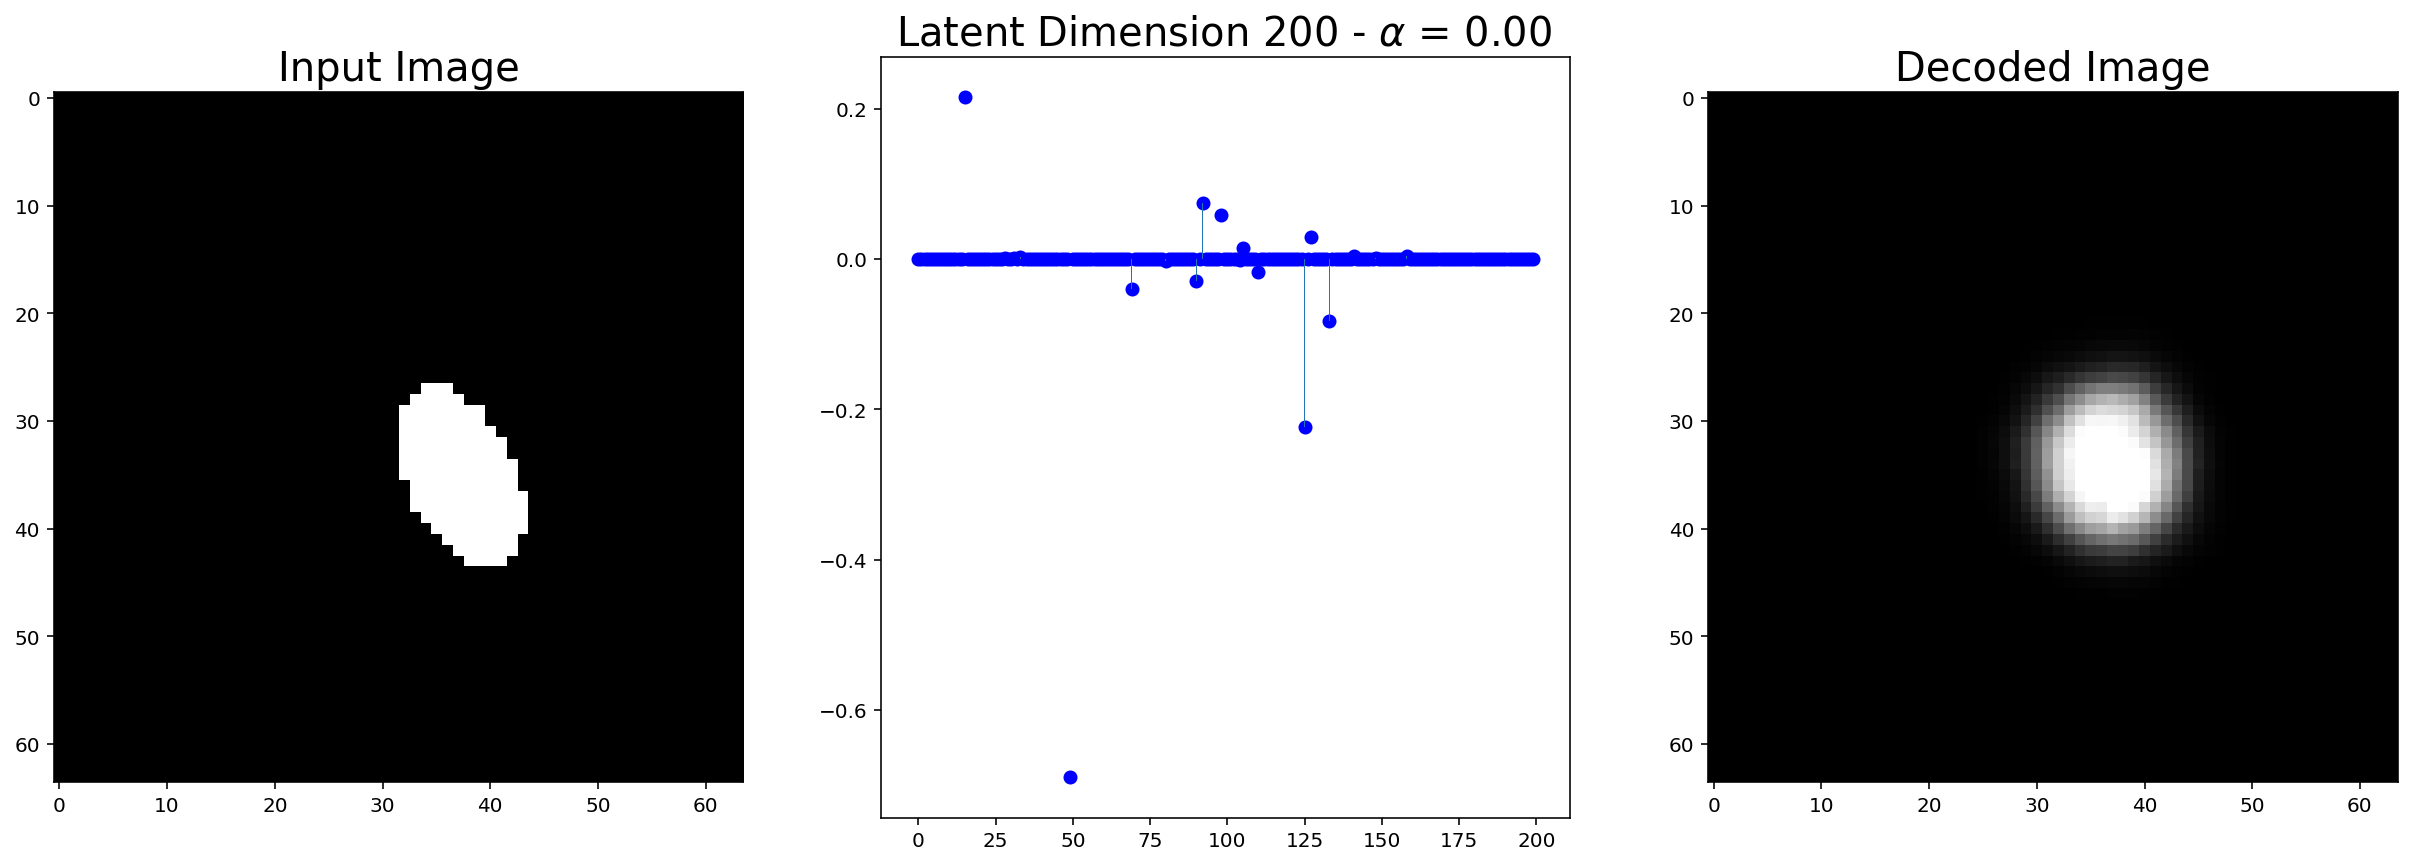

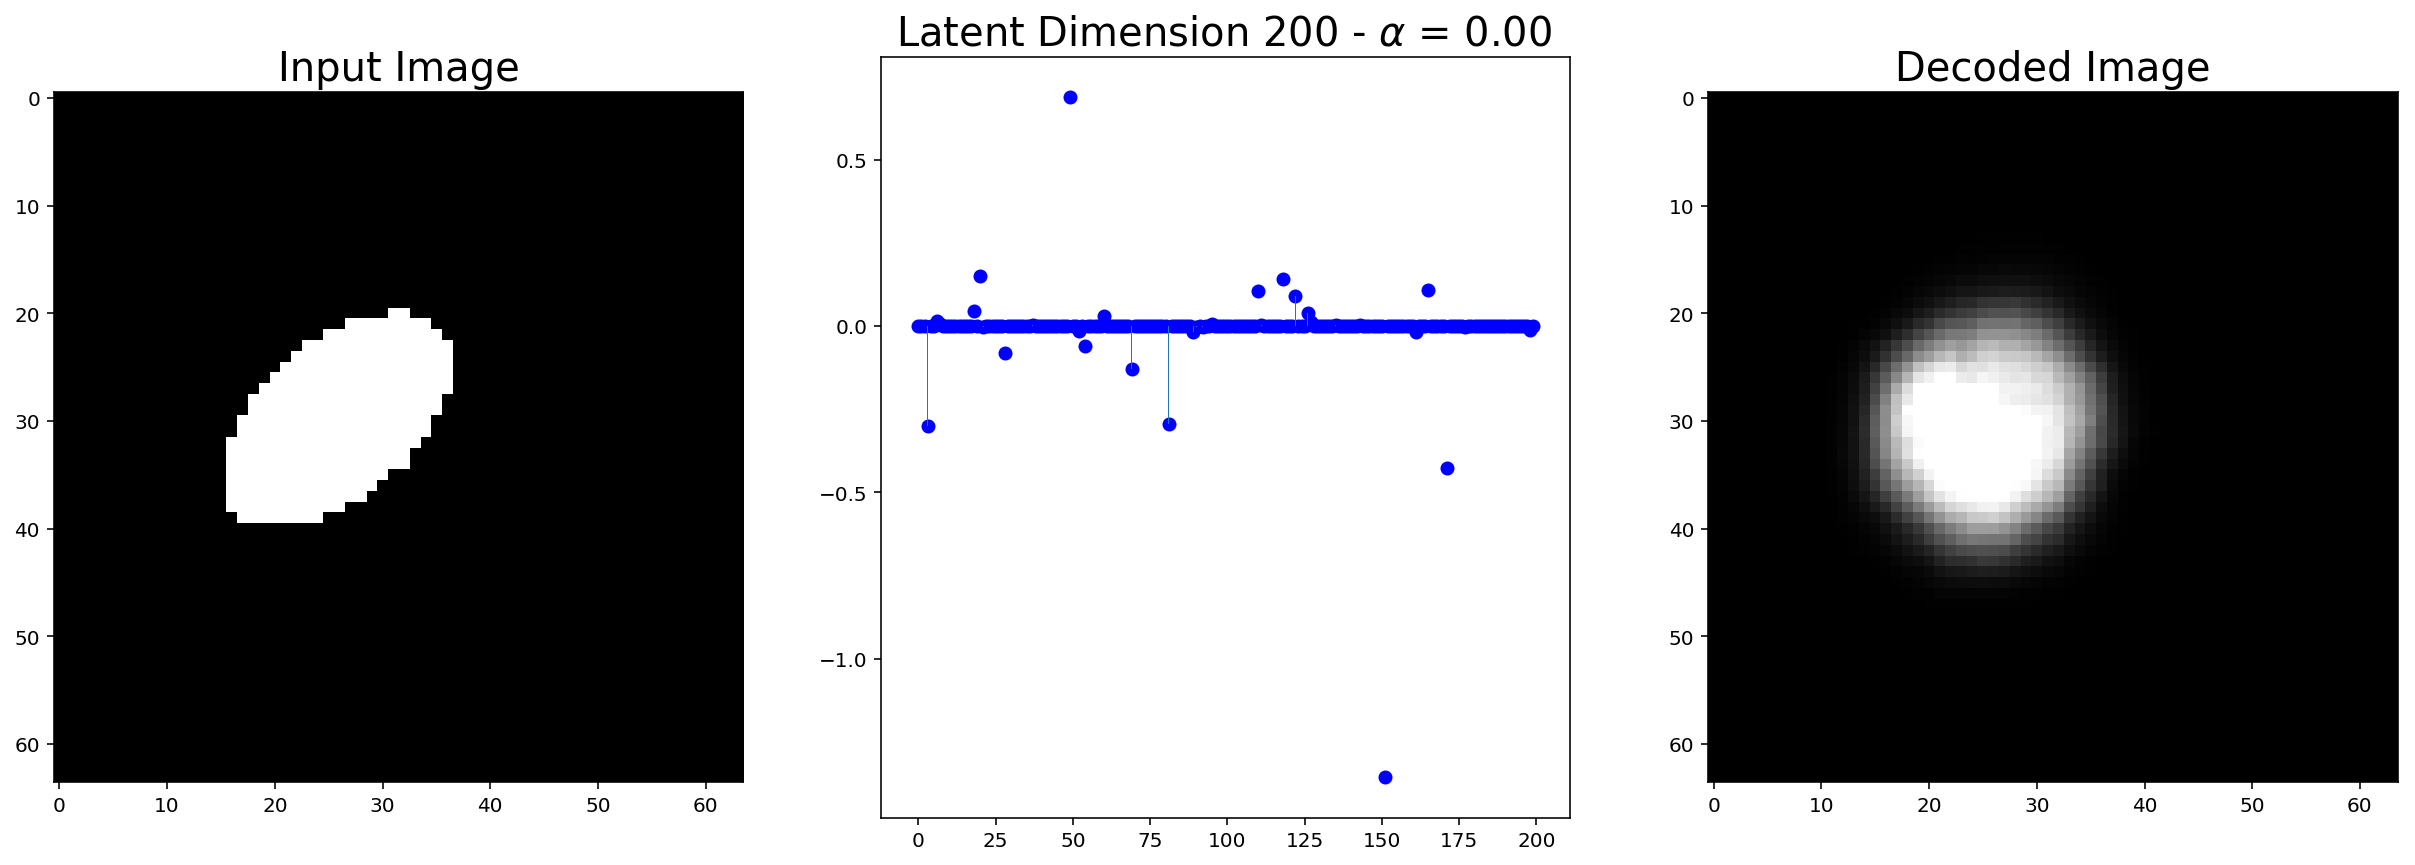

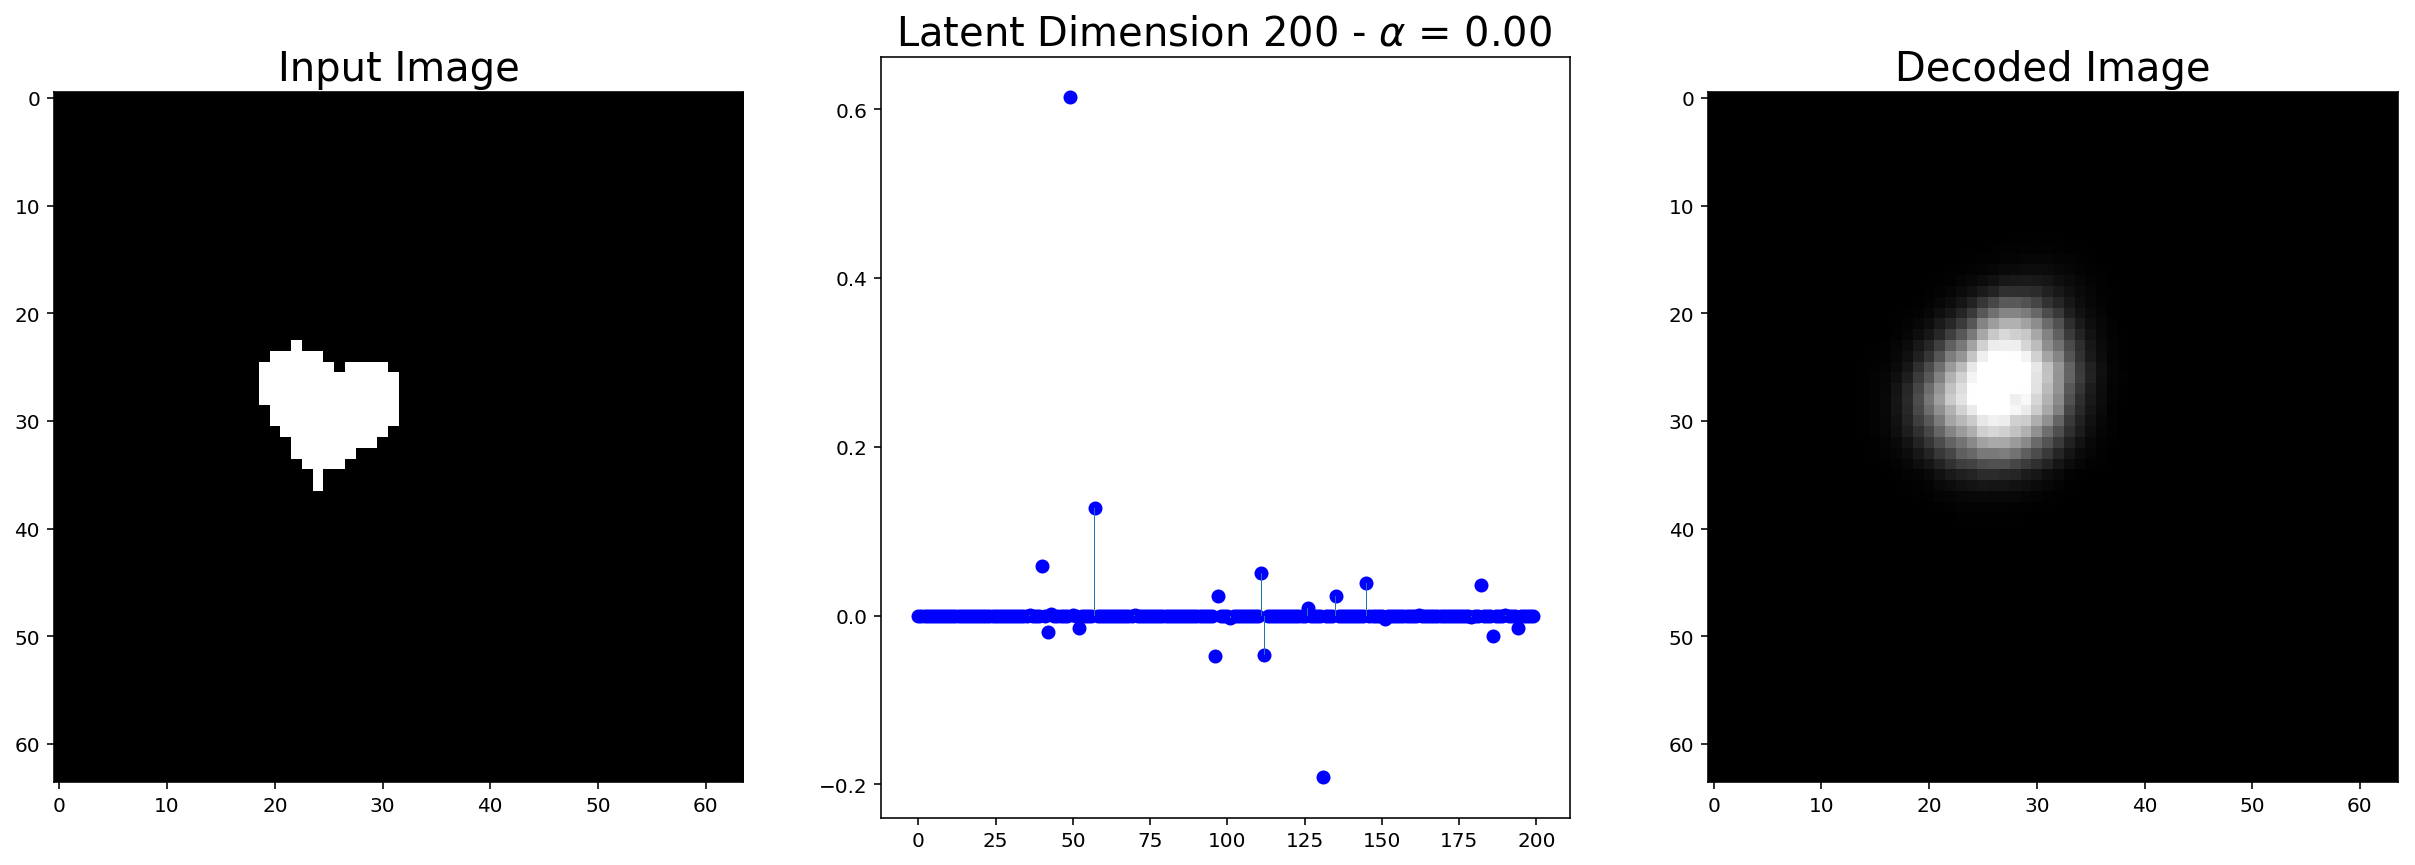

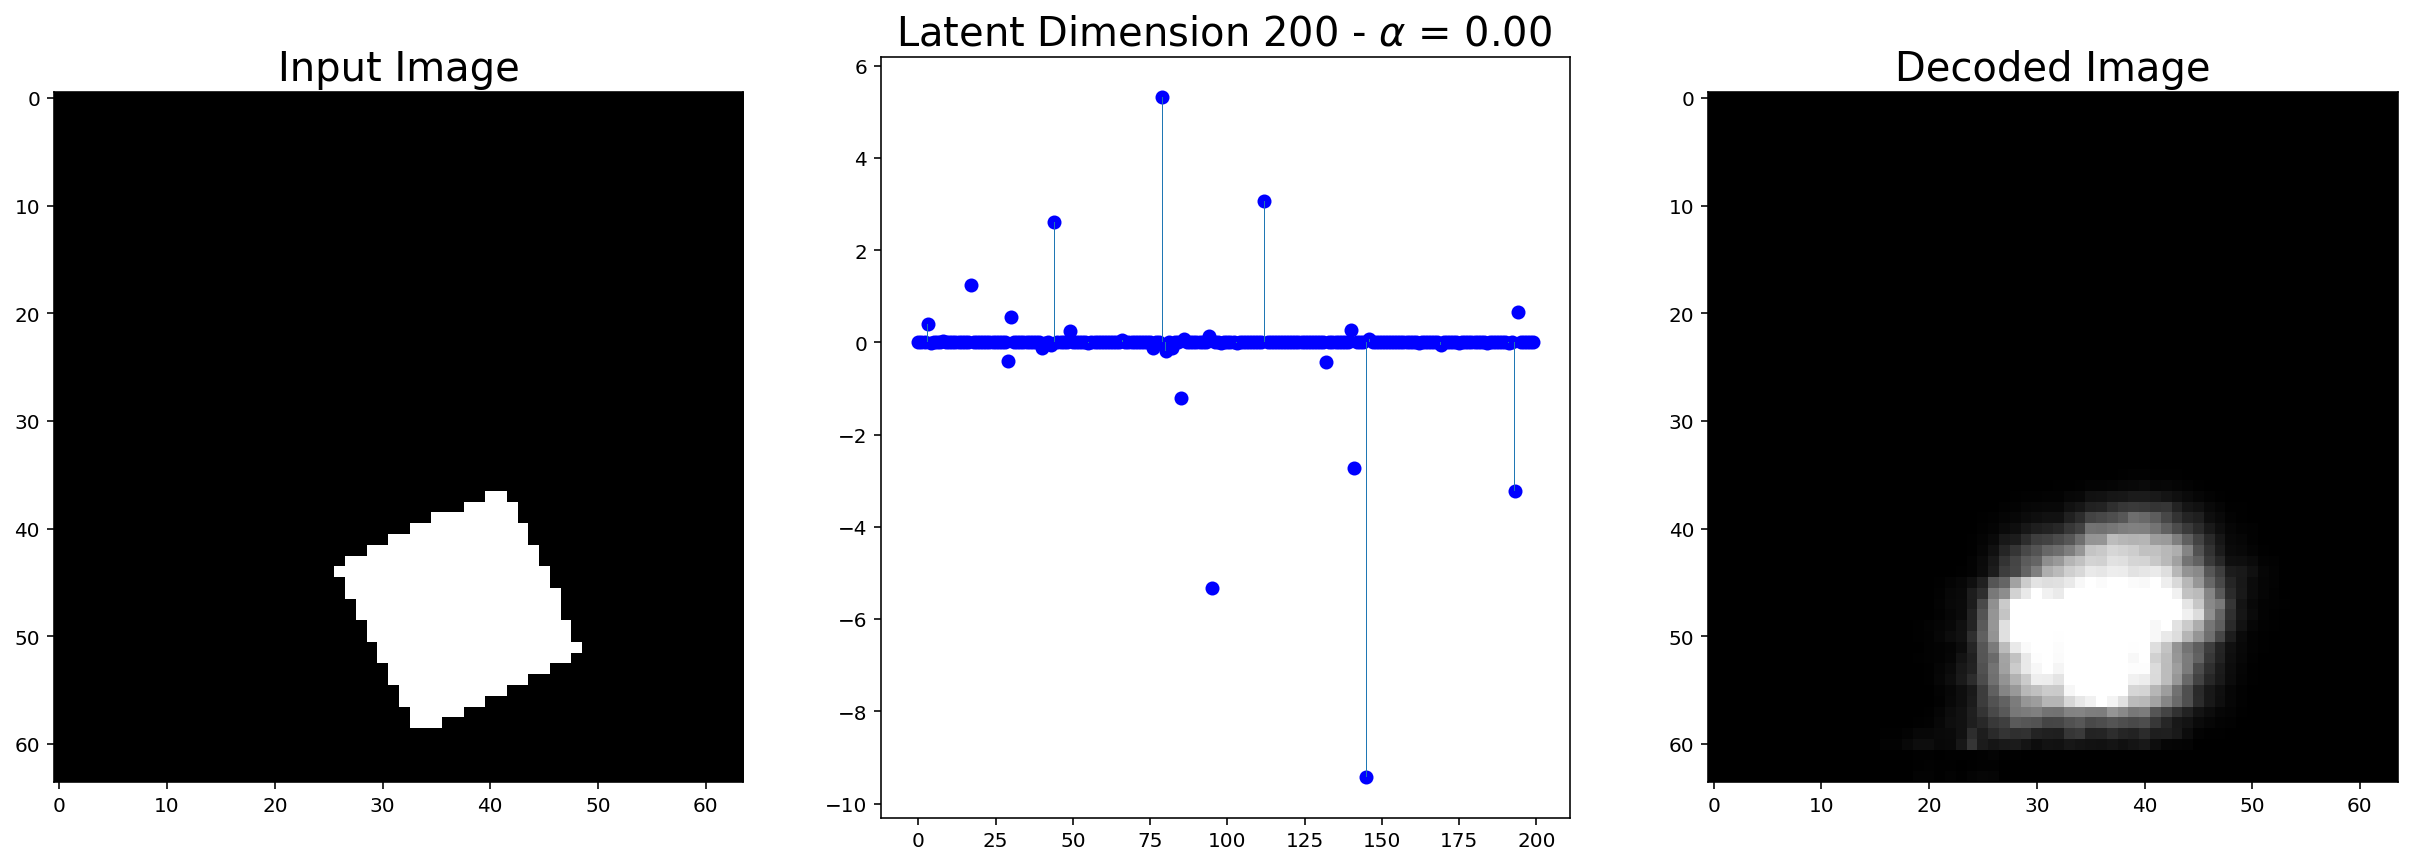

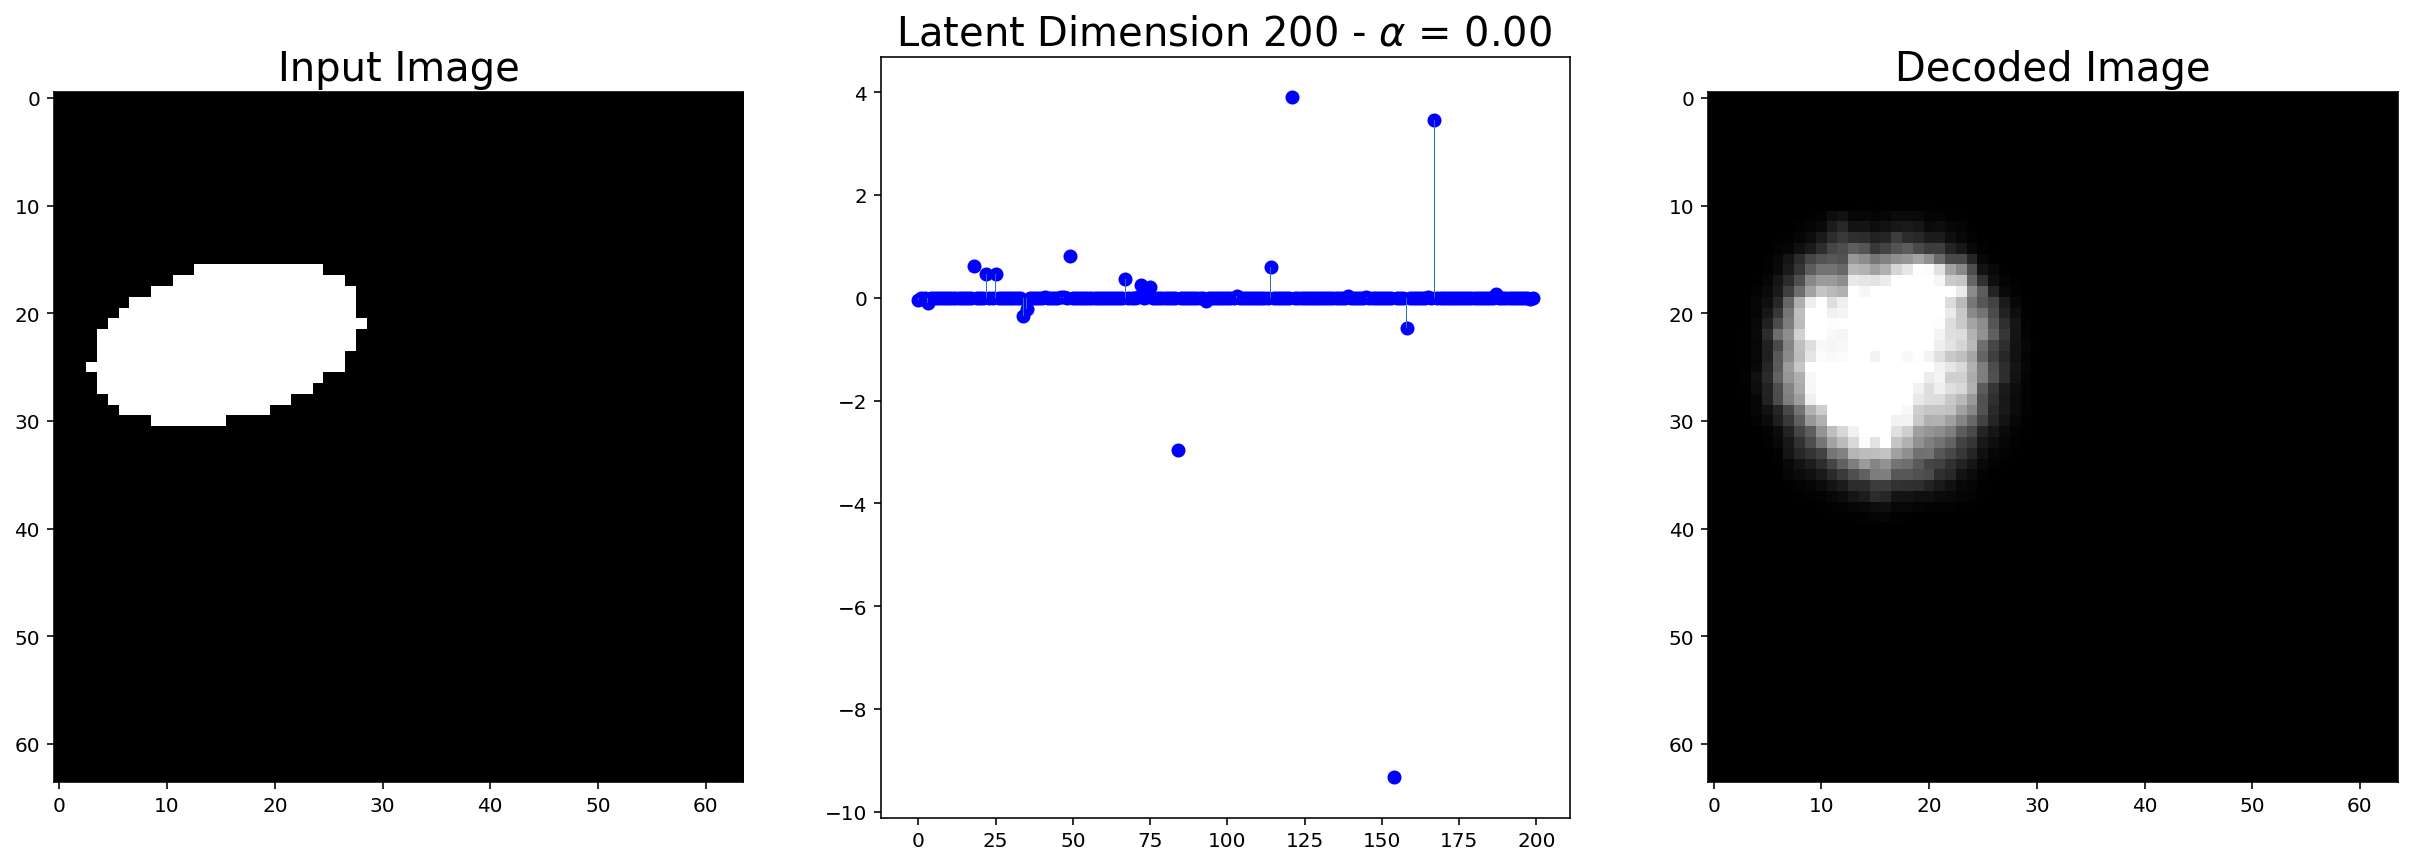

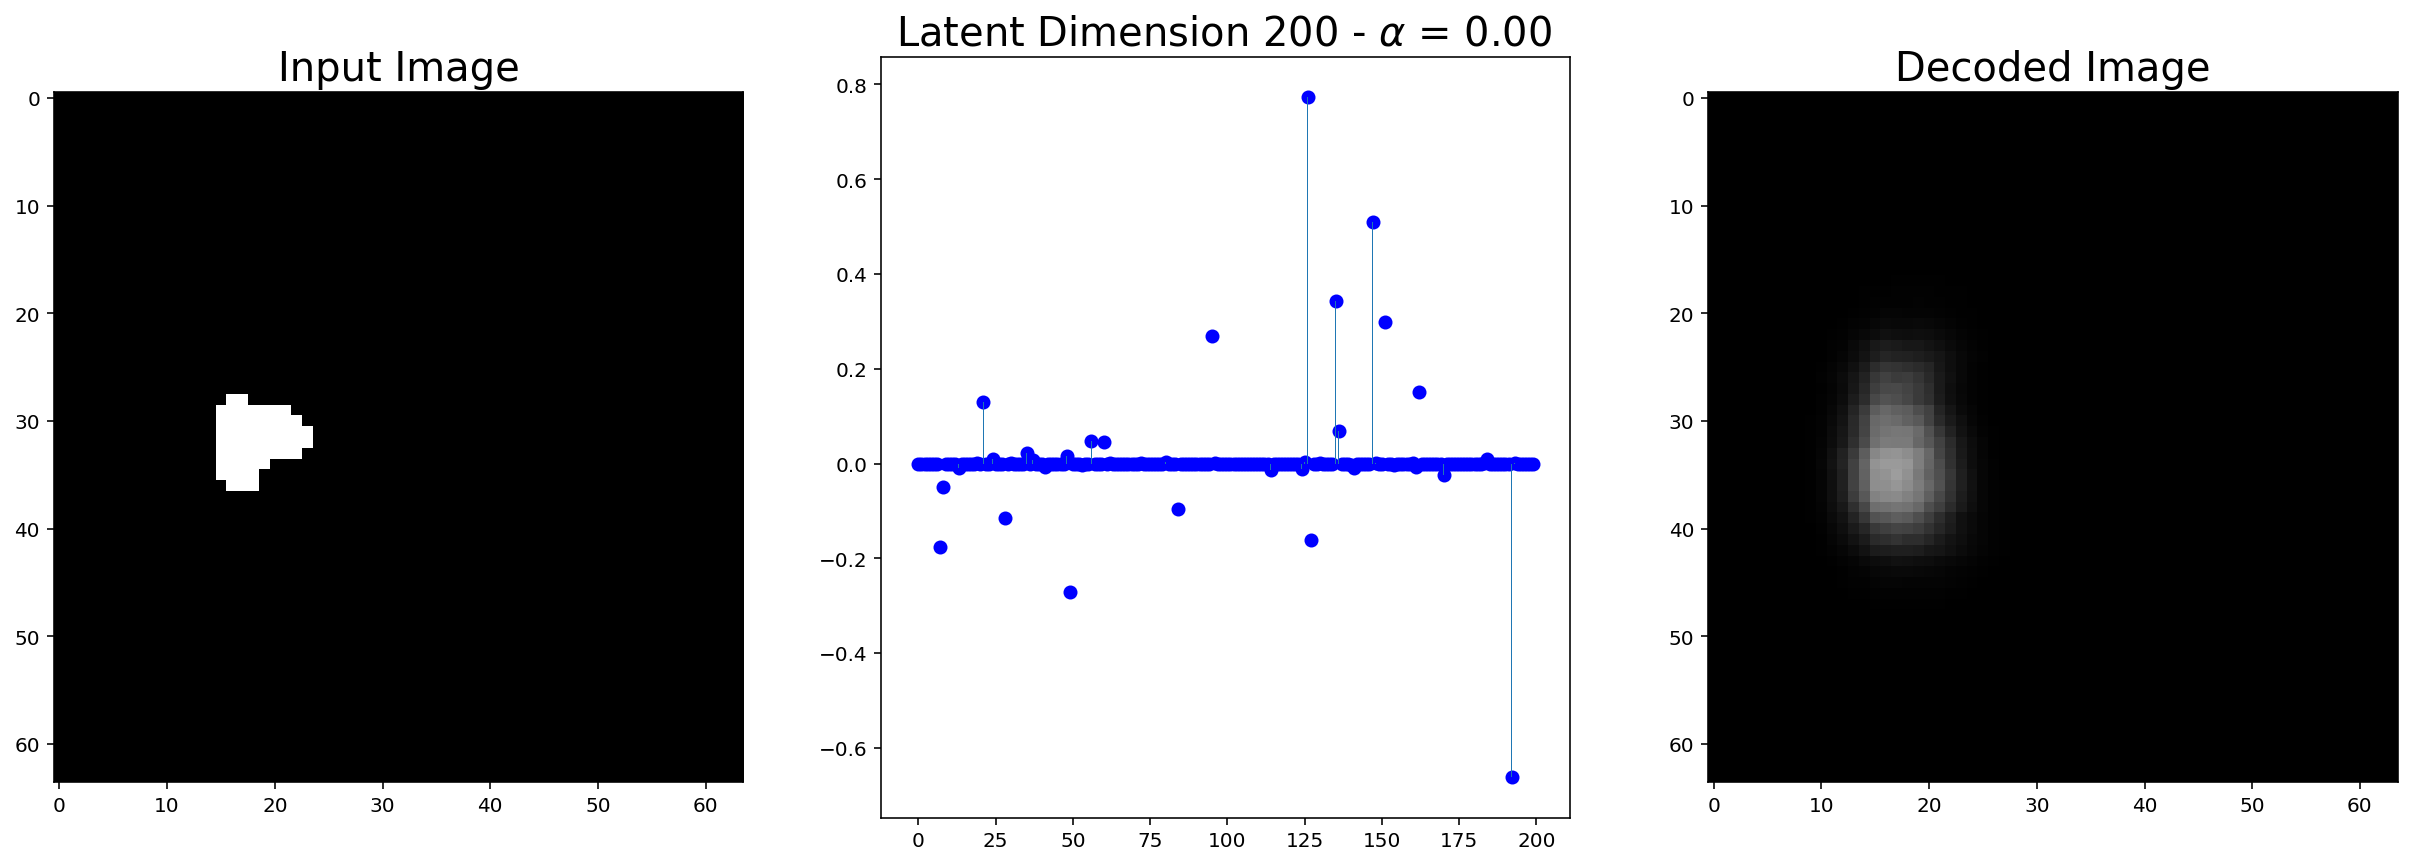

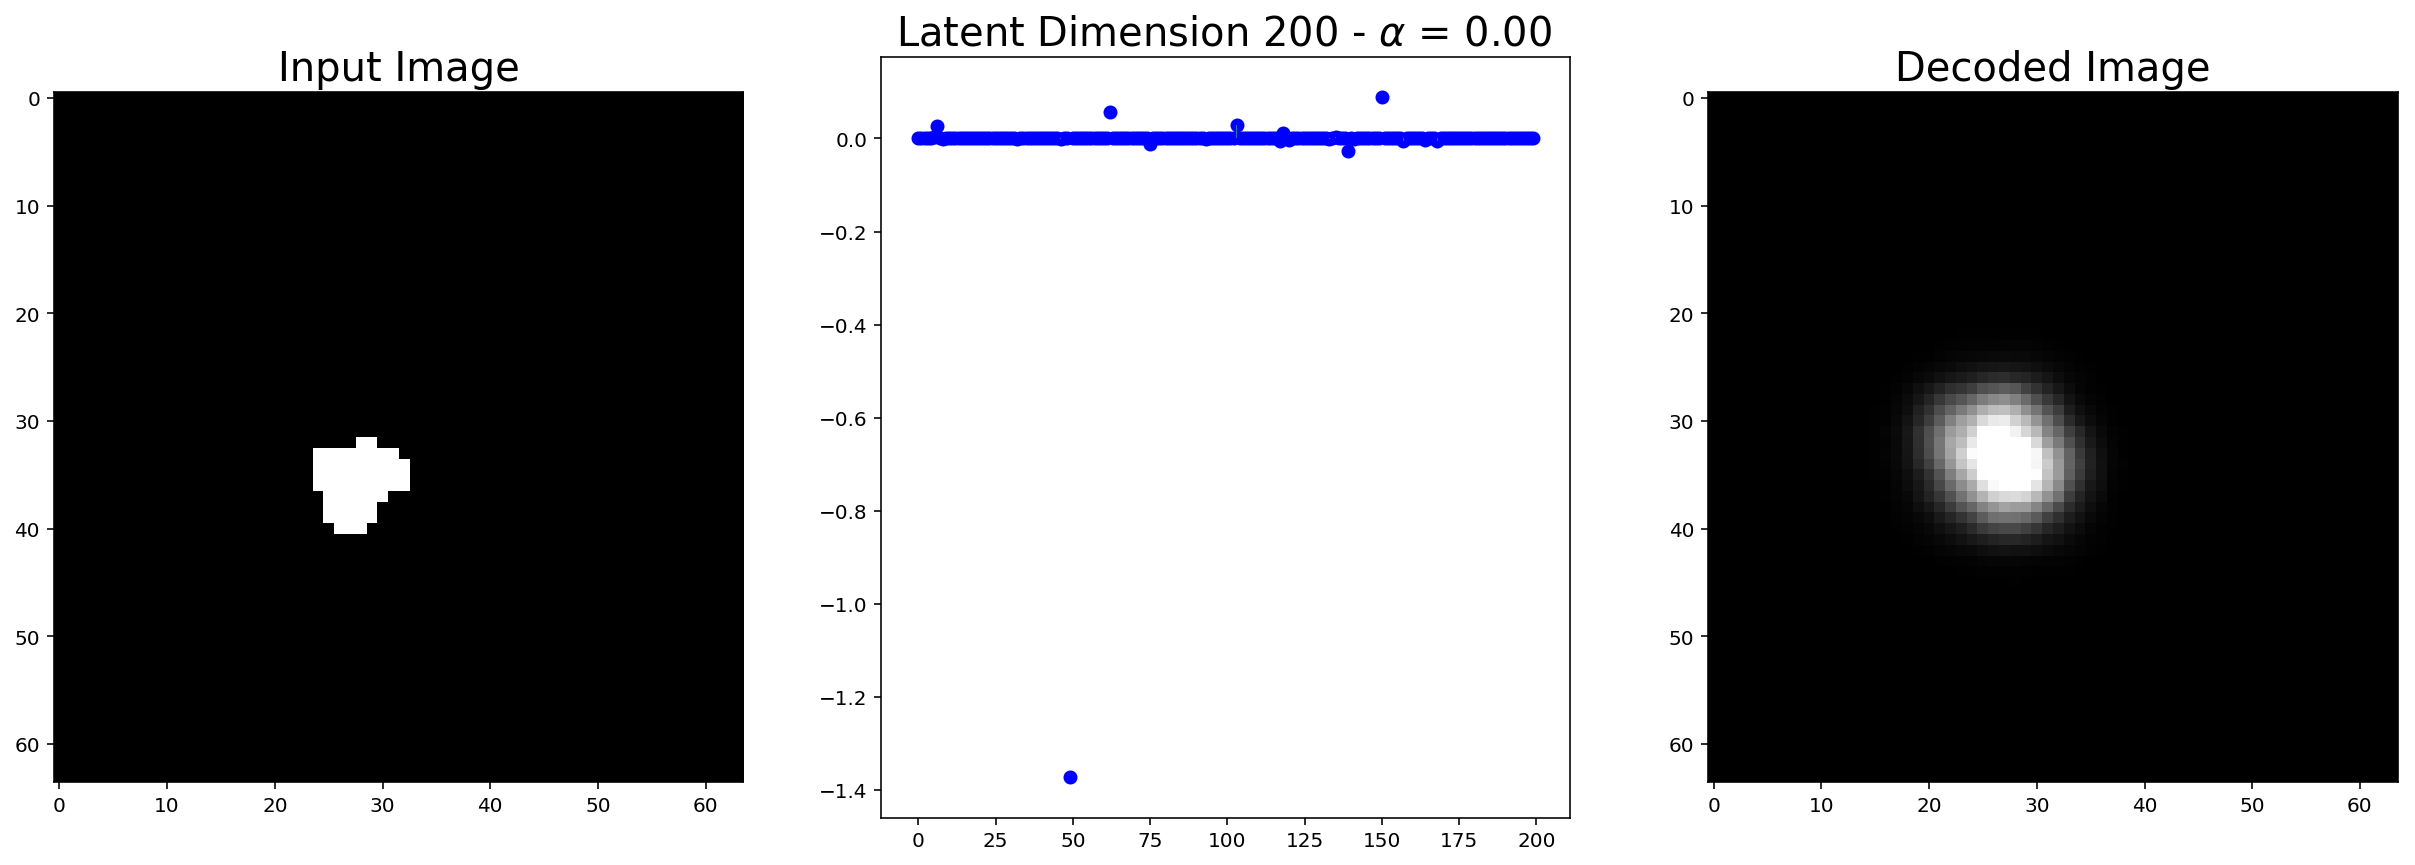

In [54]:
for i in range(15):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])

In [14]:
images, _ = iter(test_loader).next()

In [57]:
import random

def plot_horizontal_traversal(image, vsc, latent_sz, length, 
                              delta, threshold=1e-4, plot_all=False, 
                              plot_list=None, width=1/4):
    image = vsc.transform(image).to(vsc.device)
    decoded, mu, logvar, logspike = vsc.model.forward(image)
    z = vsc.model.reparameterize(mu, logvar, logspike)
    img = vsc.inverse_transform(vsc.model.decode(z))
    z_ = z.cpu().detach().numpy()[0]
    
    plt.bar(np.arange(latent_sz), height=z_, width=width, align='center')
    plt.scatter(np.arange(latent_sz), z_, color='blue')
    plt.show()
    
    non_zero = [i for i in range(latent_sz) if np.abs(z_[i]) > threshold]
    ind = random.choice(non_zero)
    print(ind, non_zero)
    
    if not plot_all:
        non_zero = [ind]
    if plot_list:
        non_zero = plot_list
    
    hor_traversal = []
    for ind in non_zero:
        images = []
        z1 = z.clone()
        for i in range(length):
            img = to_numpy(vsc.model.decode(z1), vsc)
            img = np.transpose(img, (1,2,0))
            img[:,0] = 1
            img[:,-1] = 1
            img[0,:] = 1
            img[-1,:] = 1
            images.append(img)
            z1[0, ind] = z1[0, ind] + delta if z[0,ind] < 0 else z1[0, ind] - delta

        hor_traversal.append(np.concatenate(images, axis=1))
    traversal = np.concatenate(hor_traversal, axis=0)
    plt.figure(figsize=(15,25))
    plt.axis('off')
    plt.imshow(traversal * 255)
    plt.show()
#     return traversal

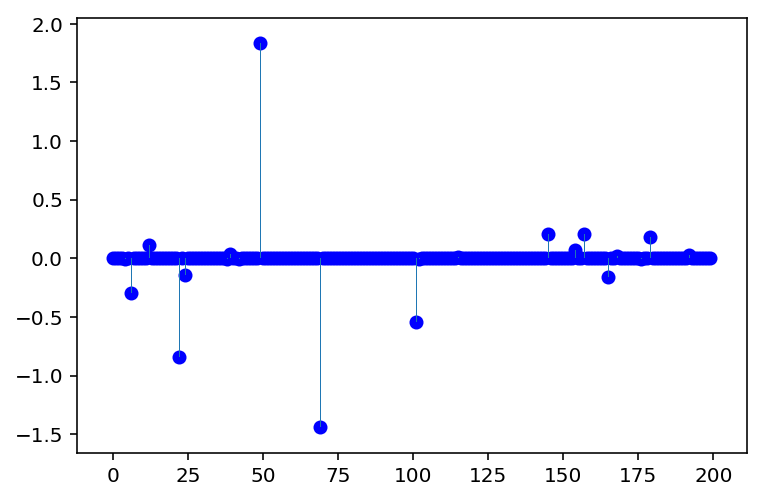

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


179 [6, 12, 22, 24, 39, 49, 69, 101, 145, 154, 157, 165, 179]


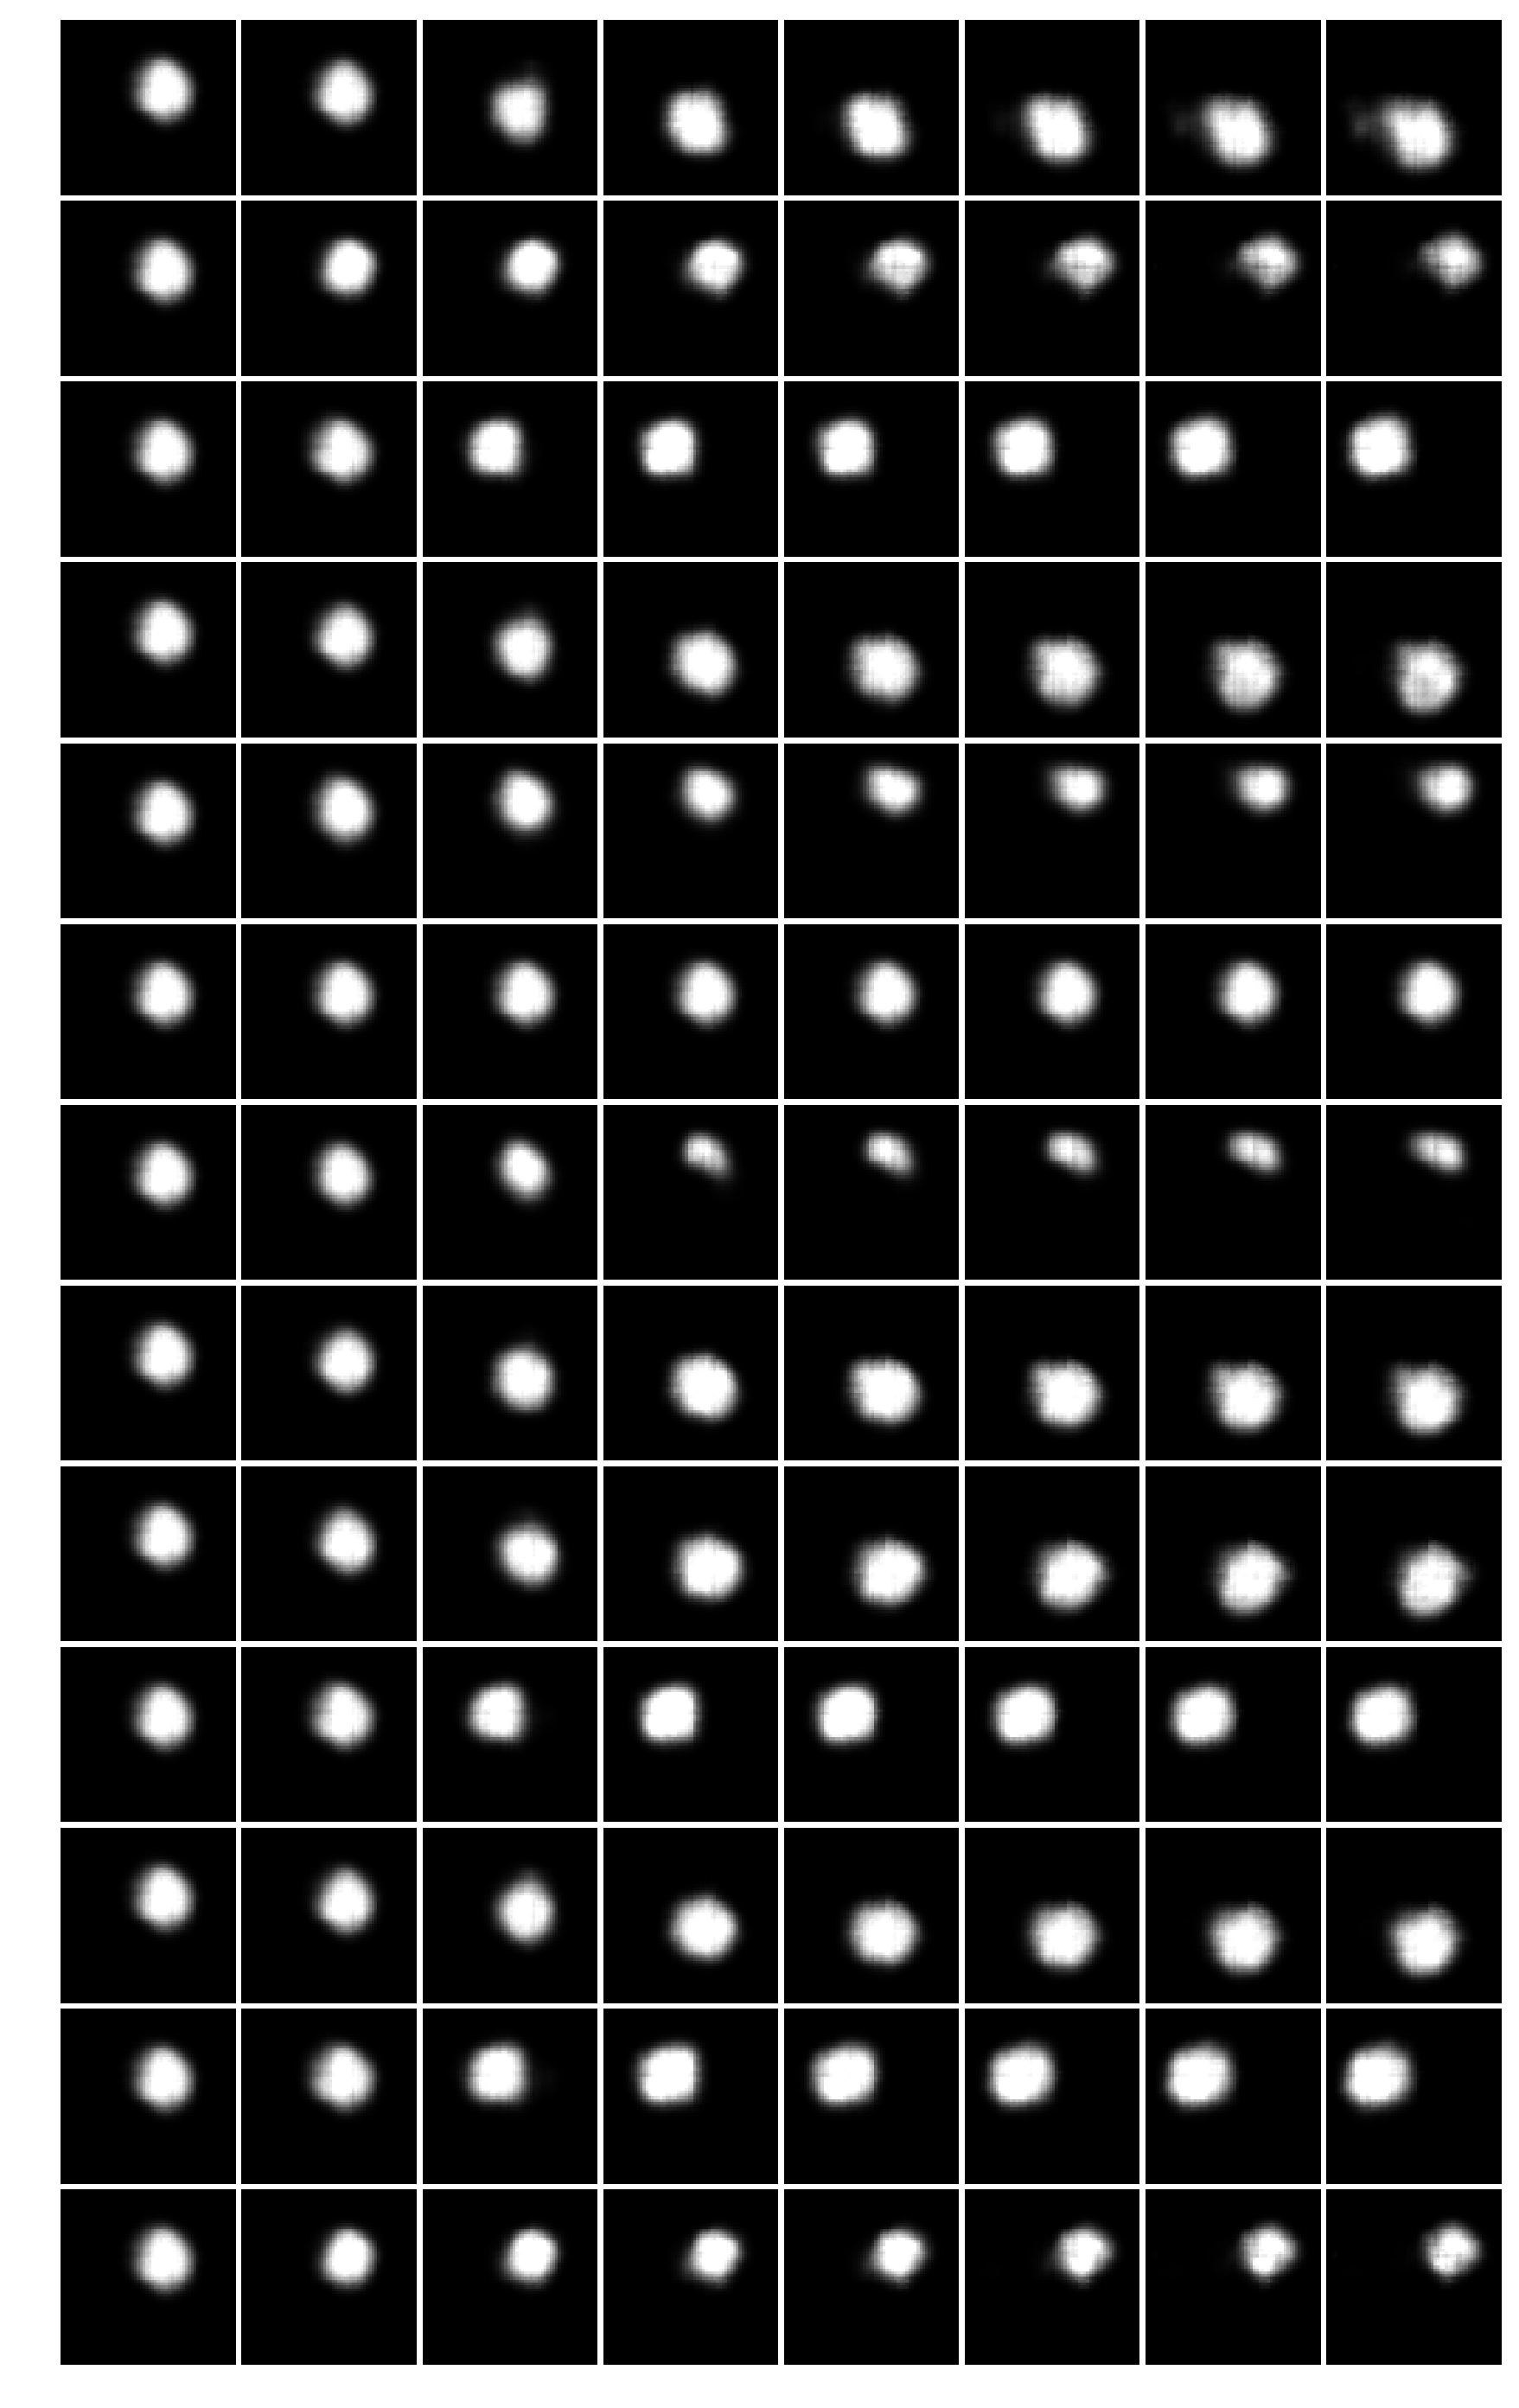

In [63]:
plot_horizontal_traversal(images[3][None,:], convvsc, 
                          model_params['latent_sz'], length=8, 
                          delta=0.7, threshold=3e-2,
                          plot_all=True, 
                          plot_list=None)

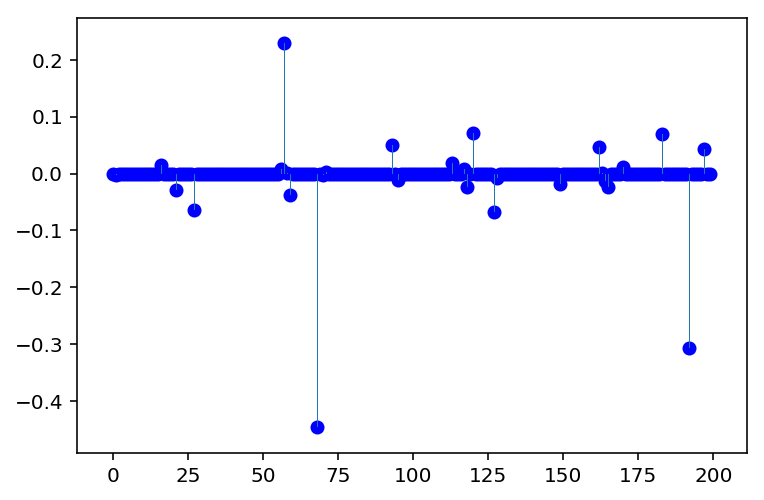

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


162 [27, 57, 59, 68, 93, 120, 127, 162, 183, 192, 197]


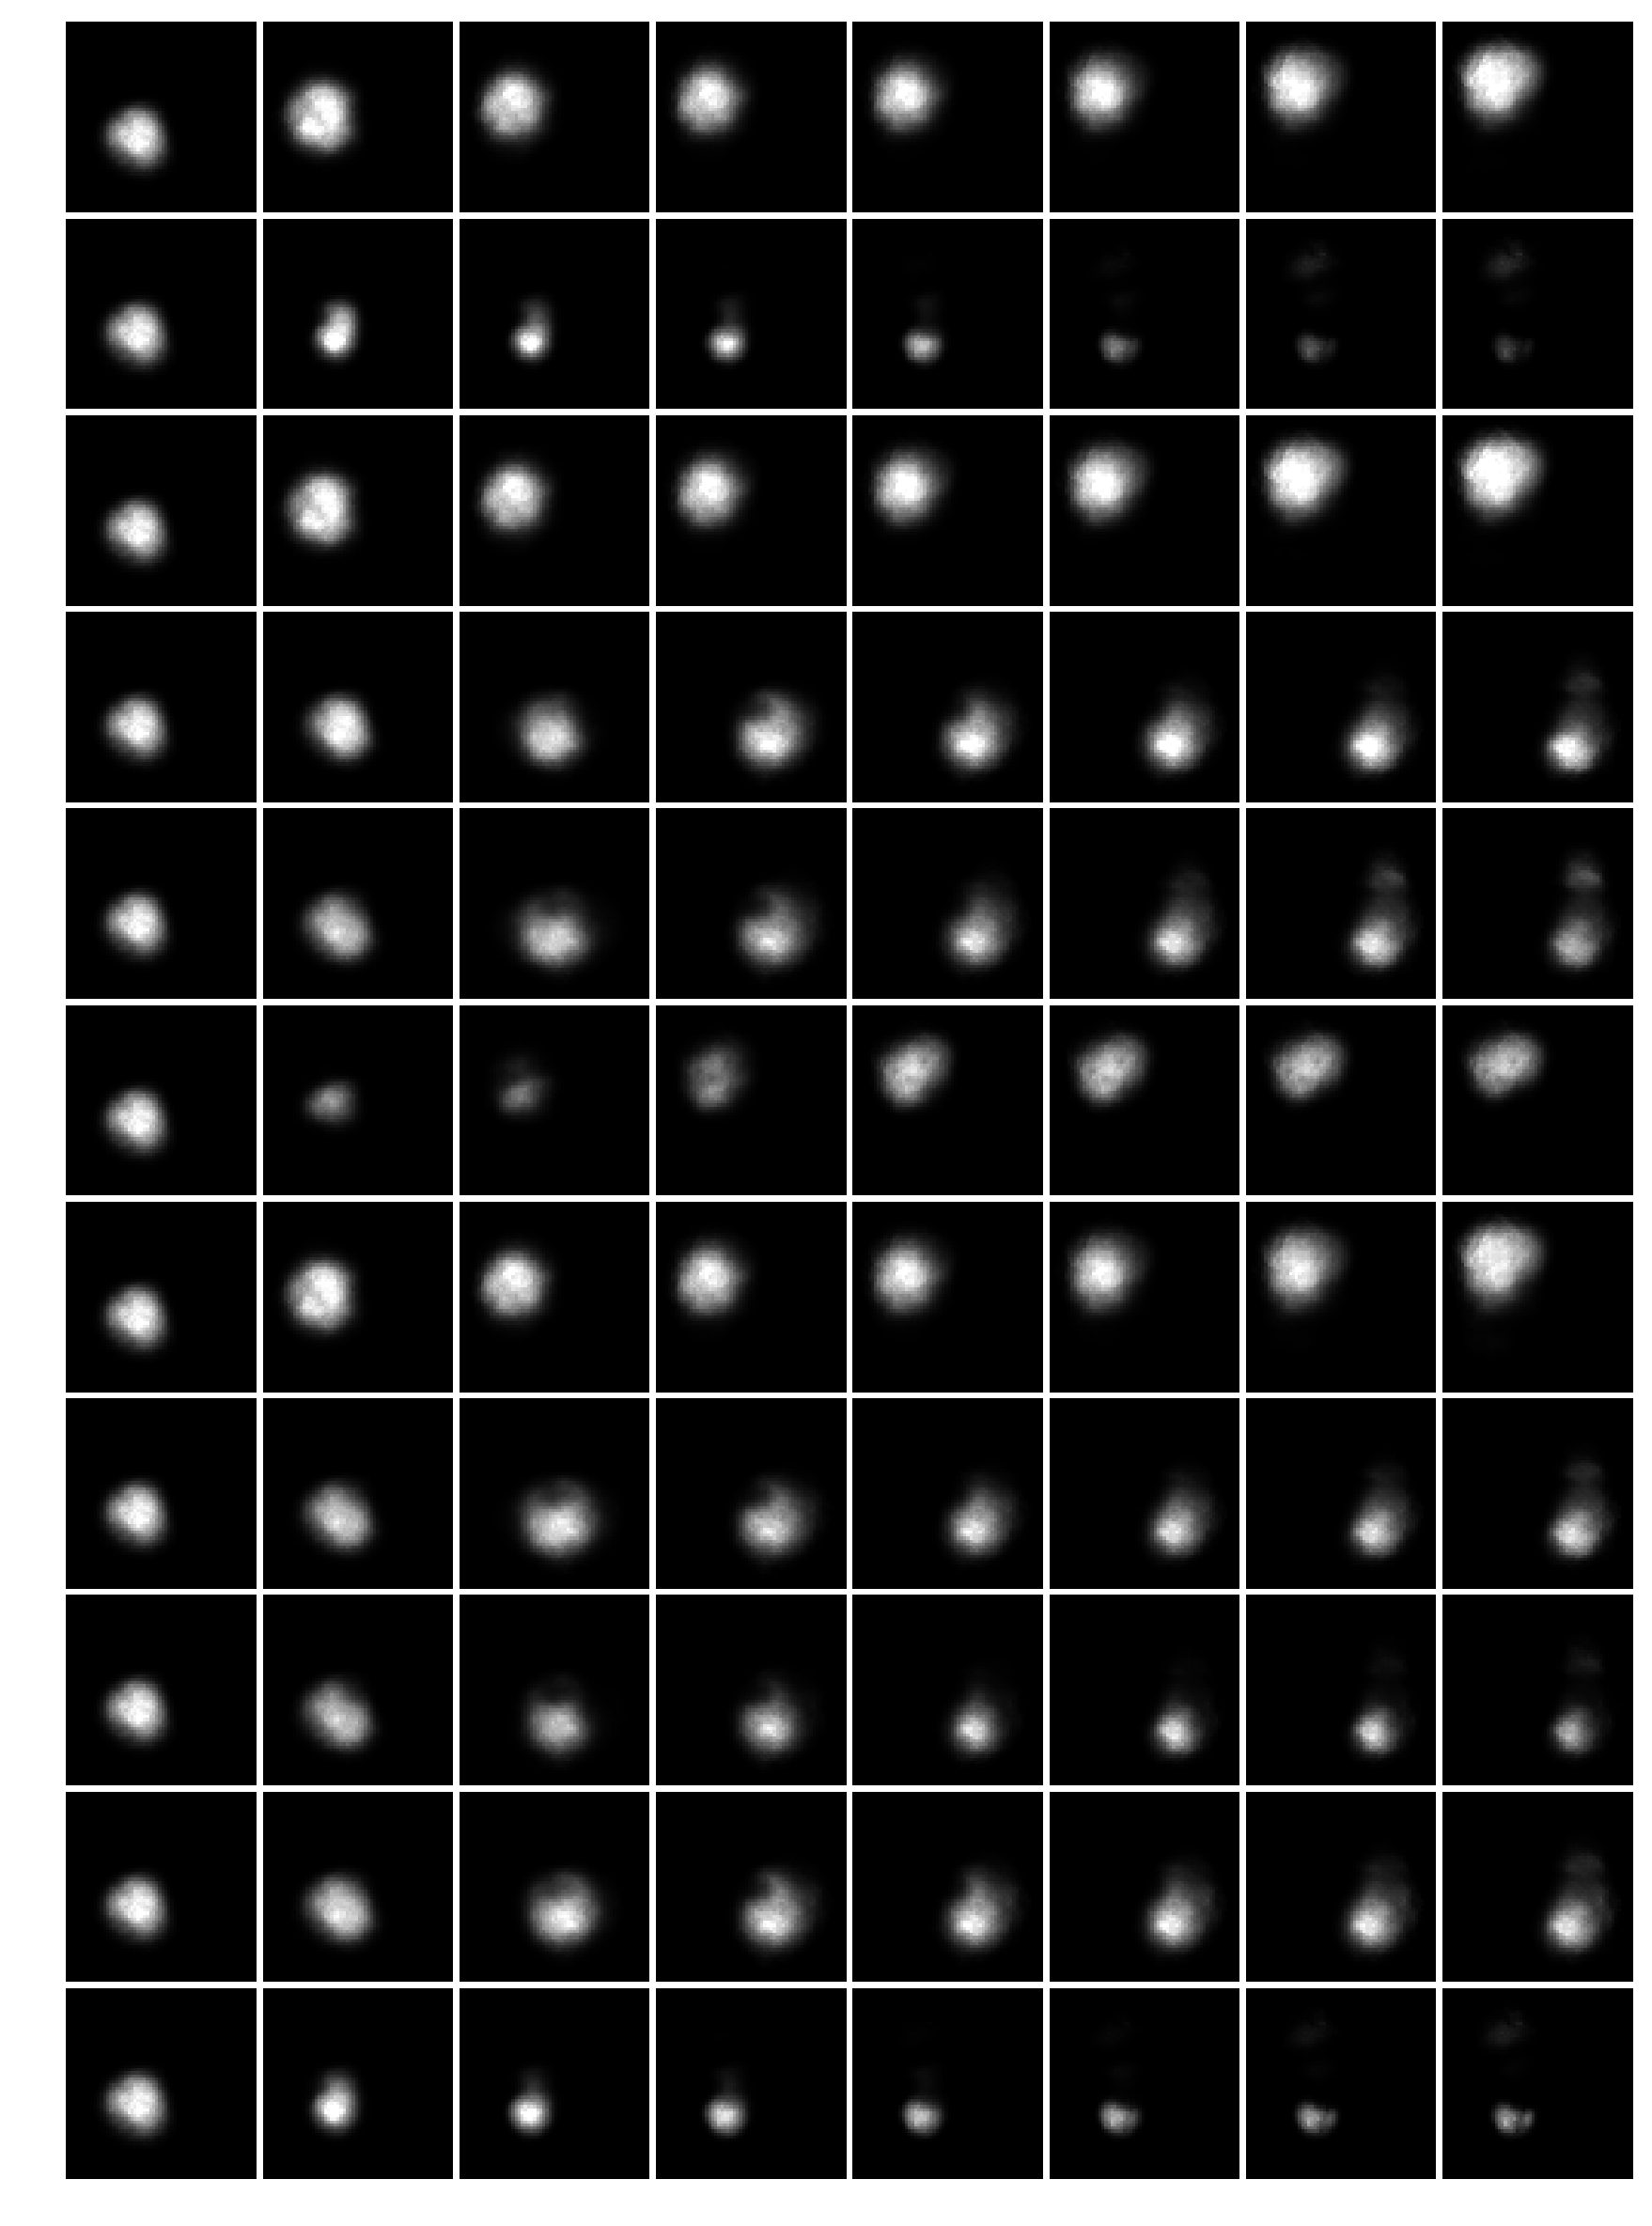

In [41]:
plot_horizontal_traversal(images[4][None,:], convvsc, 
                          model_params['latent_sz'], length=8, 
                          delta=0.5, threshold=3e-2,
                          plot_all=True, 
                          plot_list=None)

In [43]:
vsc = convvsc

## Beta ConvVSC

In [83]:
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 1024,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    
    'alpha': 1e-6,
    'beta': 40,
    'beta_delta': -3,
    'c': 50,
    'c_delta': 1e-3, 
    
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)

In [84]:
%%time
training_params = {
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 3,
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 112019.578125
Train Epoch: 1 [160000/600000 (27%)]	Loss: 22110.753906
Train Epoch: 1 [320000/600000 (53%)]	Loss: 12716.647461
Train Epoch: 1 [480000/600000 (80%)]	Loss: 12716.394531
====> Epoch: 1 Average loss: 15768.8895
====> Test set loss: 7190.1004 - VLB-ConvVSC : 230083.2143
Train Epoch: 2 [0/600000 (0%)]	Loss: 6650.885254
Train Epoch: 2 [160000/600000 (27%)]	Loss: 6650.757812
Train Epoch: 2 [320000/600000 (53%)]	Loss: 5628.561035
Train Epoch: 2 [480000/600000 (80%)]	Loss: 5628.712402
====> Epoch: 2 Average loss: 5806.2235
====> Test set loss: 5117.7682 - VLB-ConvVSC : 163768.5822
Train Epoch: 3 [0/600000 (0%)]	Loss: 4703.276367
Train Epoch: 3 [160000/600000 (27%)]	Loss: 4703.158691
Train Epoch: 3 [320000/600000 (53%)]	Loss: 4703.272949
Train Epoch: 3 [480000/600000 (80%)]	Loss: 4704.173828
====> Epoch: 3 Average loss: 4703.3160
====> Test set loss: 4703.3068 - VLB-ConvVSC : 150505.8167
CPU times: user 7min 58s, sys: 2

In [86]:
%%time
training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 3,
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4289.159668
Train Epoch: 1 [160000/600000 (27%)]	Loss: 4289.227539
Train Epoch: 1 [320000/600000 (53%)]	Loss: 4288.854980
Train Epoch: 1 [480000/600000 (80%)]	Loss: 4289.251953
====> Epoch: 1 Average loss: 4288.8471
====> Test set loss: 4288.8383 - VLB-ConvVSC : 137242.8261
Train Epoch: 2 [0/600000 (0%)]	Loss: 3873.980469
Train Epoch: 2 [160000/600000 (27%)]	Loss: 3874.727539
Train Epoch: 2 [320000/600000 (53%)]	Loss: 3874.151855
Train Epoch: 2 [480000/600000 (80%)]	Loss: 3874.679443
====> Epoch: 2 Average loss: 3874.3806
====> Test set loss: 3874.3703 - VLB-ConvVSC : 123979.8488
Train Epoch: 3 [0/600000 (0%)]	Loss: 3460.707520
Train Epoch: 3 [160000/600000 (27%)]	Loss: 3459.710938
Train Epoch: 3 [320000/600000 (53%)]	Loss: 3460.579590
Train Epoch: 3 [480000/600000 (80%)]	Loss: 3459.609863
====> Epoch: 3 Average loss: 3459.9146
====> Test set loss: 3459.9065 - VLB-ConvVSC : 110717.0088
CPU times: user 7min 46s, sys: 26.9 s,

In [81]:
%%time
training_params = { # OLD
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 3, # 6 epochs
    'report_interval': 1,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 19.944649
Train Epoch: 1 [160000/600000 (27%)]	Loss: 19.368362
Train Epoch: 1 [320000/600000 (53%)]	Loss: 20.292210
Train Epoch: 1 [480000/600000 (80%)]	Loss: 19.226616
====> Epoch: 1 Average loss: 19.8610
====> Test set loss: 19.8535 - VLB-ConvVSC : 635.3126
Train Epoch: 2 [0/600000 (0%)]	Loss: 18.946060
Train Epoch: 2 [160000/600000 (27%)]	Loss: 18.451591
Train Epoch: 2 [320000/600000 (53%)]	Loss: 18.366020
Train Epoch: 2 [480000/600000 (80%)]	Loss: 18.618496
====> Epoch: 2 Average loss: 18.7089
====> Test set loss: 18.6983 - VLB-ConvVSC : 598.3459
Train Epoch: 3 [0/600000 (0%)]	Loss: 16.990627
Train Epoch: 3 [160000/600000 (27%)]	Loss: 17.260702
Train Epoch: 3 [320000/600000 (53%)]	Loss: 16.632471
Train Epoch: 3 [480000/600000 (80%)]	Loss: 17.366383
====> Epoch: 3 Average loss: 17.5573
====> Test set loss: 17.5502 - VLB-ConvVSC : 561.6071
CPU times: user 8min 2s, sys: 26.8 s, total: 8min 29s
Wall time: 7min 33s


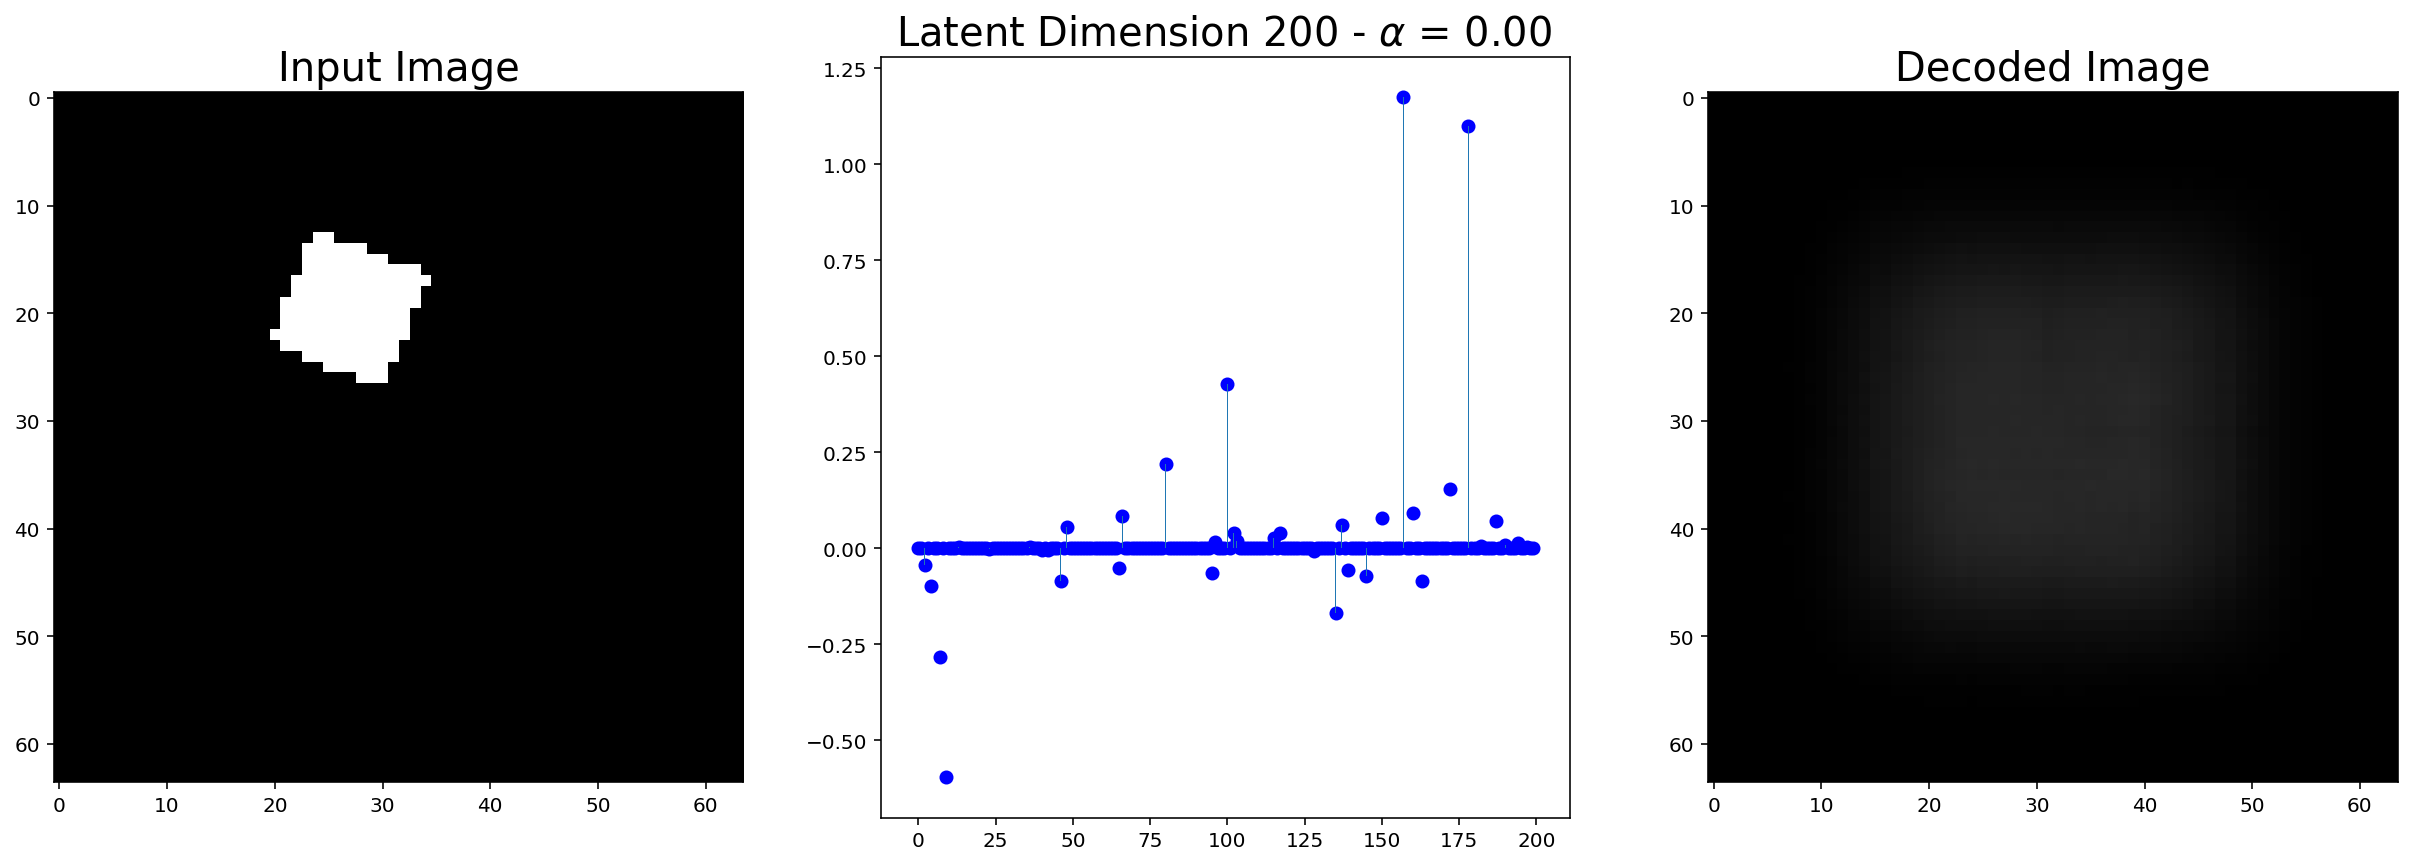

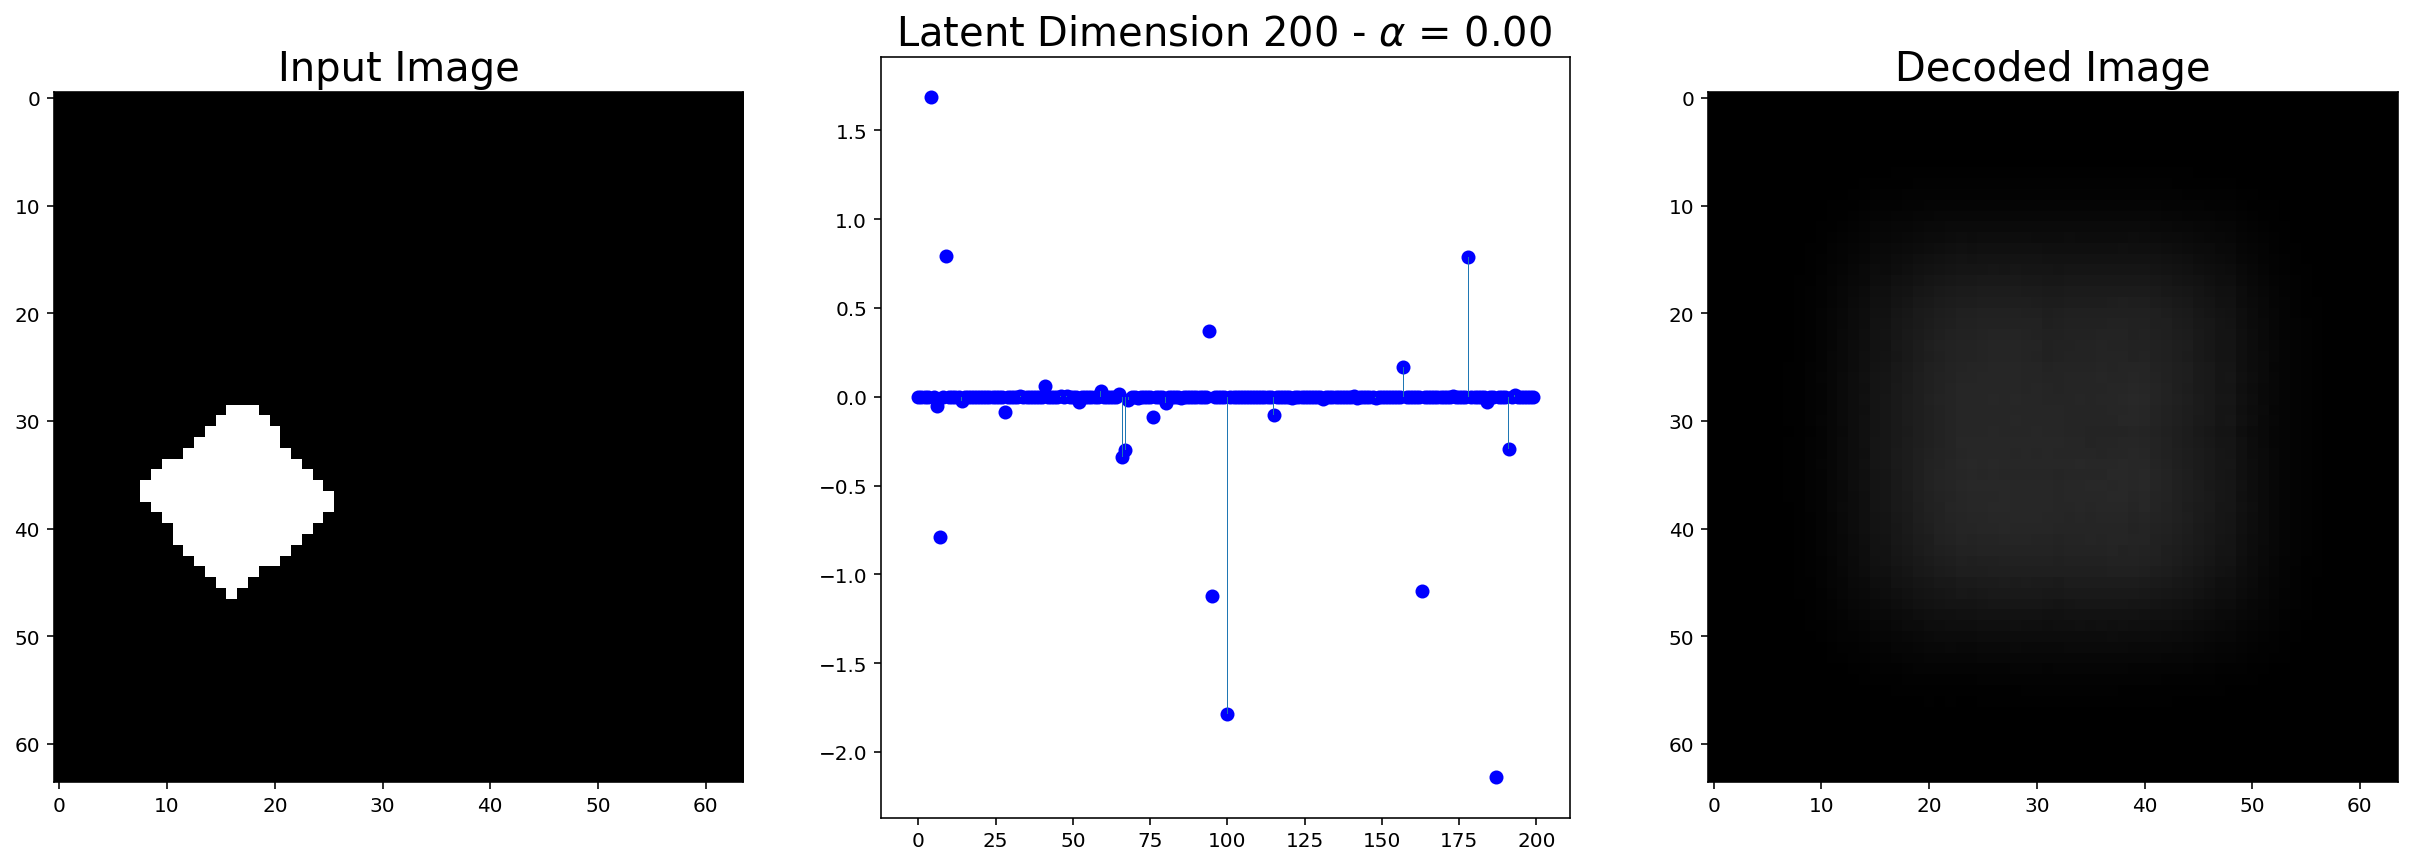

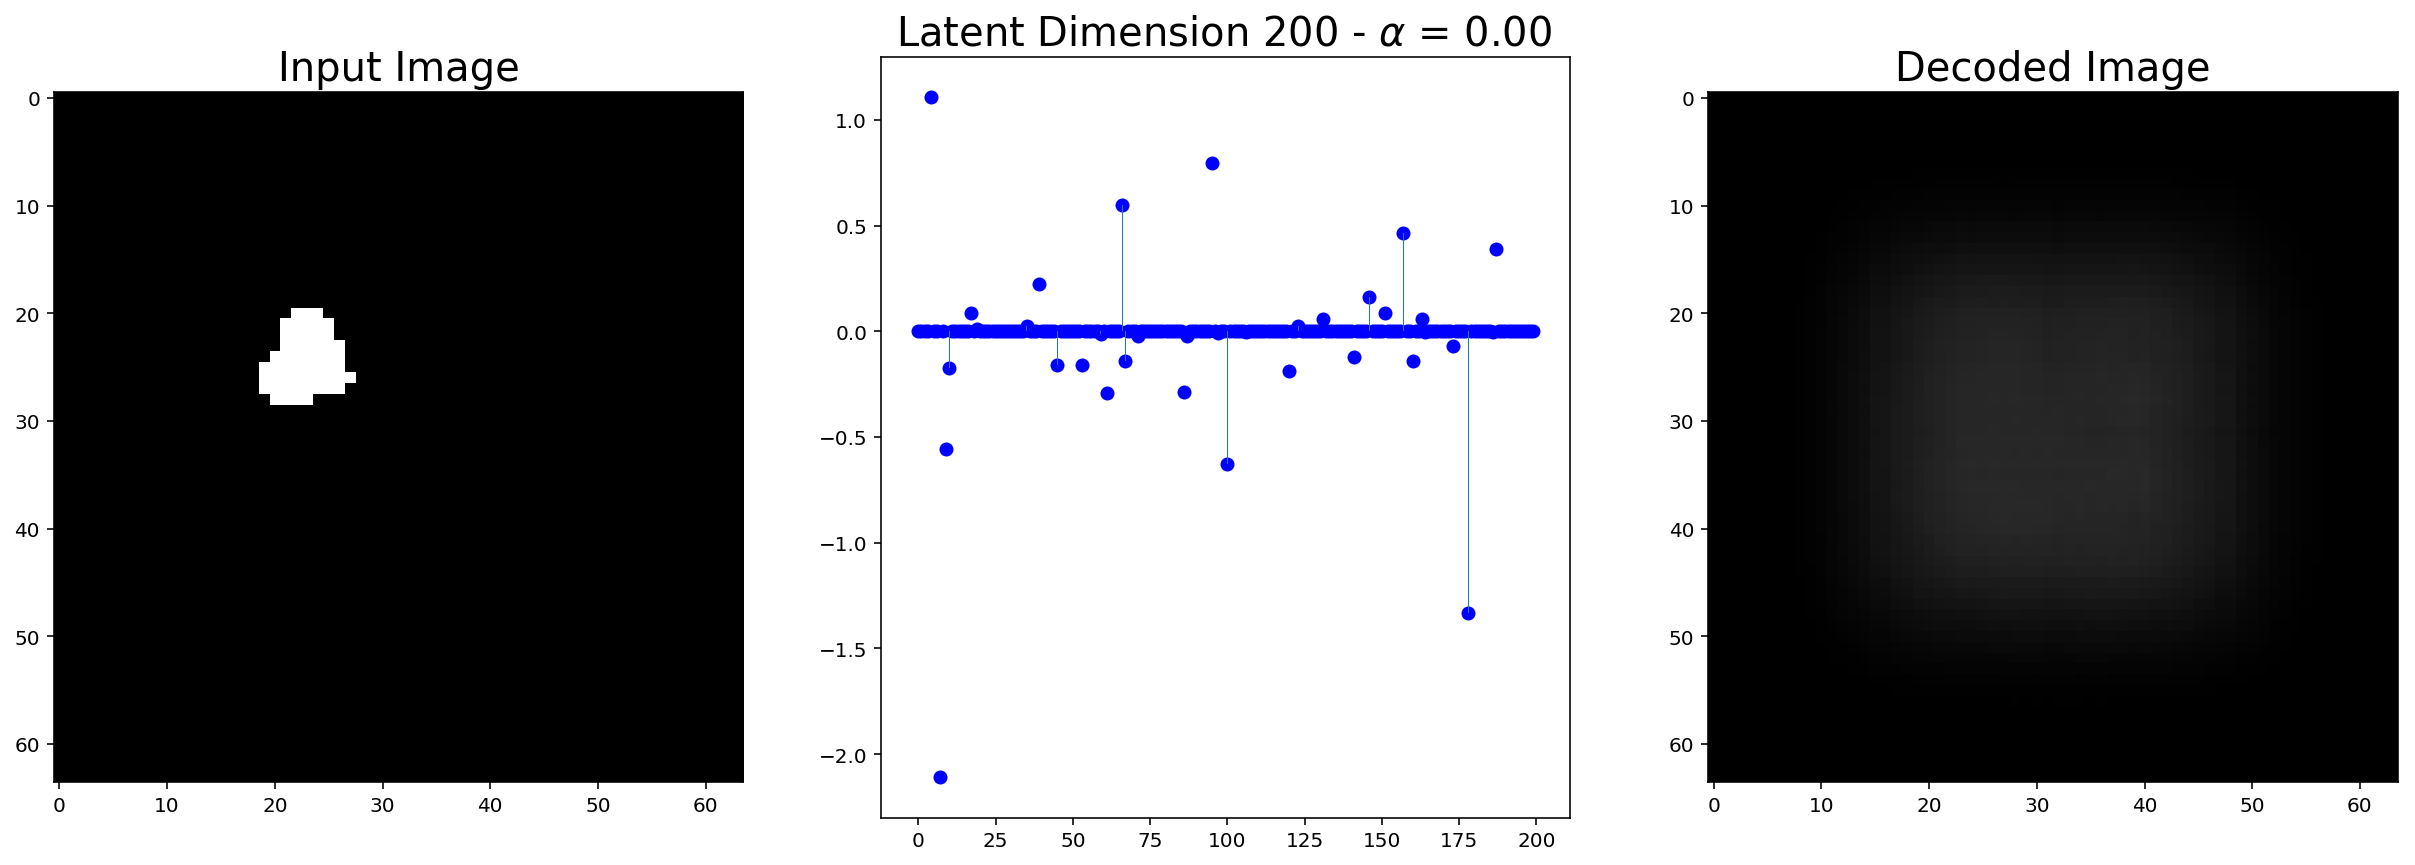

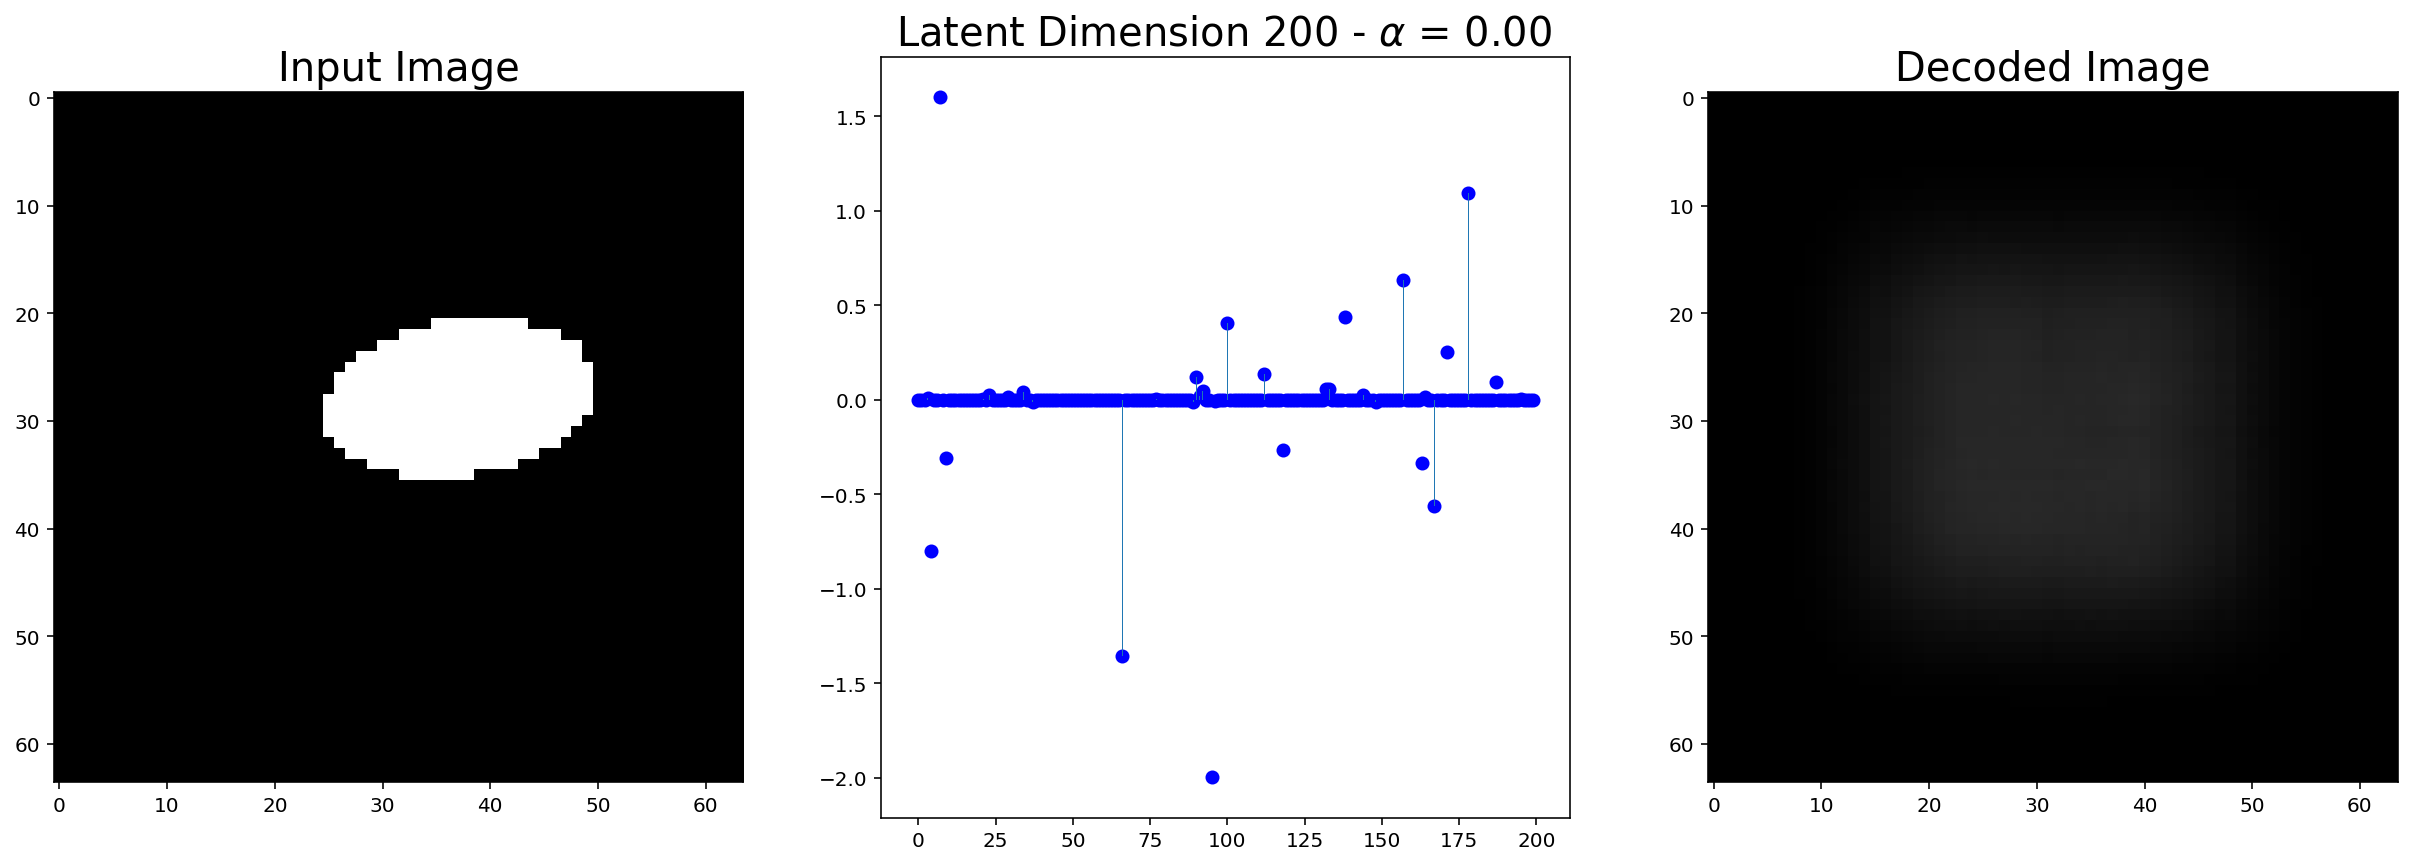

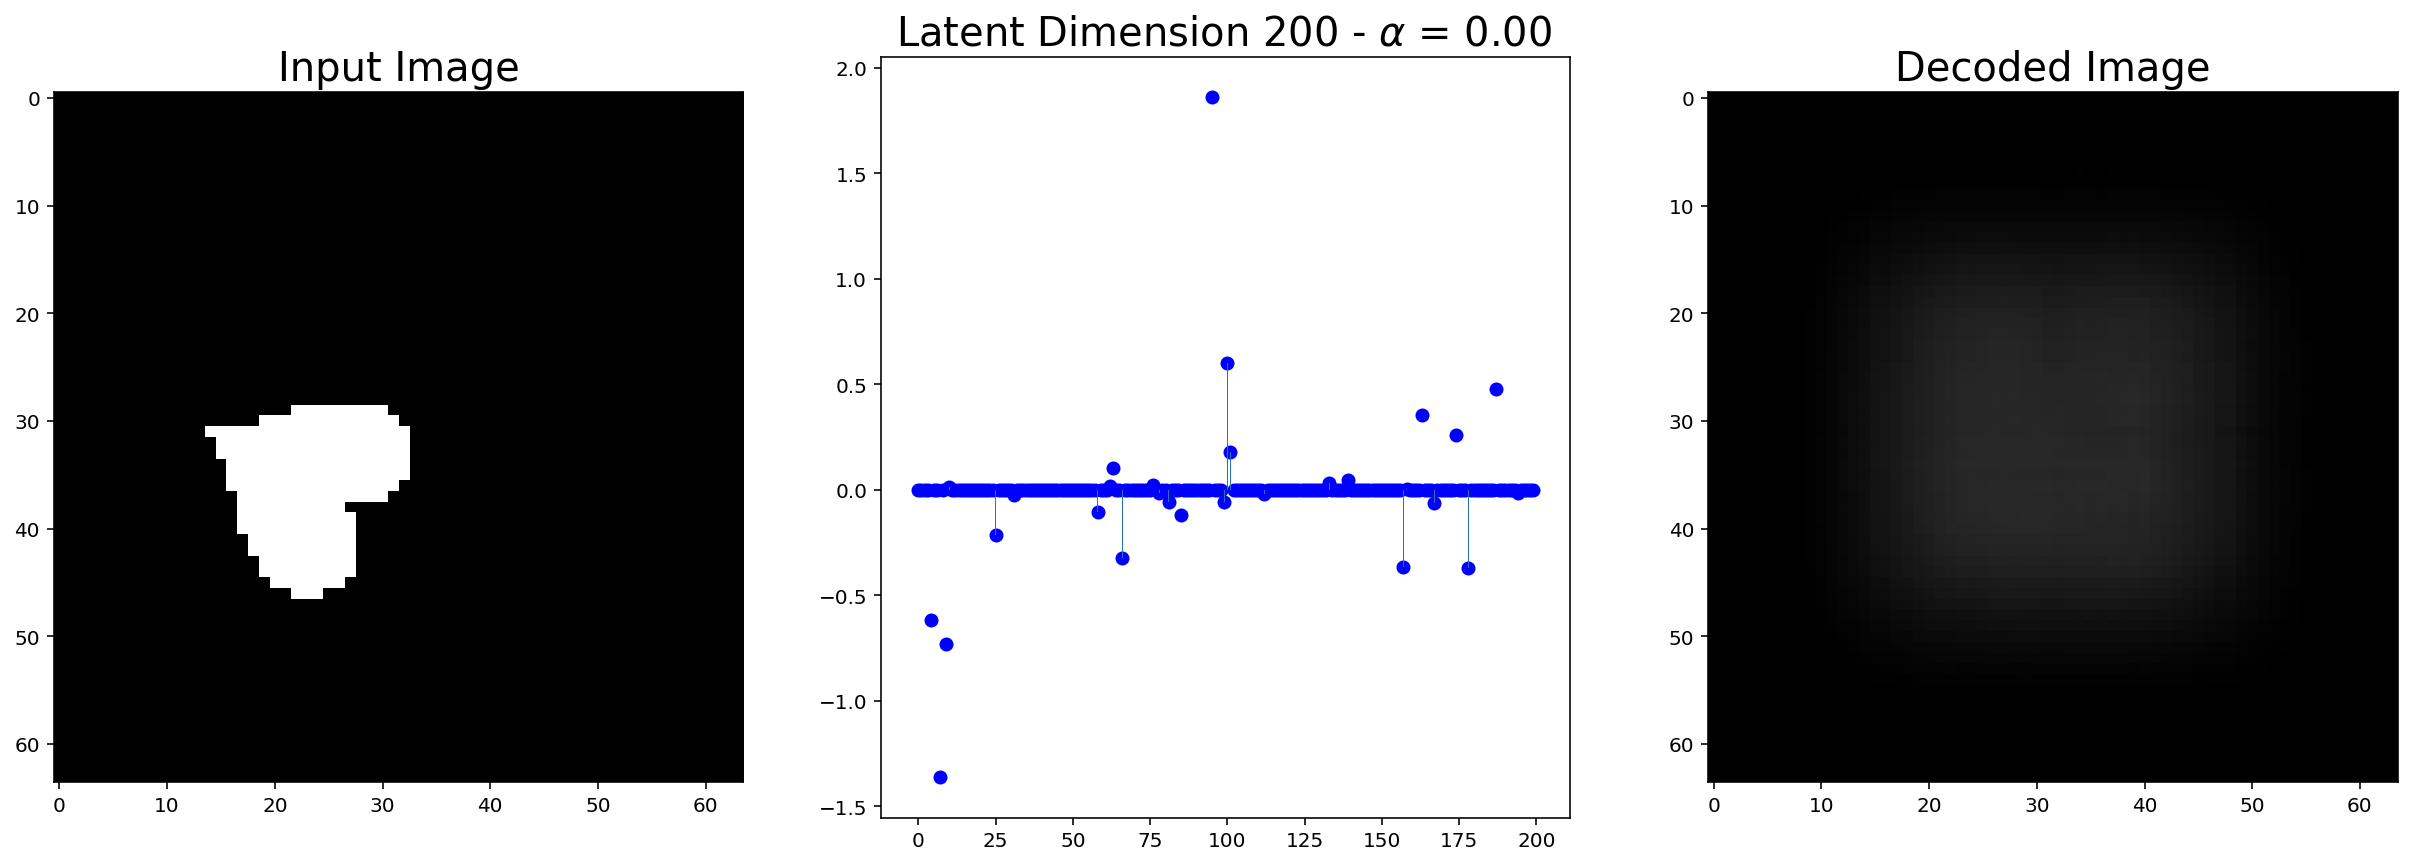

In [88]:
for i in range(5):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])

# Reproduce 256 hidden size

In [89]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    
    'alpha': 1e-6,
    'beta': 40,
    'beta_delta': -3,
    'c': 50,
    'c_delta': 1e-3, 
    
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 111004.328125
Train Epoch: 1 [160000/600000 (27%)]	Loss: 12746.473633
Train Epoch: 1 [320000/600000 (53%)]	Loss: 12716.978516
Train Epoch: 1 [480000/600000 (80%)]	Loss: 9401.531250
====> Epoch: 1 Average loss: 11968.1921
====> Test set loss: 9400.5769 - VLB-ConvVSC : 300818.4607
Train Epoch: 2 [0/600000 (0%)]	Loss: 8696.822266
Train Epoch: 2 [160000/600000 (27%)]	Loss: 8696.005859
Train Epoch: 2 [320000/600000 (53%)]	Loss: 5117.761719
Train Epoch: 2 [480000/600000 (80%)]	Loss: 5117.226562
====> Epoch: 2 Average loss: 6142.2774
====> Test set loss: 5117.7644 - VLB-ConvVSC : 163768.4596
Train Epoch: 3 [0/600000 (0%)]	Loss: 4702.774902
Train Epoch: 3 [160000/600000 (27%)]	Loss: 4703.038574
Train Epoch: 3 [320000/600000 (53%)]	Loss: 4703.262695
Train Epoch: 3 [480000/600000 (80%)]	Loss: 4703.604492
====> Epoch: 3 Average loss: 4703.3081
====> Test set loss: 4703.2982 - VLB-ConvVSC : 150505.5435
CPU times: user 7min 54s, sys: 26

In [91]:
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4288.701172
Train Epoch: 1 [160000/600000 (27%)]	Loss: 4288.622070
Train Epoch: 1 [320000/600000 (53%)]	Loss: 3431.861816
Train Epoch: 1 [480000/600000 (80%)]	Loss: 3432.013916
====> Epoch: 1 Average loss: 3746.4651
====> Test set loss: 3432.2819 - VLB-ConvVSC : 109833.0203
Train Epoch: 2 [0/600000 (0%)]	Loss: 3100.552490
Train Epoch: 2 [160000/600000 (27%)]	Loss: 3101.544922
Train Epoch: 2 [320000/600000 (53%)]	Loss: 779.870178
Train Epoch: 2 [480000/600000 (80%)]	Loss: 780.103760
====> Epoch: 2 Average loss: 1747.6361
====> Test set loss: 779.7025 - VLB-ConvVSC : 24950.4788
Train Epoch: 3 [0/600000 (0%)]	Loss: 696.355652
Train Epoch: 3 [160000/600000 (27%)]	Loss: 697.042053
Train Epoch: 3 [320000/600000 (53%)]	Loss: 696.833740
Train Epoch: 3 [480000/600000 (80%)]	Loss: 352.398468
====> Epoch: 3 Average loss: 621.6964
====> Test set loss: 351.4229 - VLB-ConvVSC : 11245.5344


In [93]:
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 310.602631
Train Epoch: 1 [160000/600000 (27%)]	Loss: 7.028969
Train Epoch: 1 [320000/600000 (53%)]	Loss: 5.902441
Train Epoch: 1 [480000/600000 (80%)]	Loss: 5.470244
====> Epoch: 1 Average loss: 19.3302
====> Test set loss: 6.0366 - VLB-ConvVSC : 193.1707
Train Epoch: 2 [0/600000 (0%)]	Loss: 5.896570
Train Epoch: 2 [160000/600000 (27%)]	Loss: 4.841123
Train Epoch: 2 [320000/600000 (53%)]	Loss: 6.722964
Train Epoch: 2 [480000/600000 (80%)]	Loss: 6.221700
====> Epoch: 2 Average loss: 6.0435
====> Test set loss: 6.0337 - VLB-ConvVSC : 193.0797
Train Epoch: 3 [0/600000 (0%)]	Loss: 6.496408
Train Epoch: 3 [160000/600000 (27%)]	Loss: 5.597084
Train Epoch: 3 [320000/600000 (53%)]	Loss: 5.934333
Train Epoch: 3 [480000/600000 (80%)]	Loss: 6.383334
====> Epoch: 3 Average loss: 6.0434
====> Test set loss: 6.0342 - VLB-ConvVSC : 193.0958


In [98]:
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 6.519135
Train Epoch: 1 [160000/600000 (27%)]	Loss: 5.281013
Train Epoch: 1 [320000/600000 (53%)]	Loss: 6.006215
Train Epoch: 1 [480000/600000 (80%)]	Loss: 6.171841
====> Epoch: 1 Average loss: 6.0434
====> Test set loss: 6.0346 - VLB-ConvVSC : 193.1082
Train Epoch: 2 [0/600000 (0%)]	Loss: 6.113883
Train Epoch: 2 [160000/600000 (27%)]	Loss: 4.871466
Train Epoch: 2 [320000/600000 (53%)]	Loss: 5.303418
Train Epoch: 2 [480000/600000 (80%)]	Loss: 5.365330
====> Epoch: 2 Average loss: 6.0433
====> Test set loss: 6.0356 - VLB-ConvVSC : 193.1404
Train Epoch: 3 [0/600000 (0%)]	Loss: 5.876736
Train Epoch: 3 [160000/600000 (27%)]	Loss: 6.844706
Train Epoch: 3 [320000/600000 (53%)]	Loss: 6.370381
Train Epoch: 3 [480000/600000 (80%)]	Loss: 5.894759
====> Epoch: 3 Average loss: 6.0432
====> Test set loss: 6.0356 - VLB-ConvVSC : 193.1399


## Lower beta

In [103]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    
    'alpha': 1e-6,
    'beta': 1,
    'beta_delta': 0,
    'c': 50,
    'c_delta': 1e-3, 
    
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 3, 
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 5211.776367
Train Epoch: 1 [160000/600000 (27%)]	Loss: 351.583008
Train Epoch: 1 [320000/600000 (53%)]	Loss: 351.203064
Train Epoch: 1 [480000/600000 (80%)]	Loss: 46.657078
====> Epoch: 1 Average loss: 258.1193
====> Test set loss: 47.4862 - VLB-ConvVSC : 1519.5587
Train Epoch: 2 [0/600000 (0%)]	Loss: 47.950848
Train Epoch: 2 [160000/600000 (27%)]	Loss: 47.384171
Train Epoch: 2 [320000/600000 (53%)]	Loss: 19.827702
Train Epoch: 2 [480000/600000 (80%)]	Loss: 20.653648
====> Epoch: 2 Average loss: 28.4344
====> Test set loss: 19.8555 - VLB-ConvVSC : 635.3752
Train Epoch: 3 [0/600000 (0%)]	Loss: 19.614399
Train Epoch: 3 [160000/600000 (27%)]	Loss: 4.636737
Train Epoch: 3 [320000/600000 (53%)]	Loss: 5.404386
Train Epoch: 3 [480000/600000 (80%)]	Loss: 5.303182
====> Epoch: 3 Average loss: 7.3529
====> Test set loss: 4.8665 - VLB-ConvVSC : 155.7293
CPU times: user 7min 50s, sys: 26.9 s, total: 8min 17s
Wall time: 7min 21s


In [105]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    
    'alpha': 1e-6,
    'beta': 2,
    'beta_delta': 0,
    'c': 50,
    'c_delta': 1e-3, 
    
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 3, 
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 8015.878906
Train Epoch: 1 [160000/600000 (27%)]	Loss: 531.612976
Train Epoch: 1 [320000/600000 (53%)]	Loss: 365.729950
Train Epoch: 1 [480000/600000 (80%)]	Loss: 227.814331
====> Epoch: 1 Average loss: 458.1118
====> Test set loss: 171.8233 - VLB-ConvVSC : 5498.3445
Train Epoch: 2 [0/600000 (0%)]	Loss: 172.380798
Train Epoch: 2 [160000/600000 (27%)]	Loss: 144.033859
Train Epoch: 2 [320000/600000 (53%)]	Loss: 145.360245
Train Epoch: 2 [480000/600000 (80%)]	Loss: 144.151245
====> Epoch: 2 Average loss: 150.8115
====> Test set loss: 144.1933 - VLB-ConvVSC : 4614.1850
Train Epoch: 3 [0/600000 (0%)]	Loss: 144.000778
Train Epoch: 3 [160000/600000 (27%)]	Loss: 144.585556
Train Epoch: 3 [320000/600000 (53%)]	Loss: 145.164581
Train Epoch: 3 [480000/600000 (80%)]	Loss: 60.723465
====> Epoch: 3 Average loss: 117.0511
====> Test set loss: 60.2740 - VLB-ConvVSC : 1928.7675
CPU times: user 7min 56s, sys: 27.6 s, total: 8min 24s
Wall tim

In [109]:
%%time
model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 1e-3,
    
    'alpha': 1e-6,
    'beta': 3,
    'beta_delta': 0,
    'c': 50,
    'c_delta': 1e-3, 
    
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 3, 
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)
convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 11505.262695
Train Epoch: 1 [160000/600000 (27%)]	Loss: 627.490417
Train Epoch: 1 [320000/600000 (53%)]	Loss: 627.548828
Train Epoch: 1 [480000/600000 (80%)]	Loss: 627.553406
====> Epoch: 1 Average loss: 796.3764
====> Test set loss: 213.2732 - VLB-ConvVSC : 6824.7417
Train Epoch: 2 [0/600000 (0%)]	Loss: 213.488235
Train Epoch: 2 [160000/600000 (27%)]	Loss: 212.760239
Train Epoch: 2 [320000/600000 (53%)]	Loss: 213.424164
Train Epoch: 2 [480000/600000 (80%)]	Loss: 213.190399
====> Epoch: 2 Average loss: 213.2806
====> Test set loss: 213.2669 - VLB-ConvVSC : 6824.5398
Train Epoch: 3 [0/600000 (0%)]	Loss: 213.207779
Train Epoch: 3 [160000/600000 (27%)]	Loss: 213.605820
Train Epoch: 3 [320000/600000 (53%)]	Loss: 213.313324
Train Epoch: 3 [480000/600000 (80%)]	Loss: 172.063507
====> Epoch: 3 Average loss: 195.1557
====> Test set loss: 171.8234 - VLB-ConvVSC : 5498.3473
CPU times: user 7min 44s, sys: 26.7 s, total: 8min 10s
Wall 

In [97]:
torch.save(convvsc.model.state_dict(), 
           'dsprites_beta_model_9e.pth')

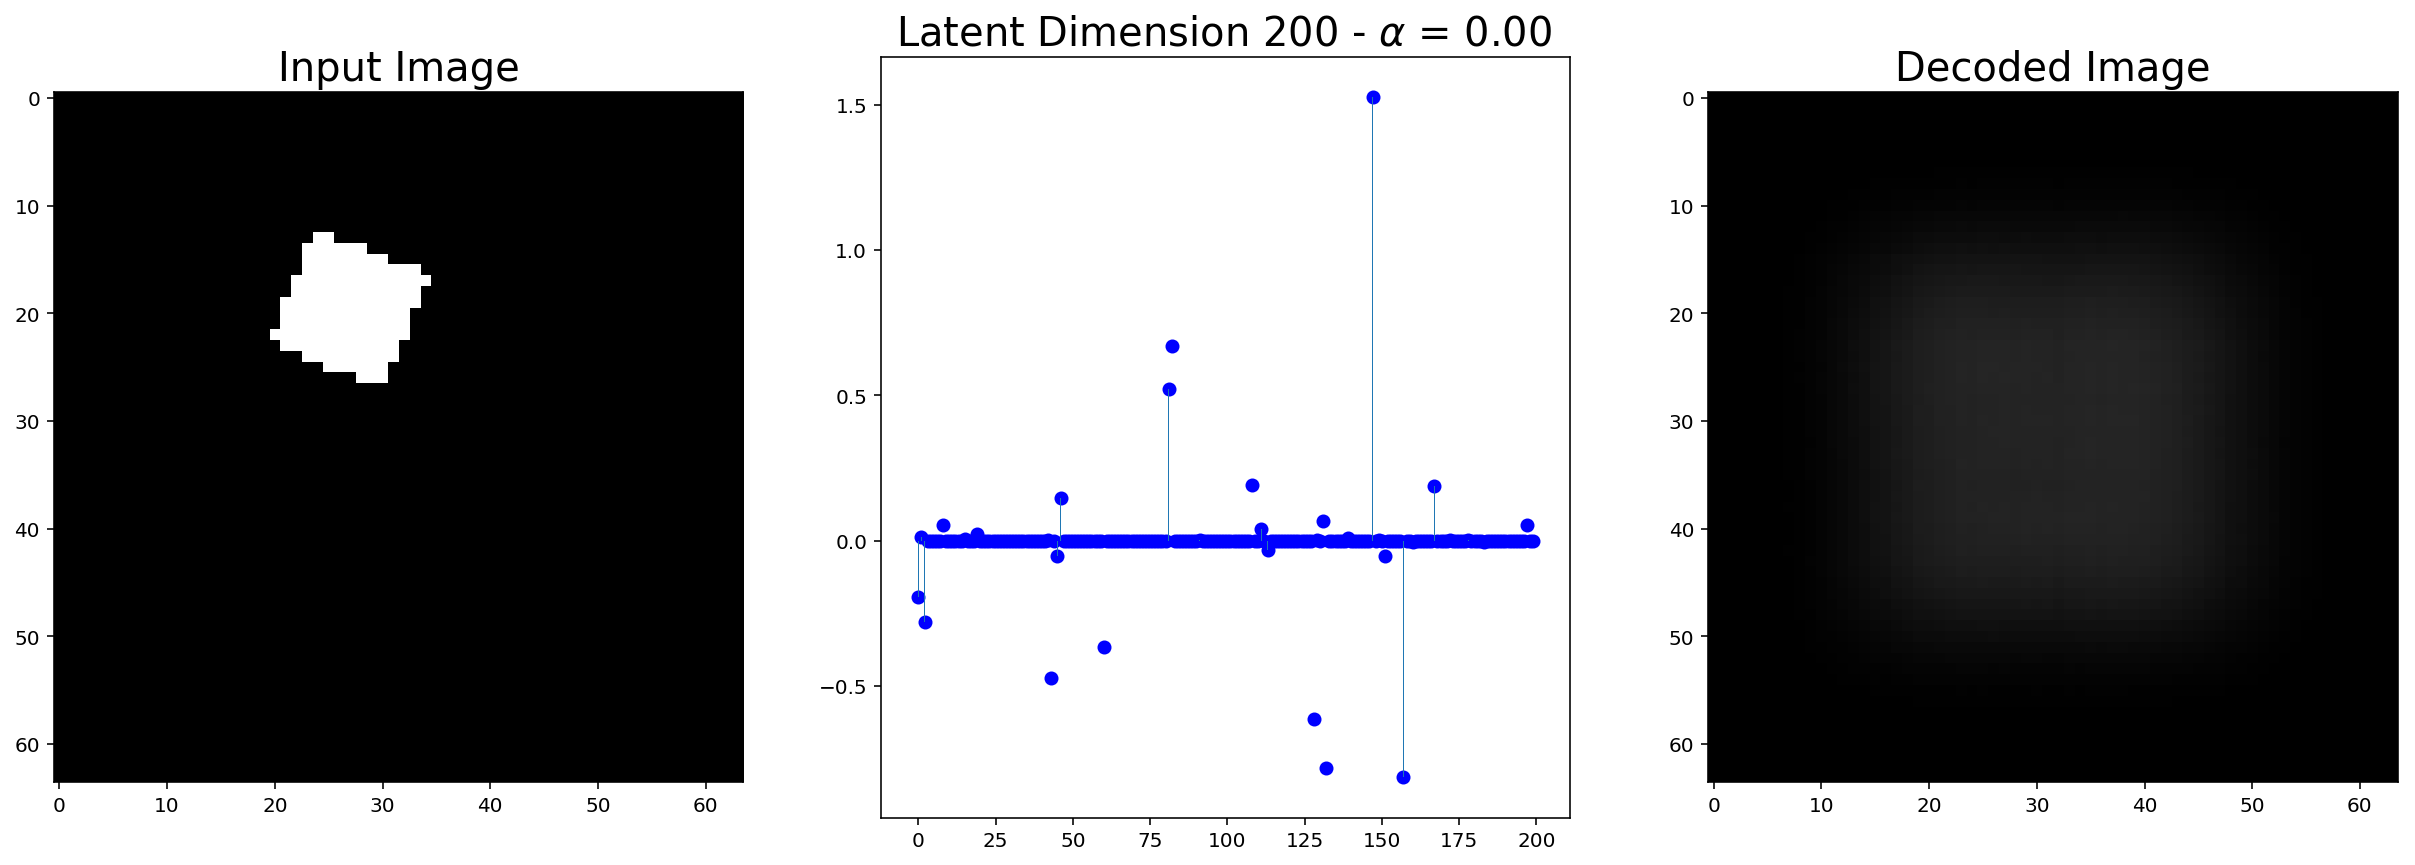

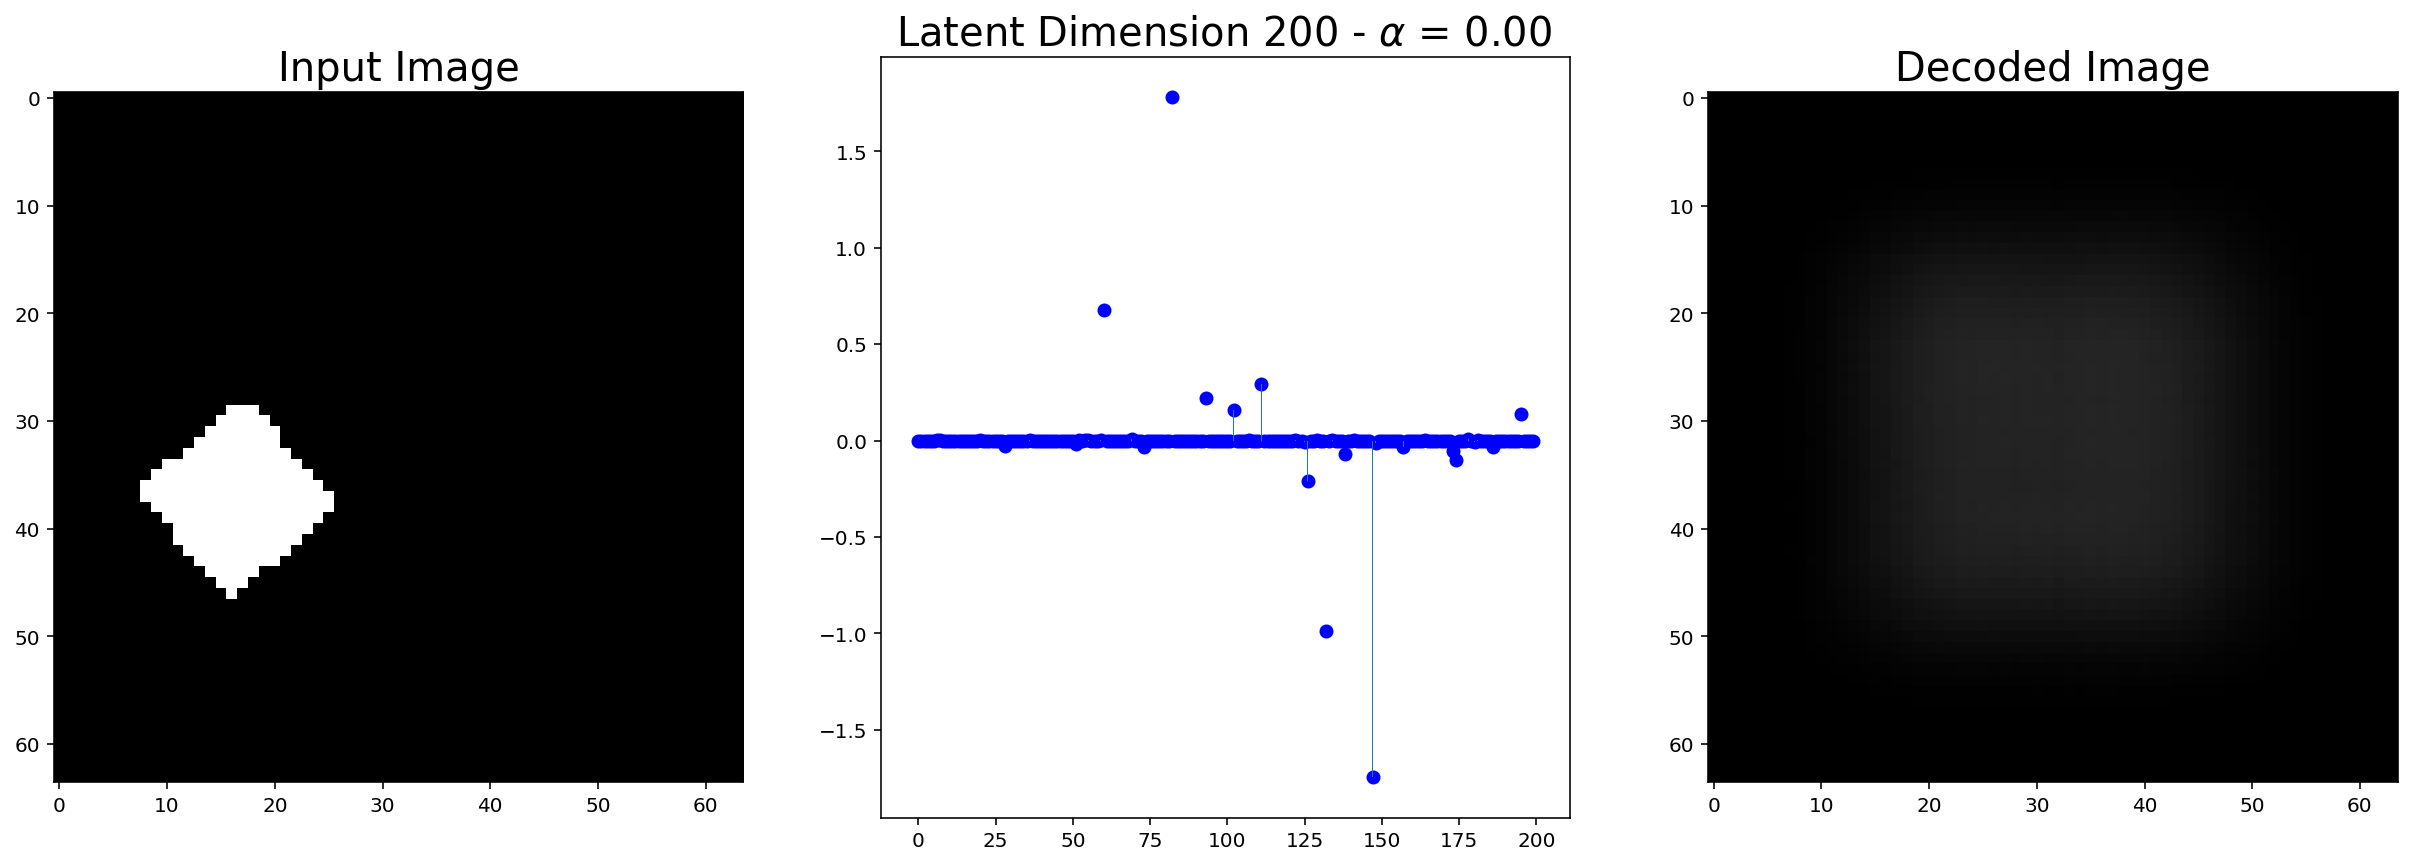

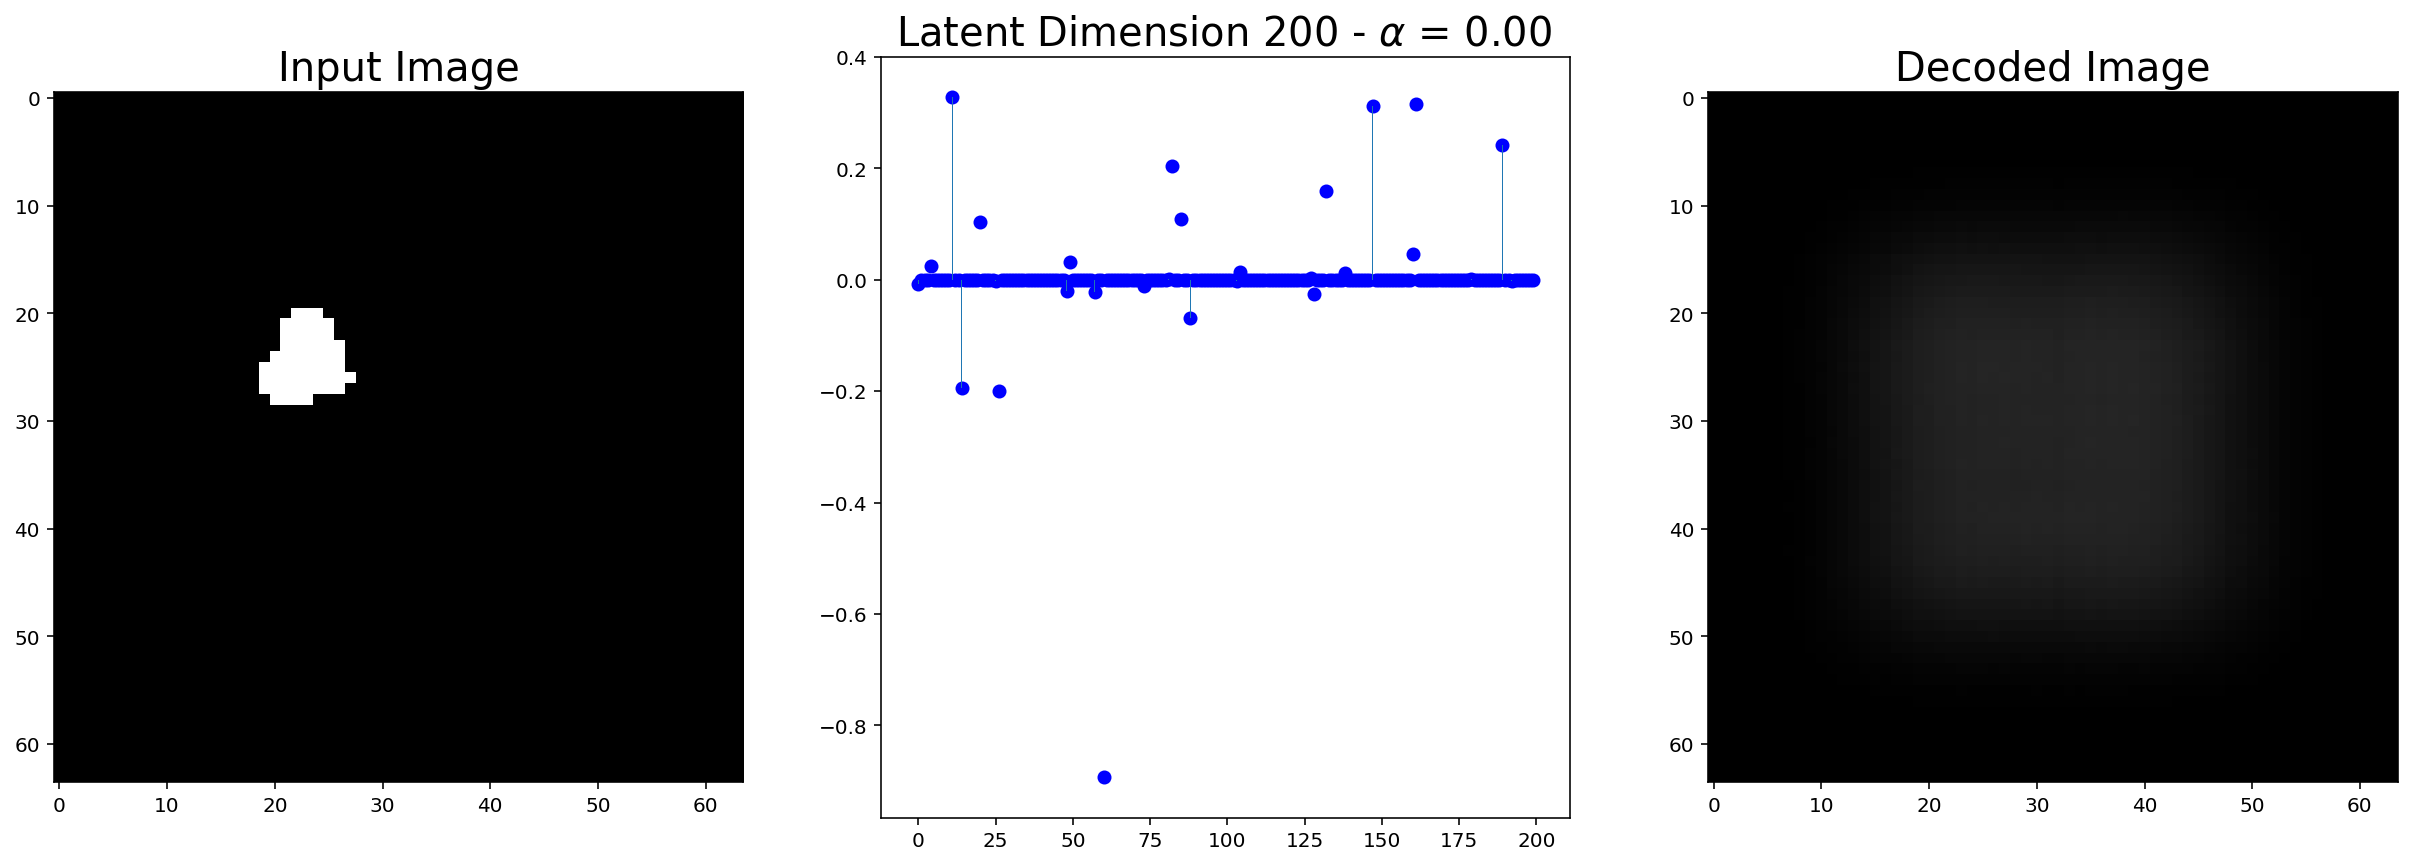

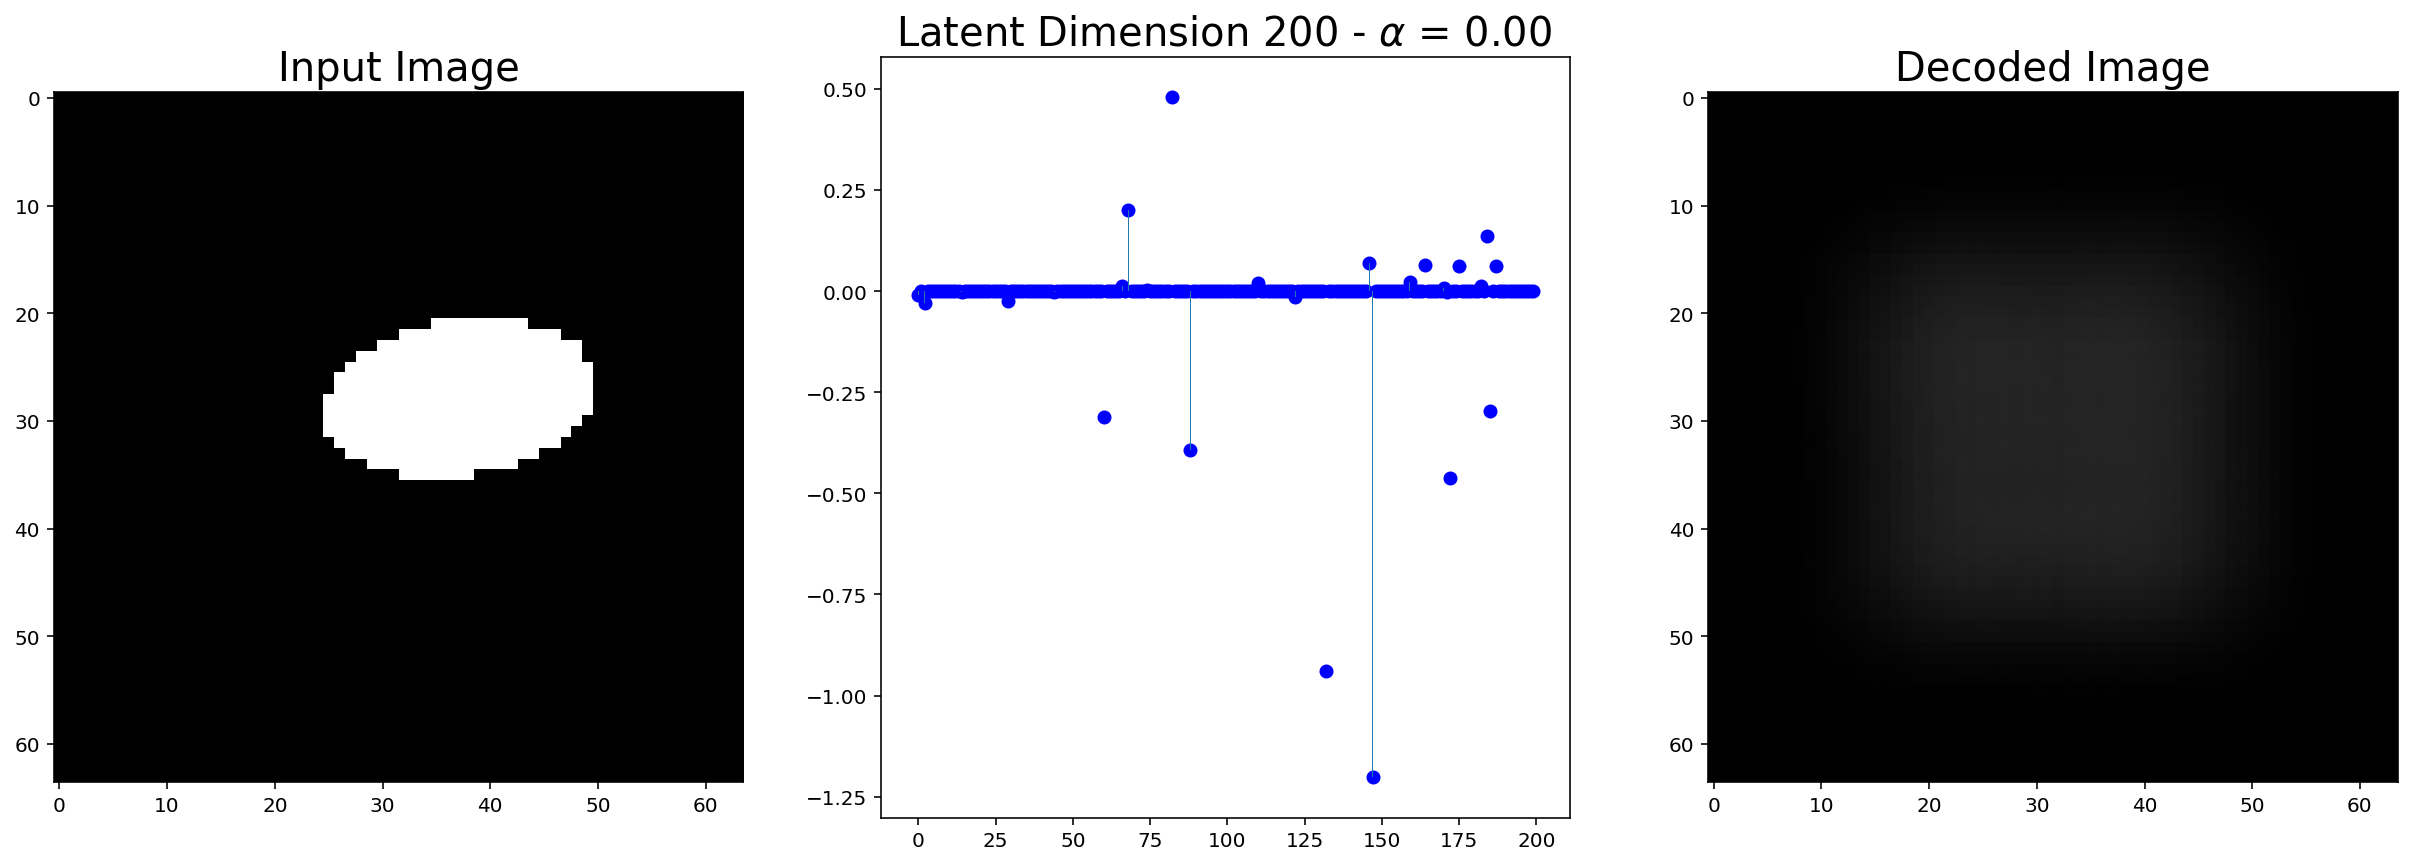

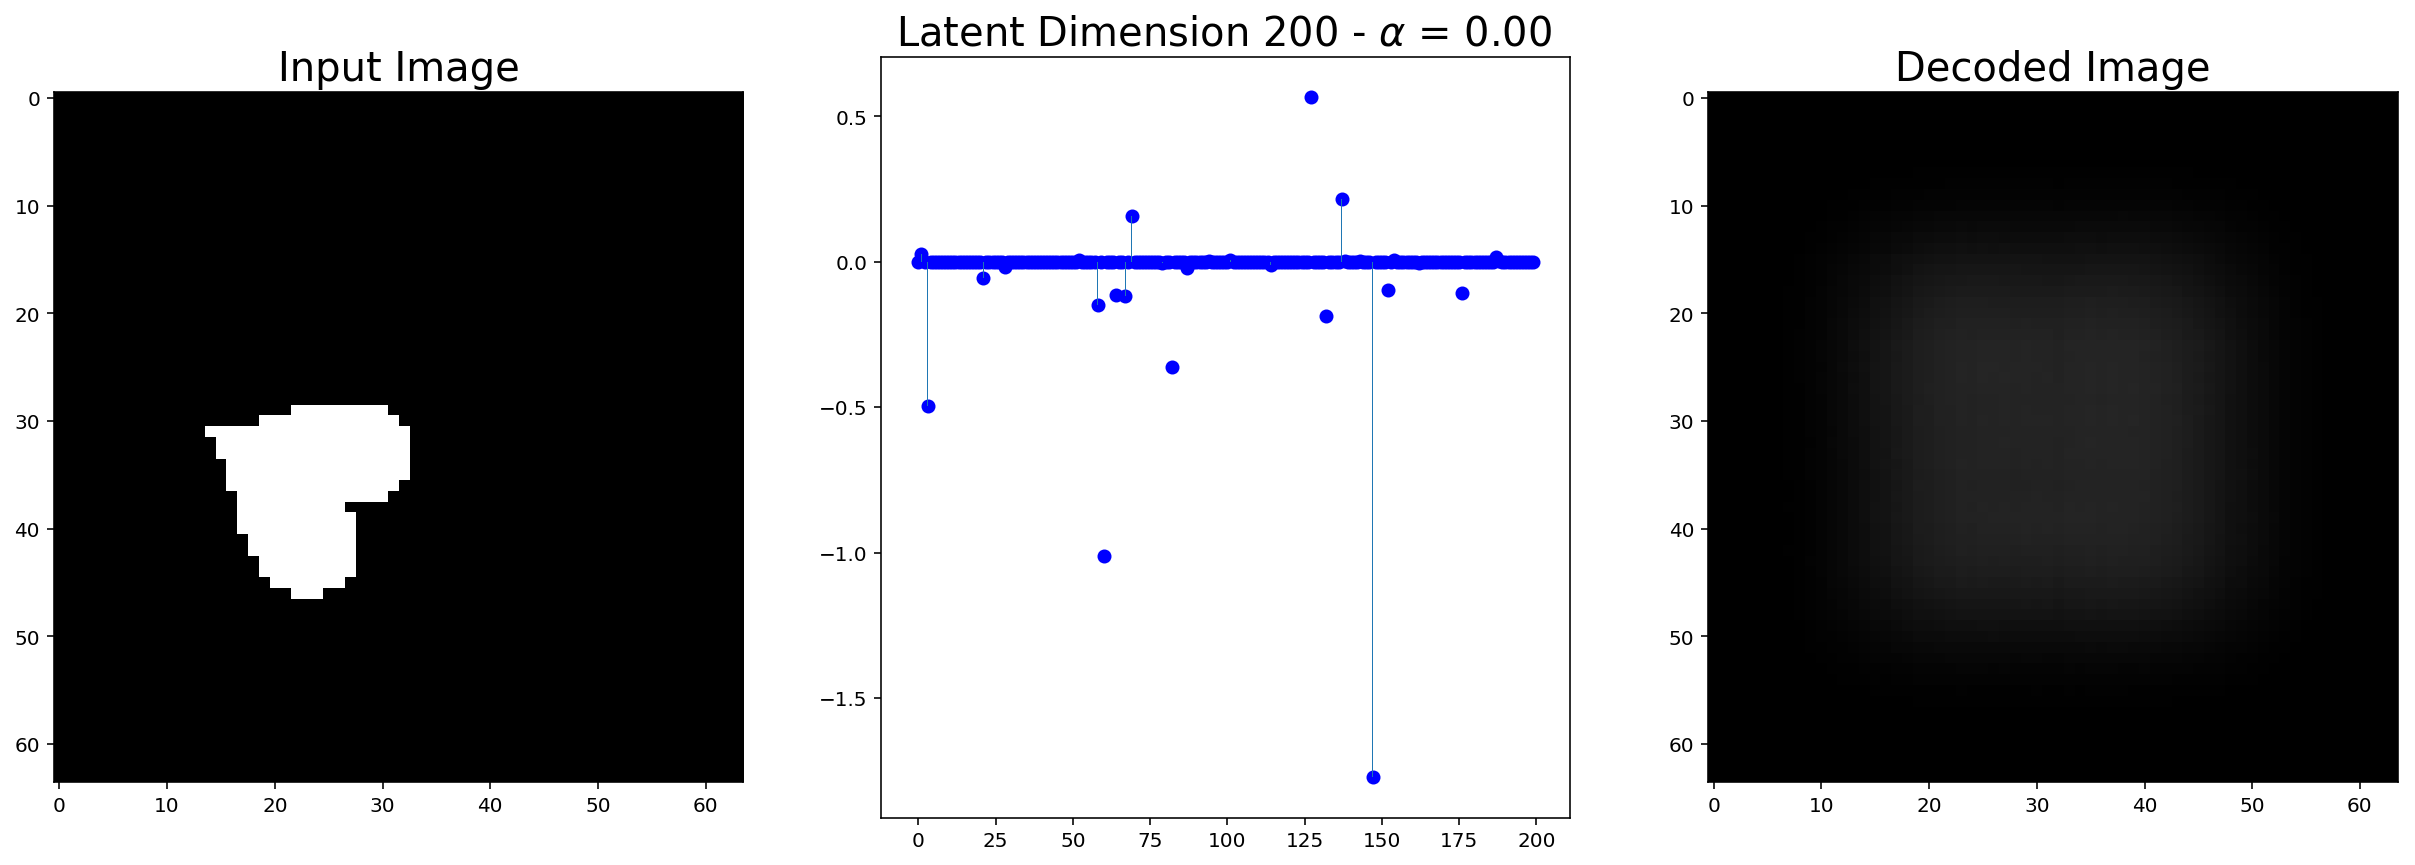

In [110]:
# beta = 3
for i in range(5):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])

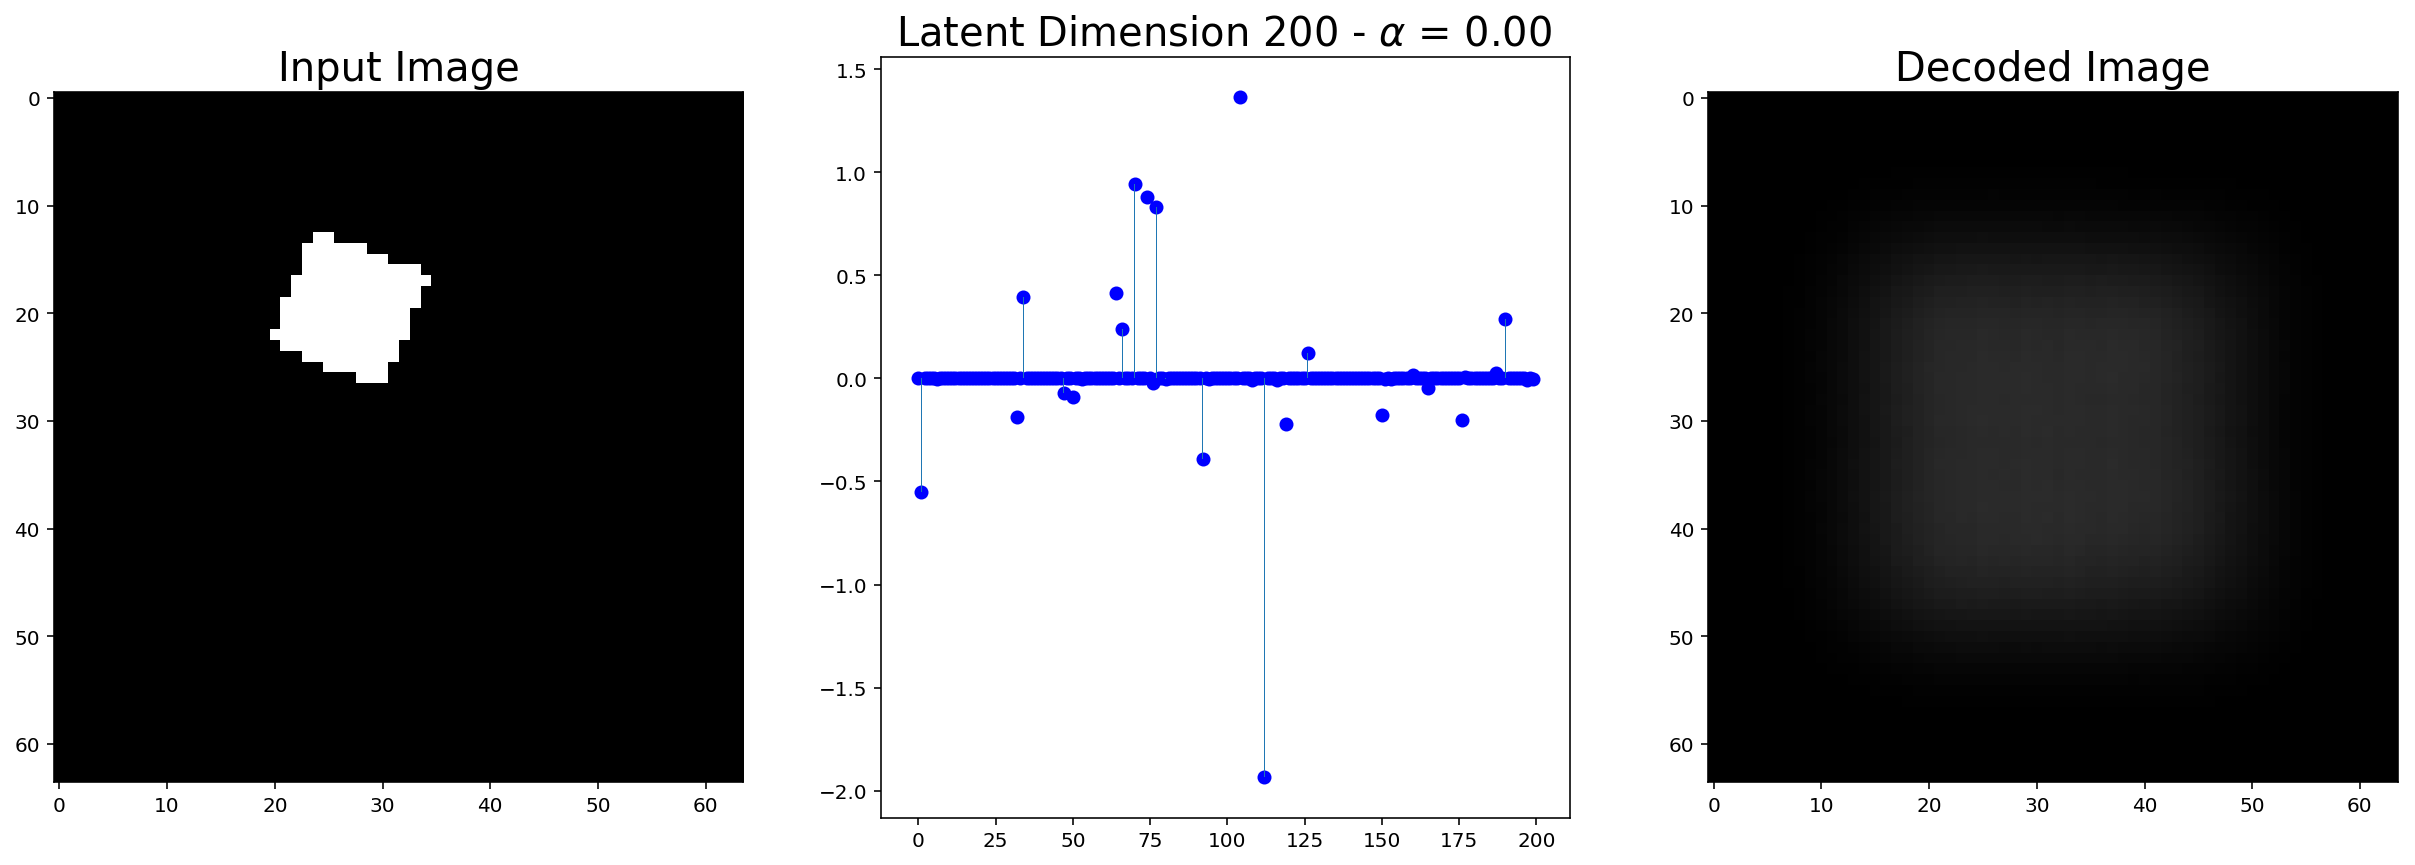

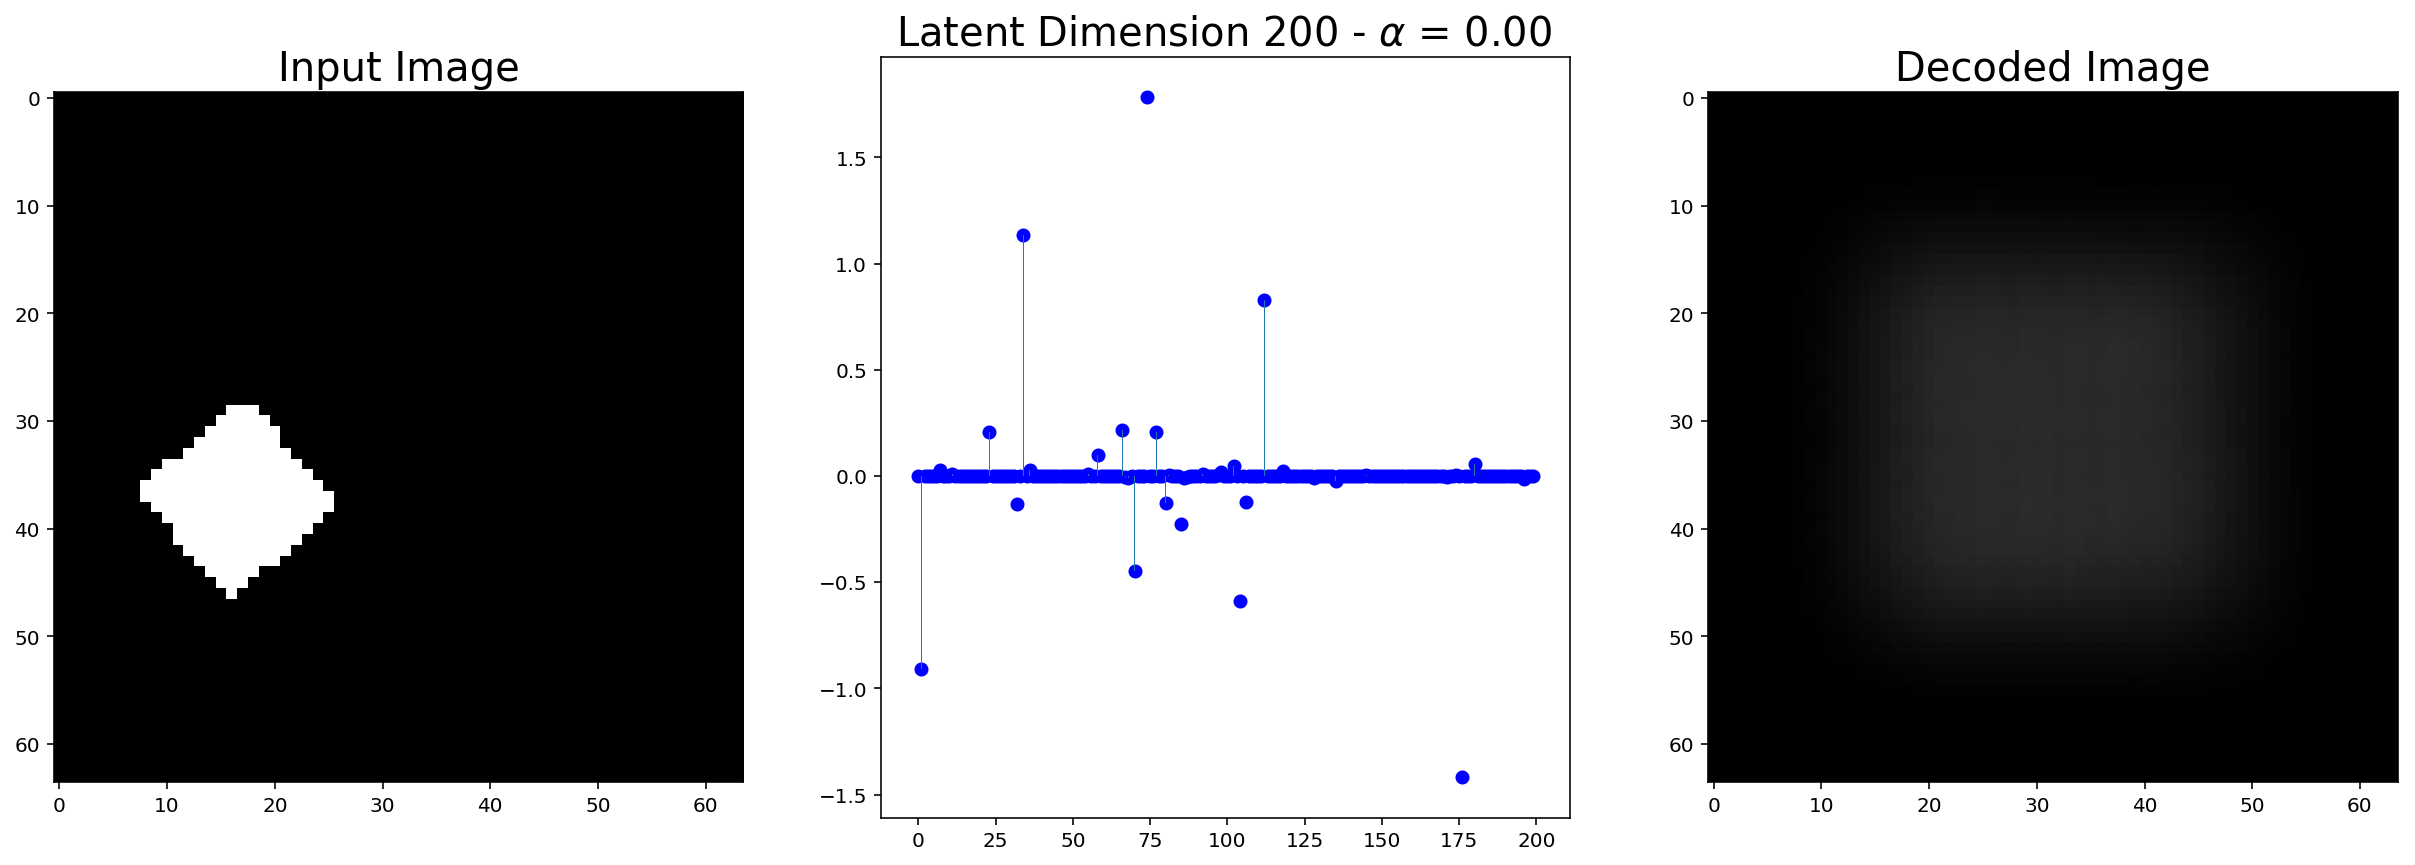

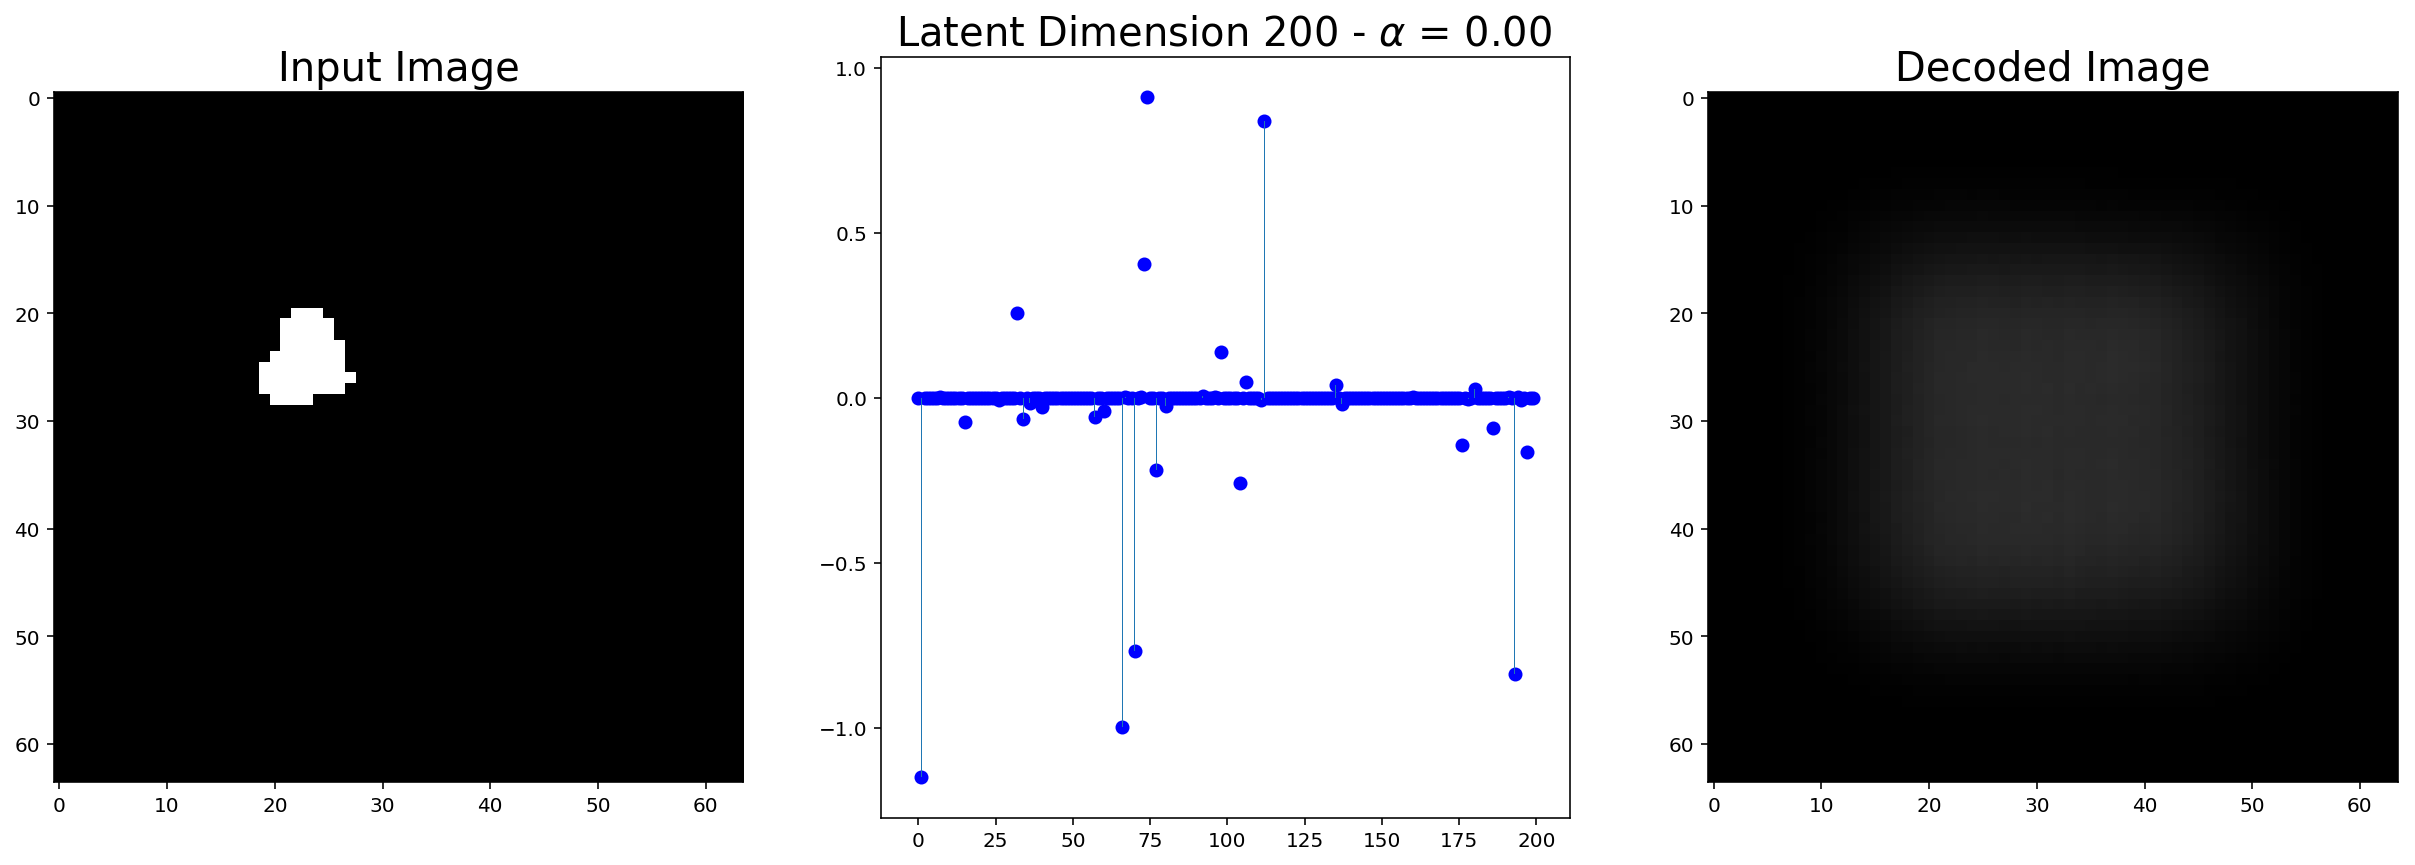

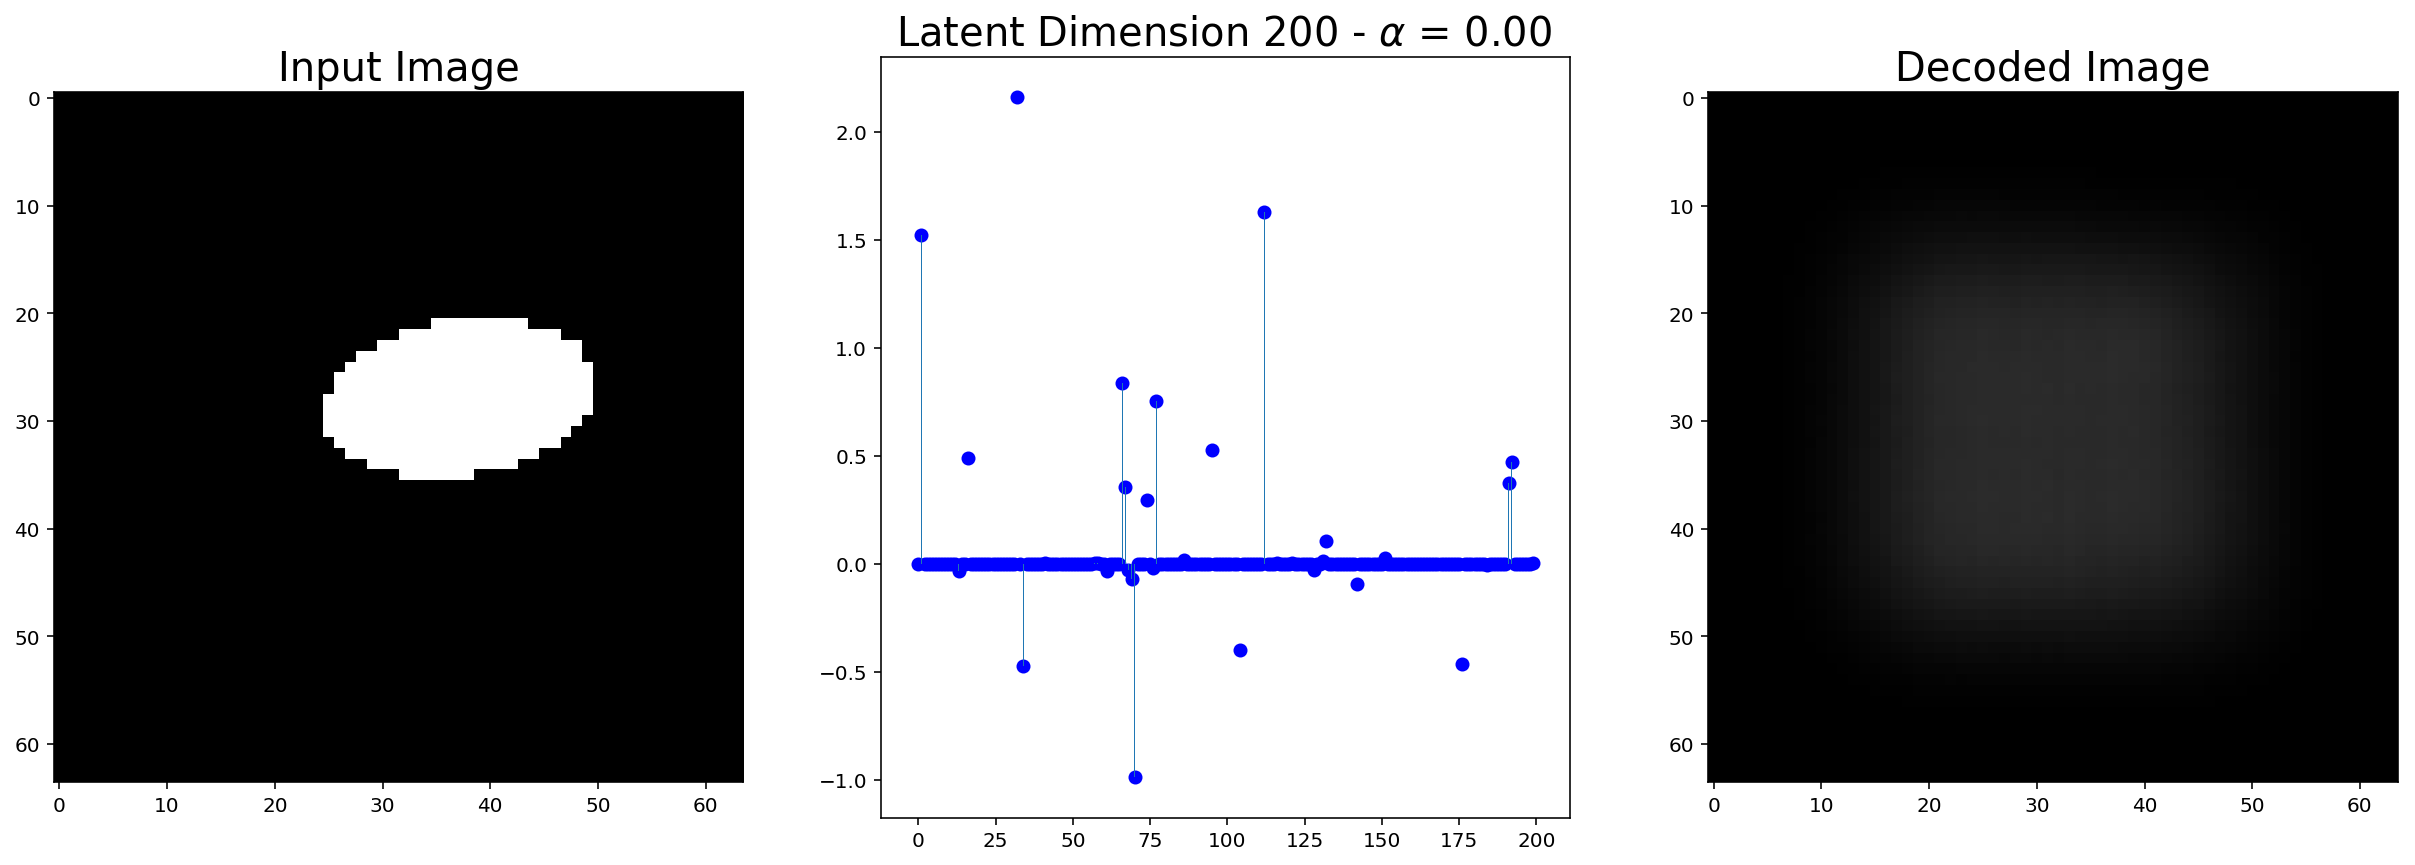

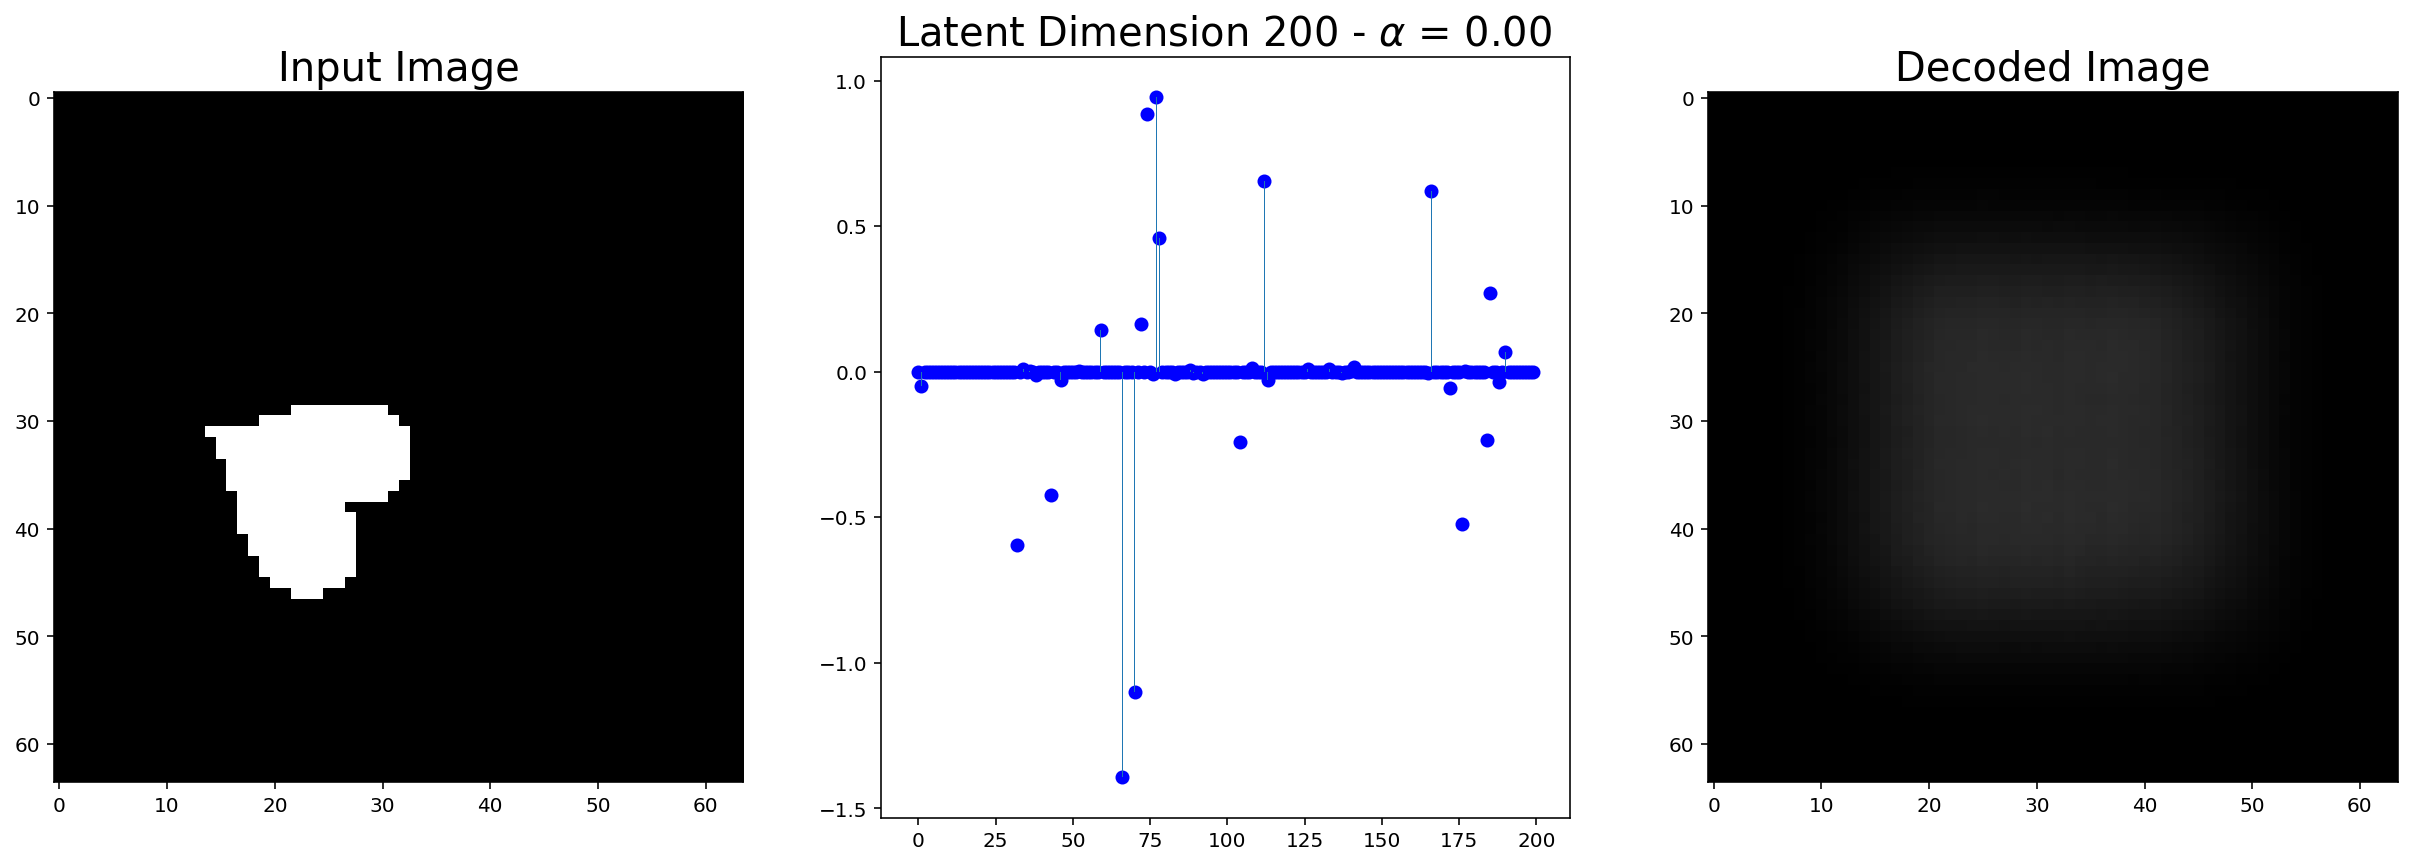

In [108]:
# beta = 4
for i in range(5):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


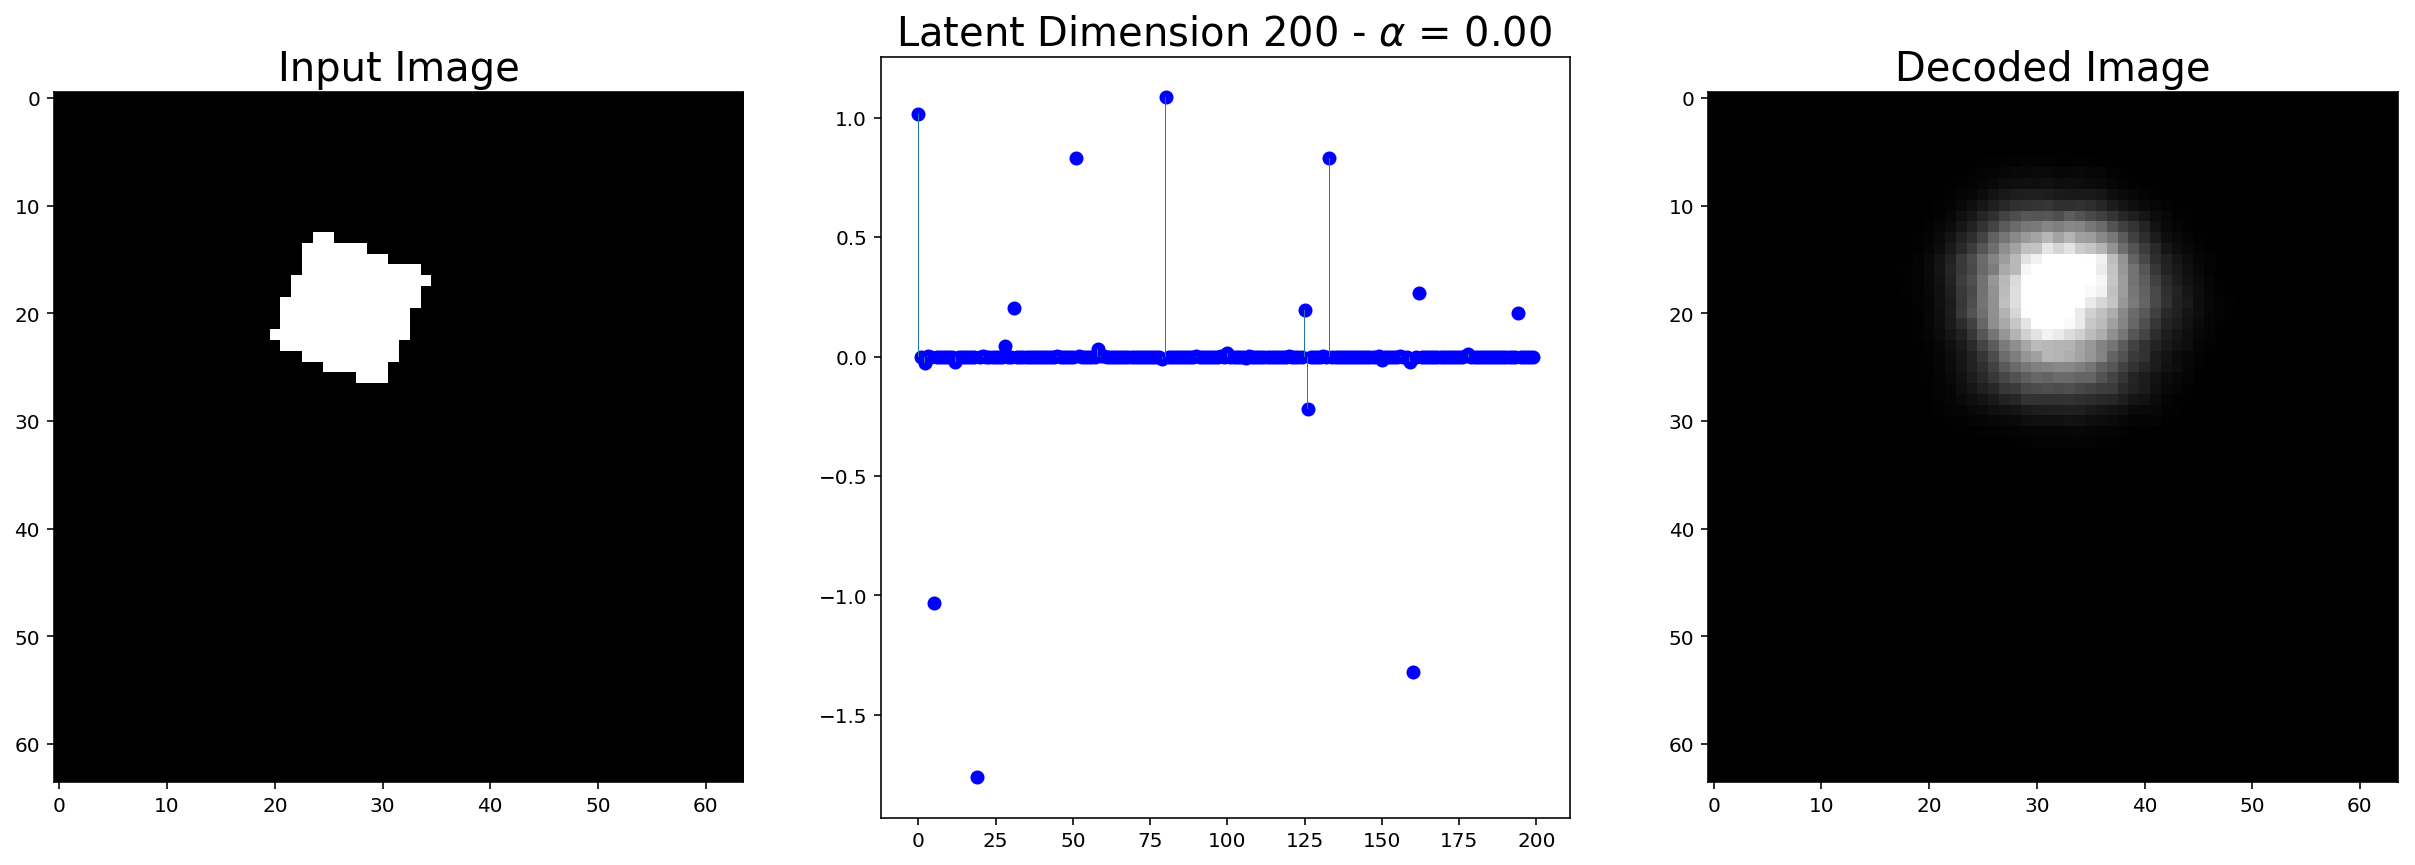

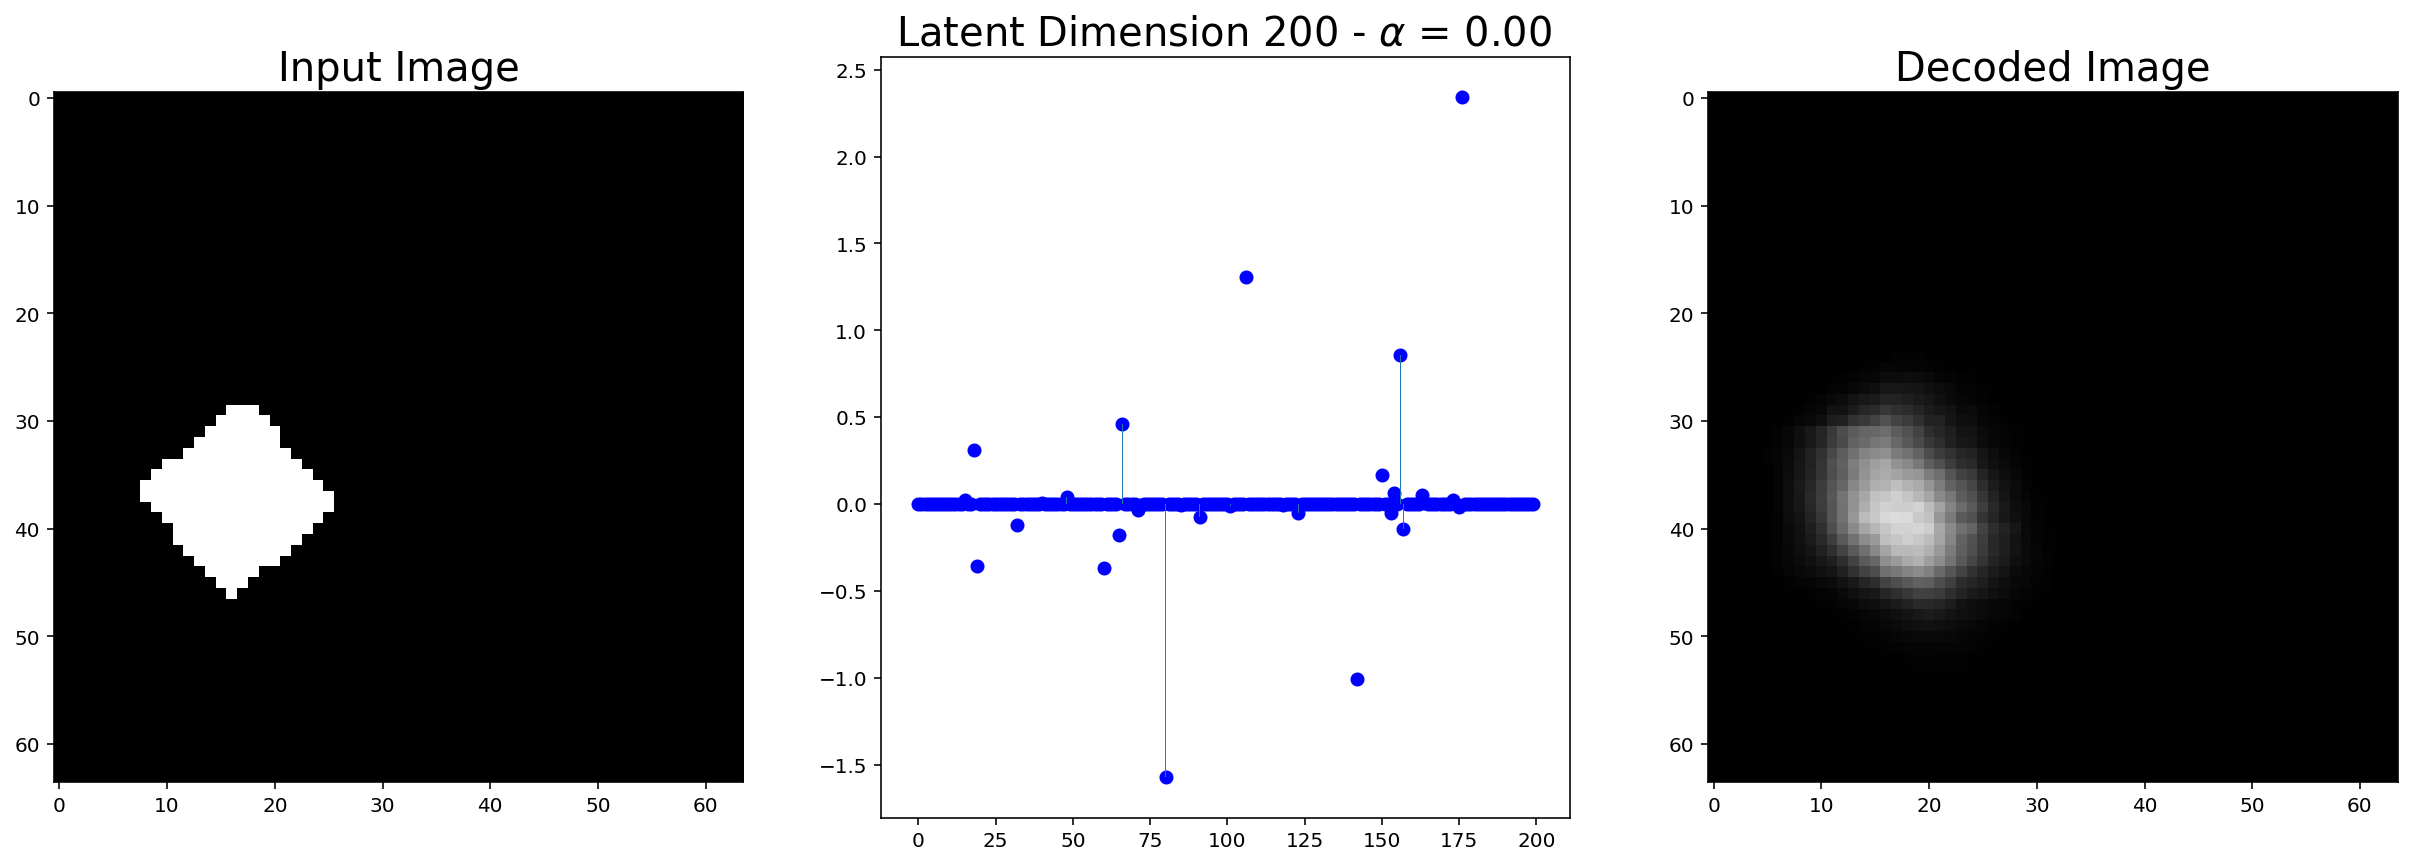

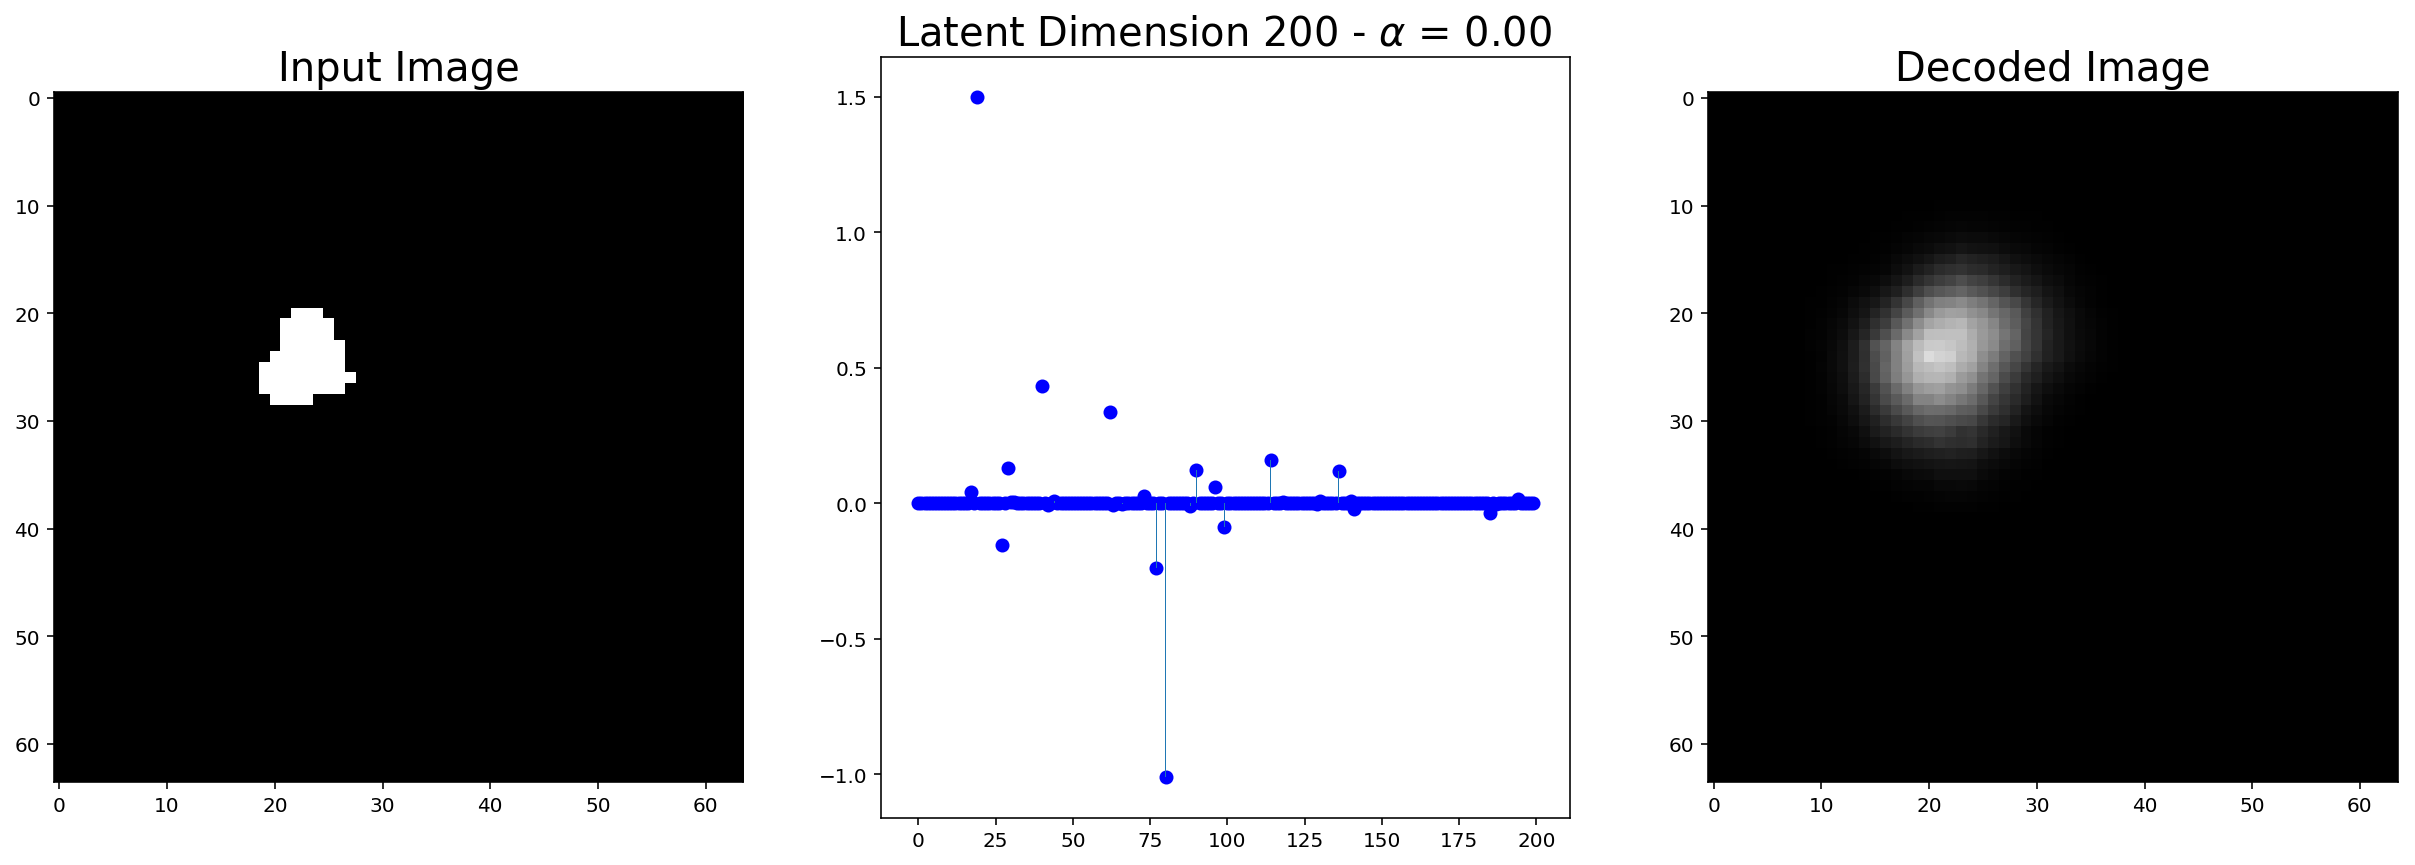

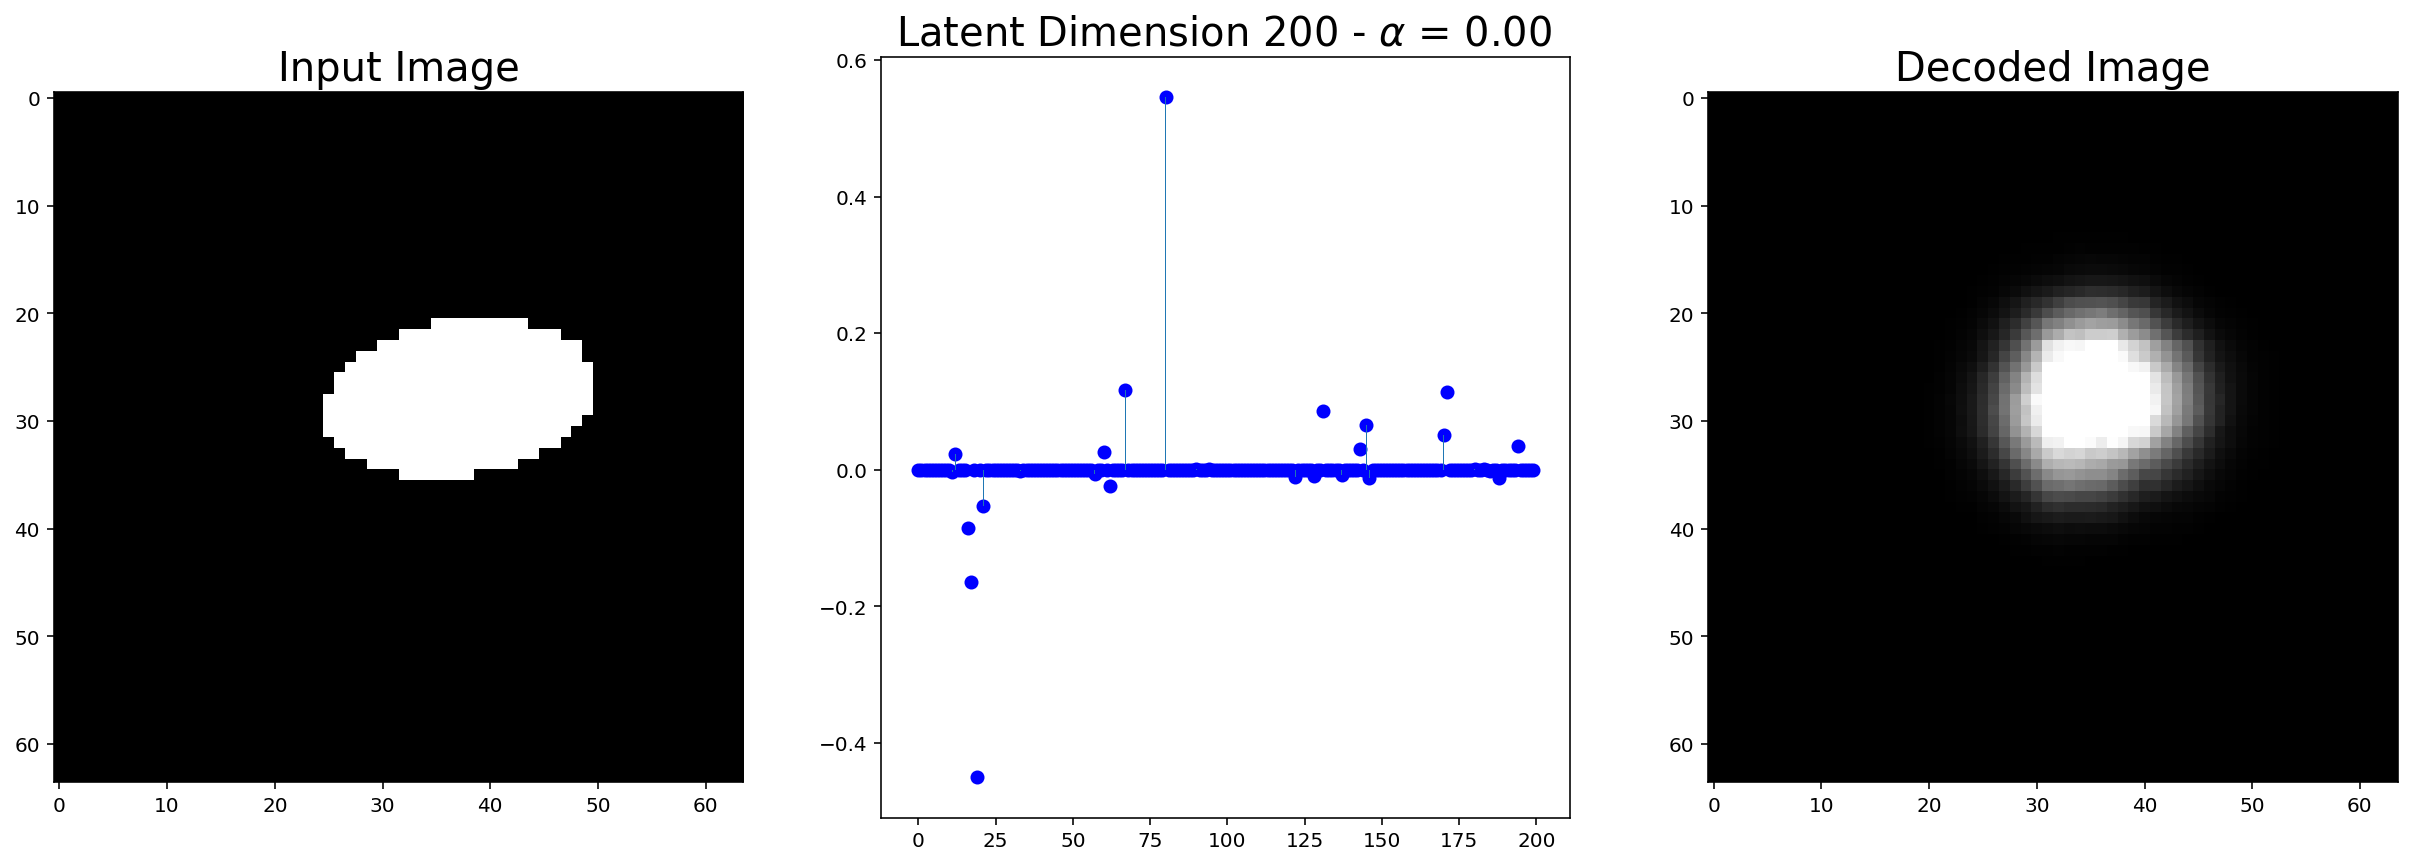

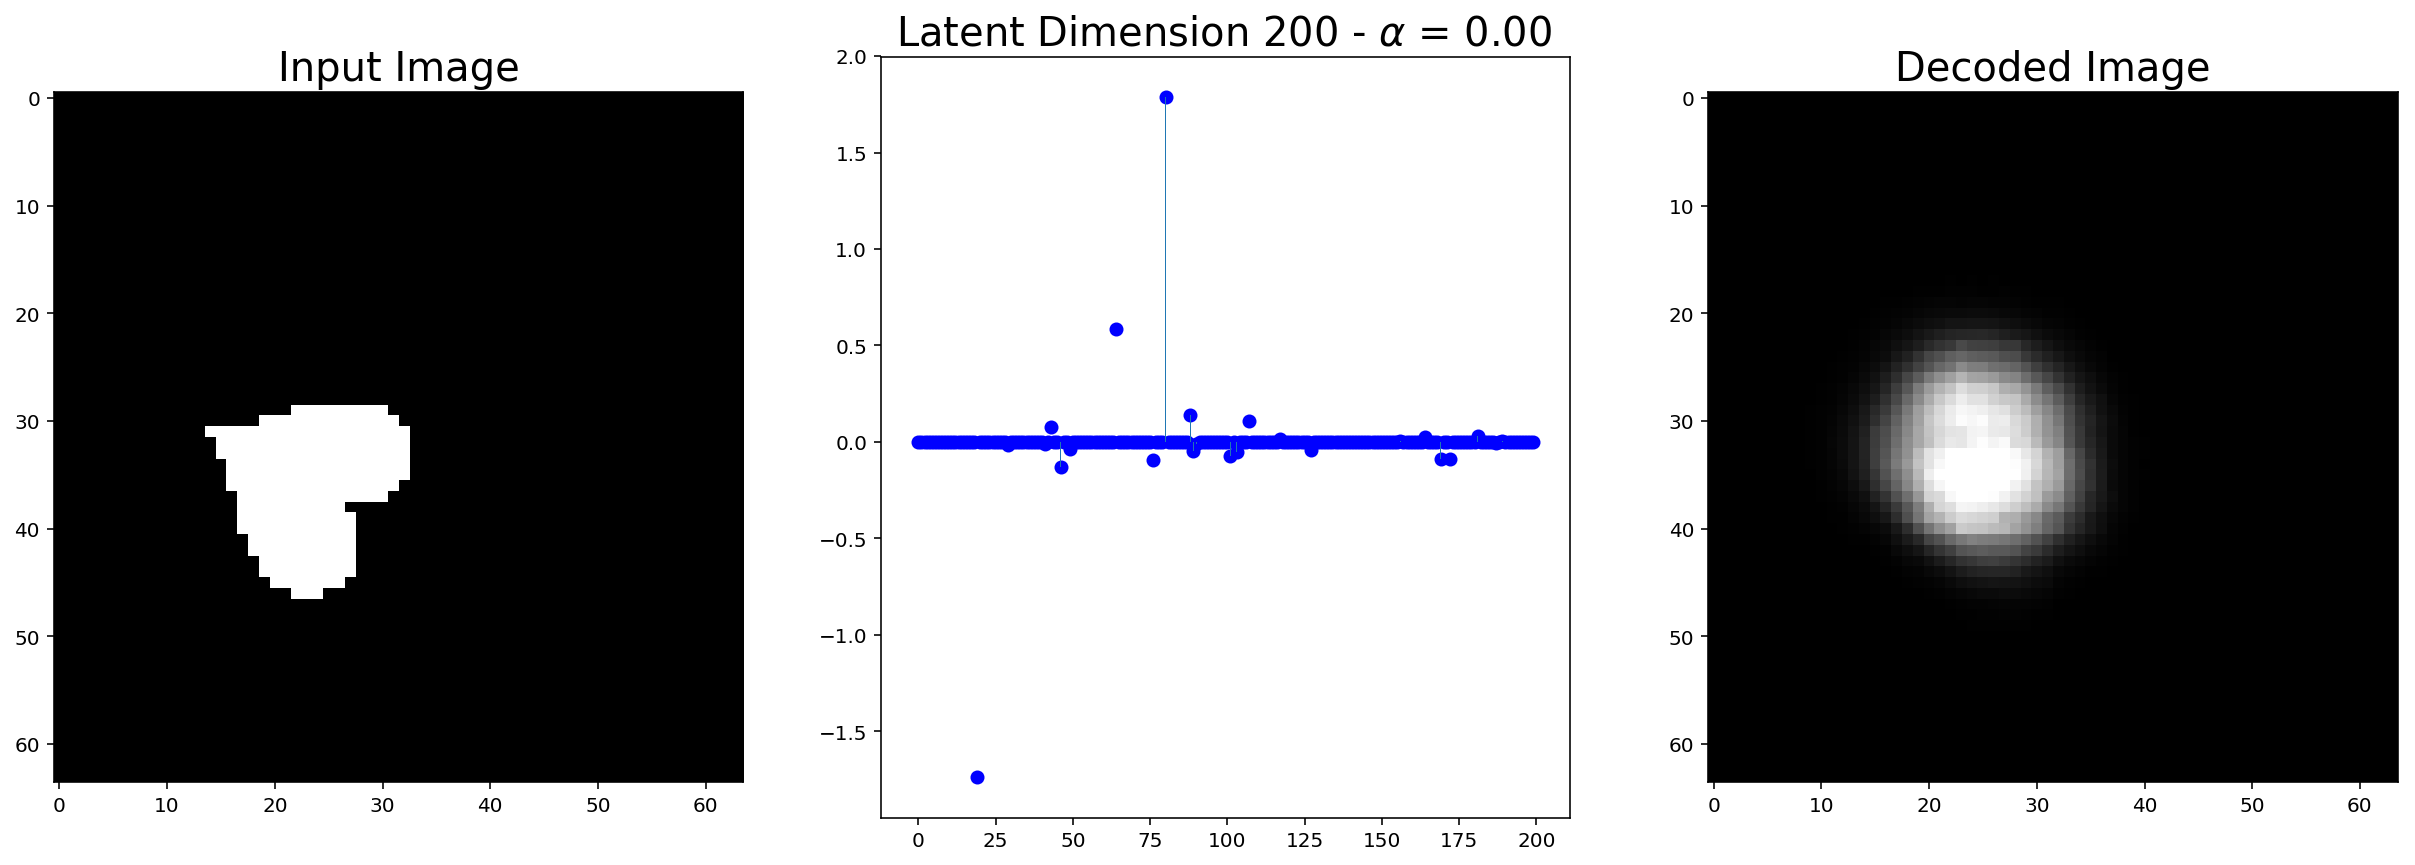

In [106]:
# beta = 2
for i in range(5):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


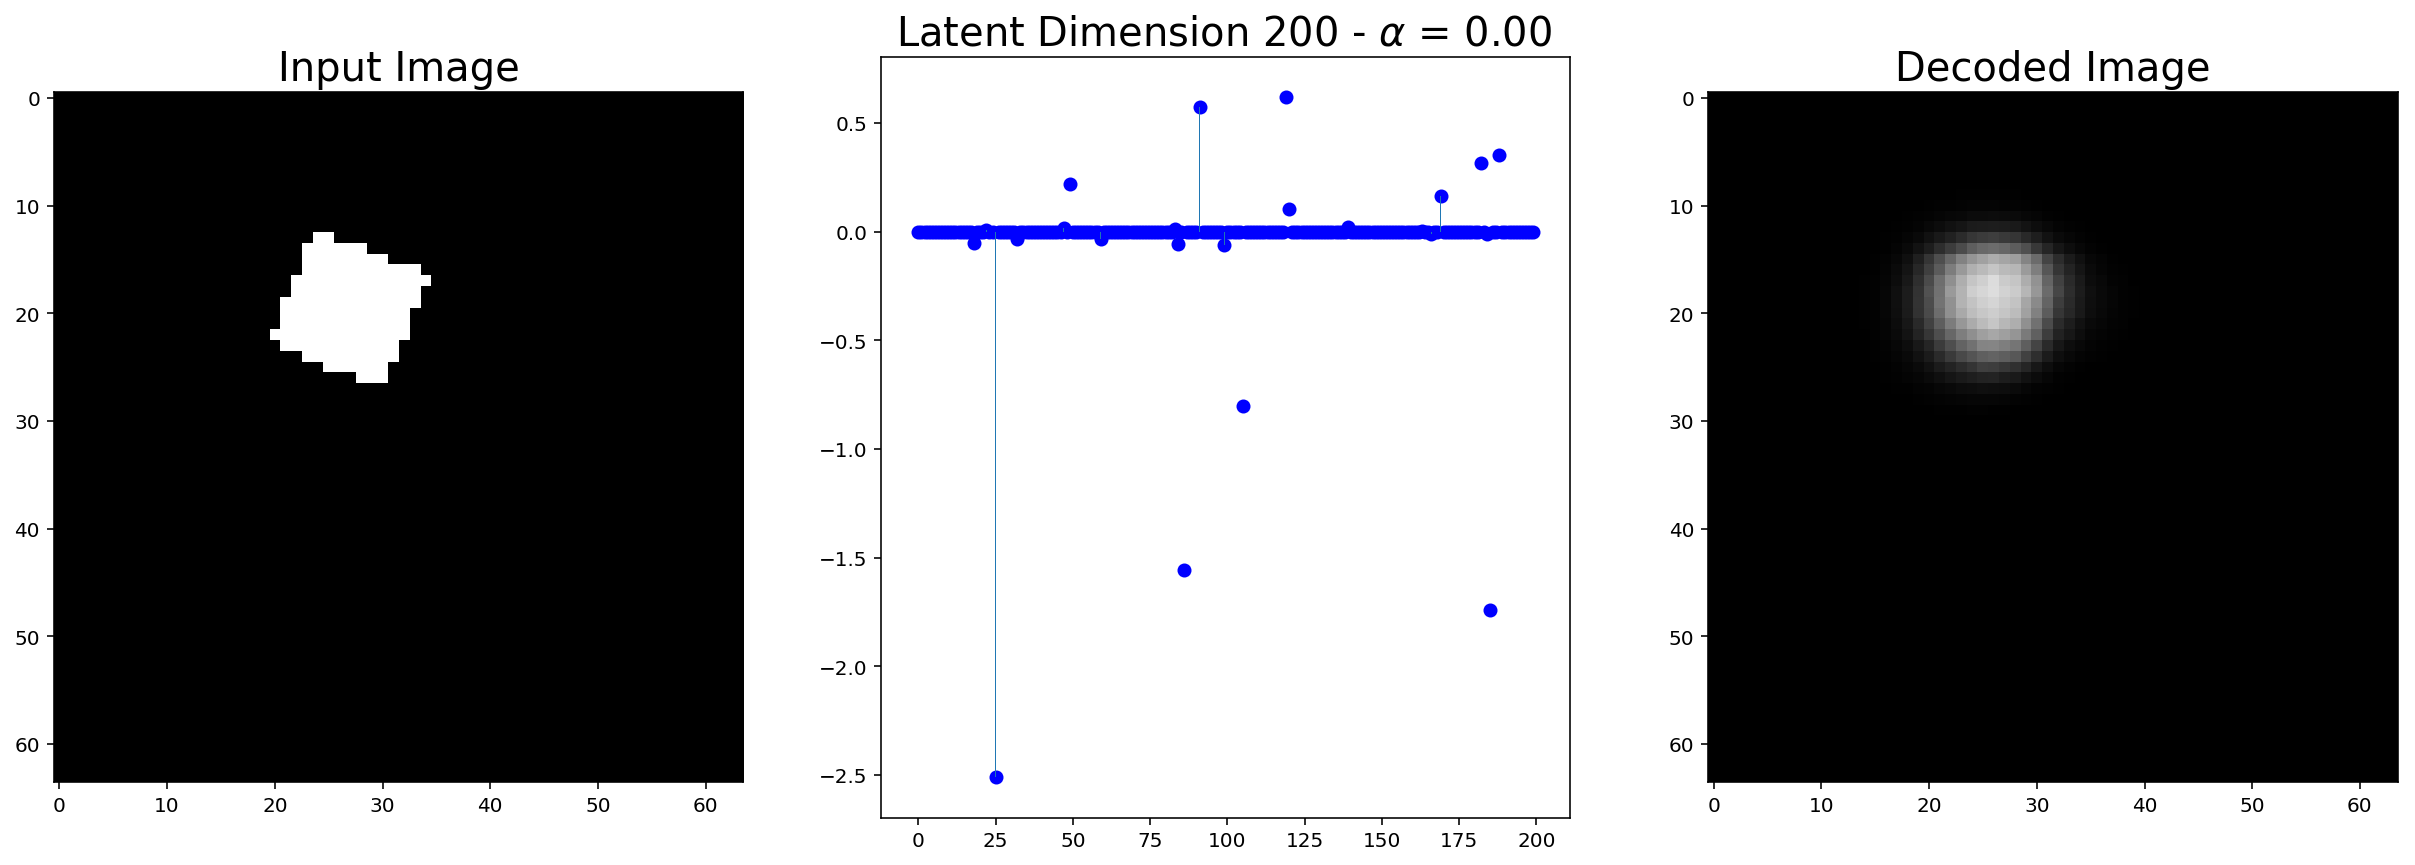

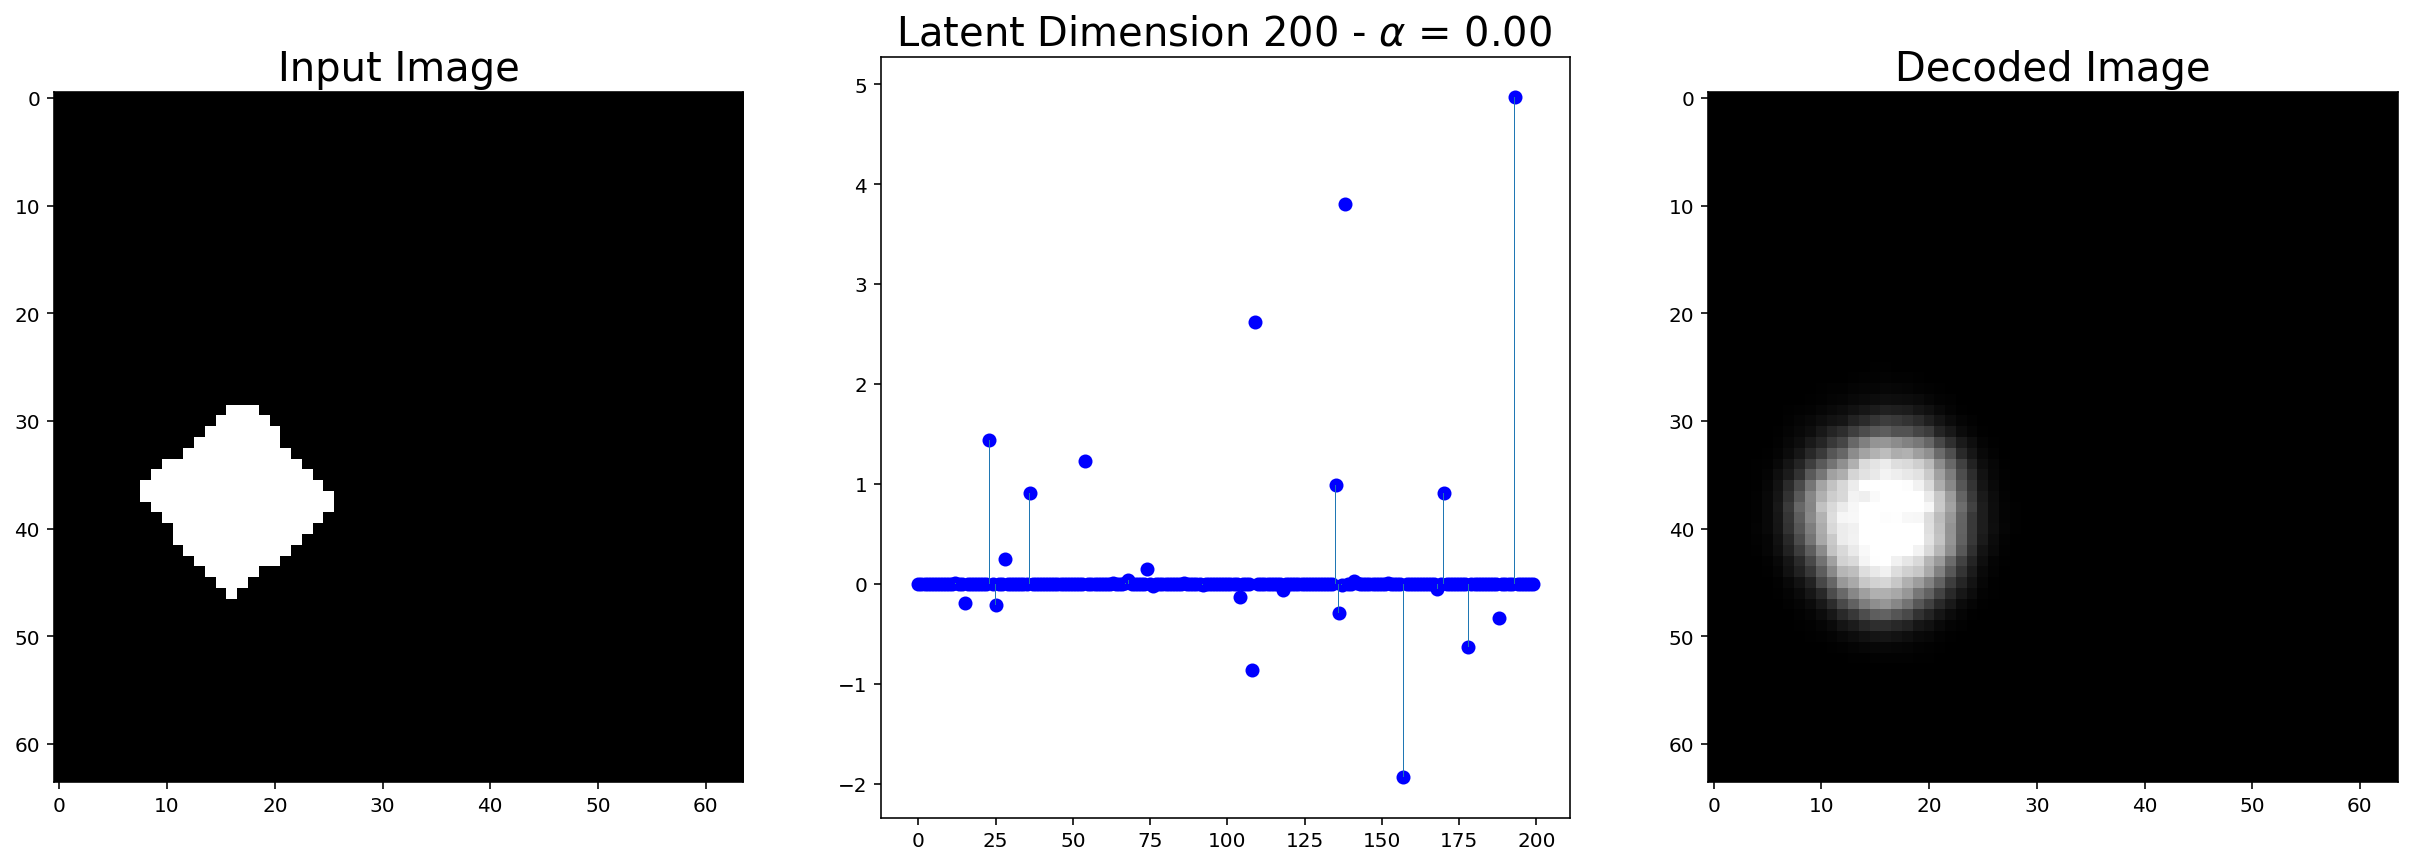

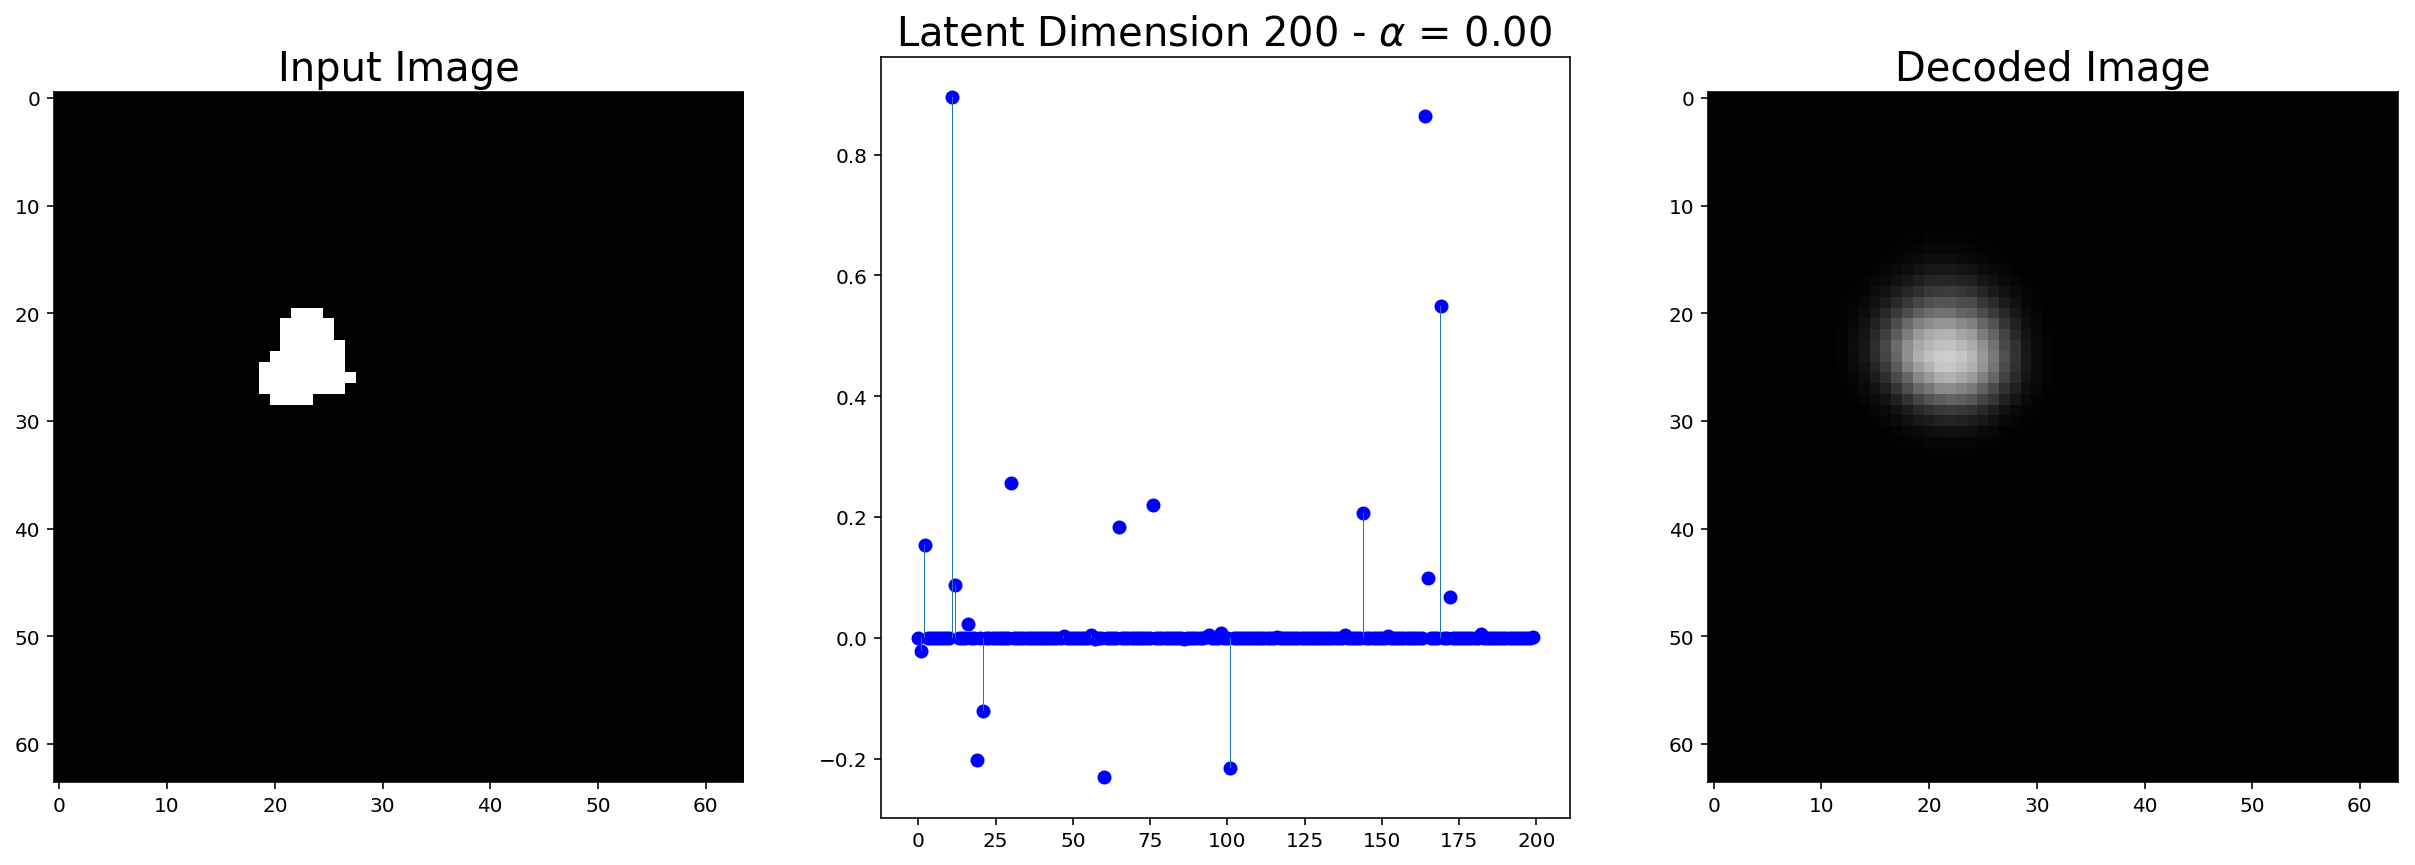

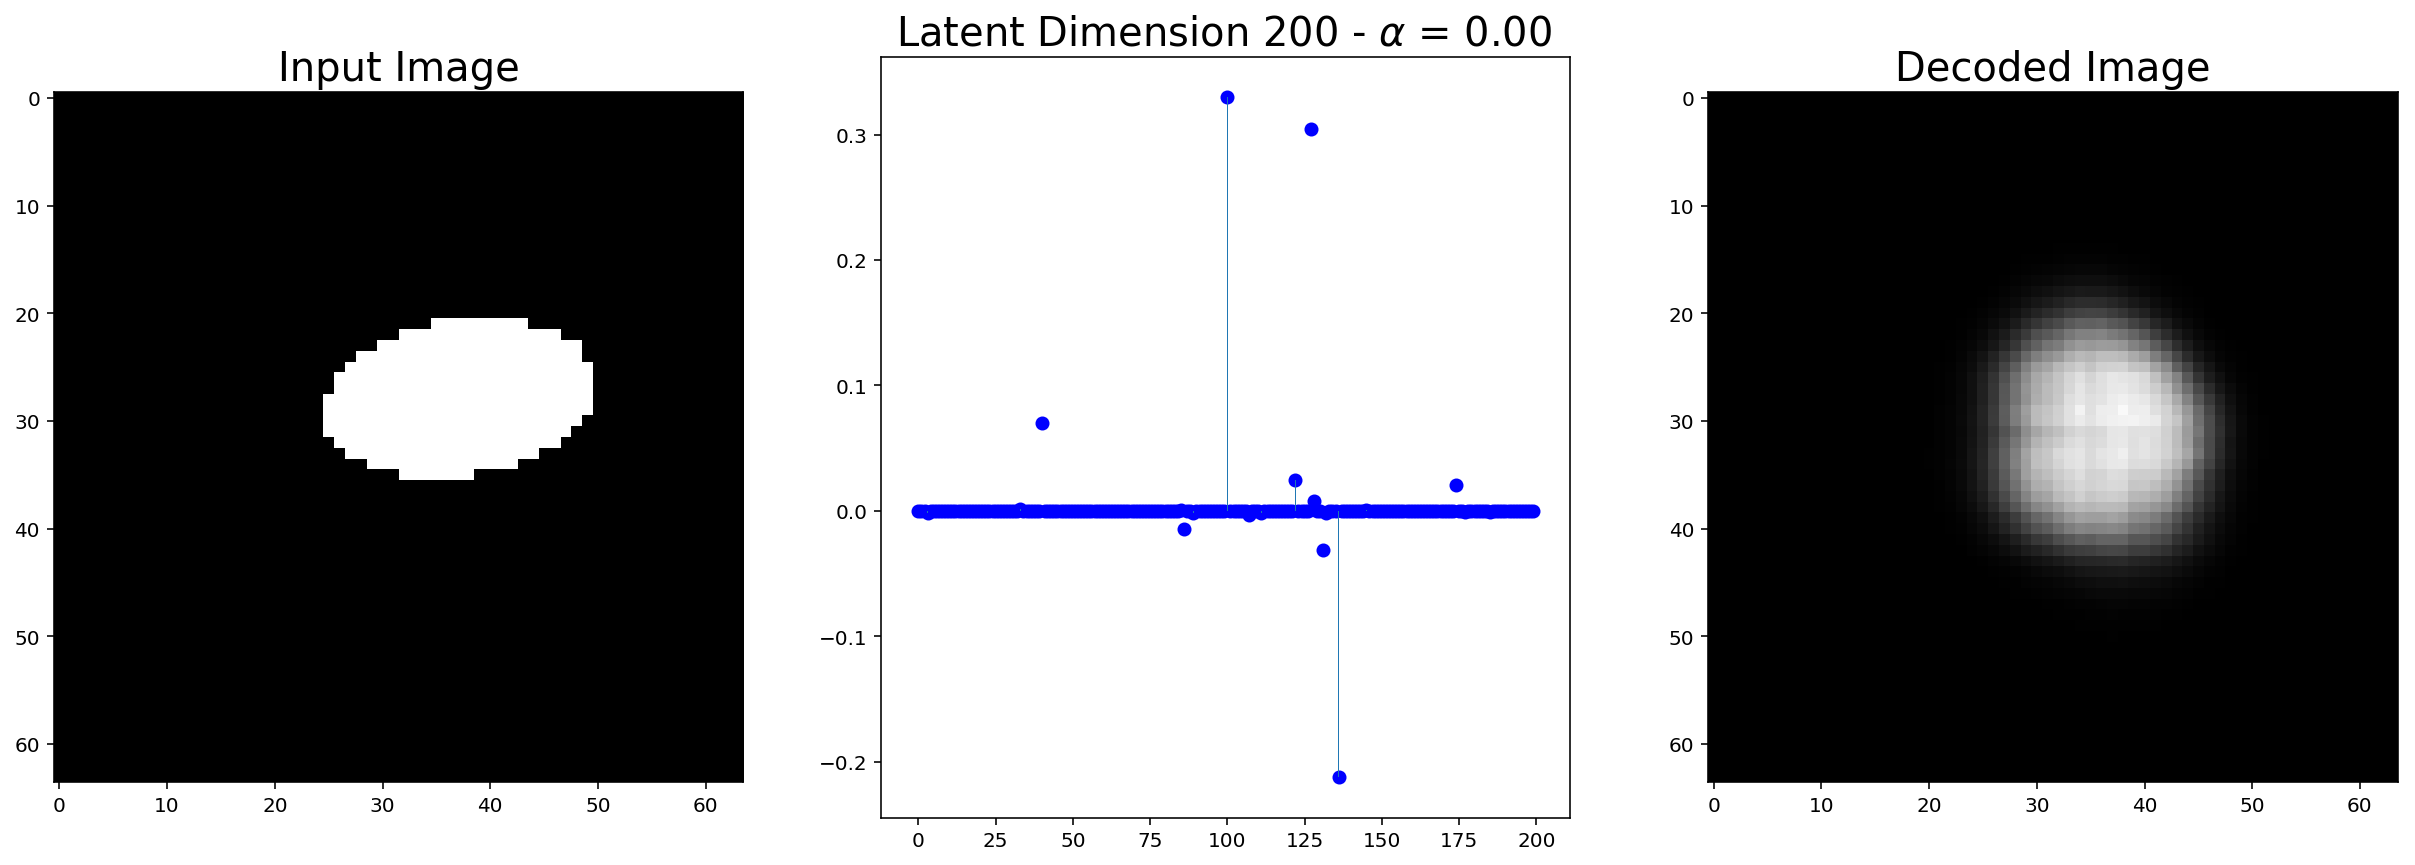

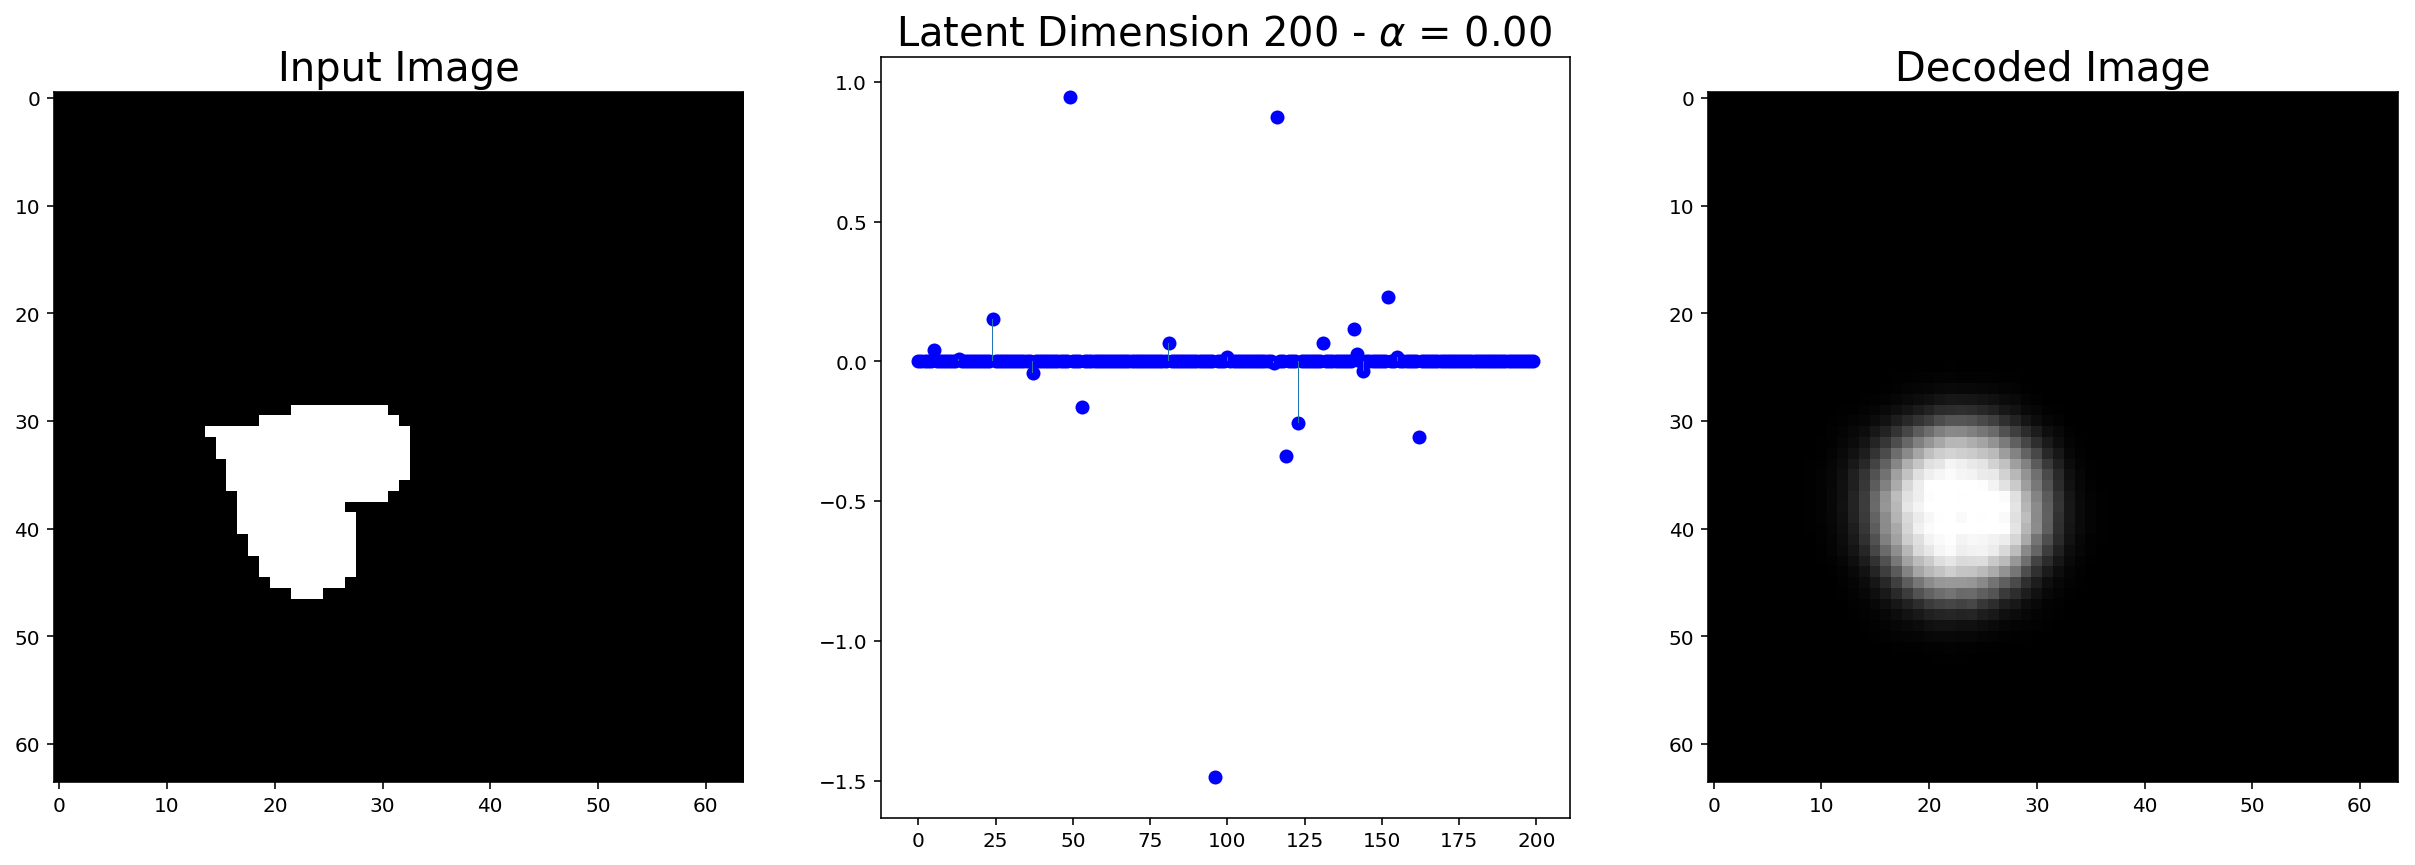

In [104]:
for i in range(5):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])